## Projet 3 : Préparez des données pour un organisme de santé publique
Date début : 28/10/2024

**Table des matières**

1. [Importation des librairies utiles](#Importation-des-librairies-utiles)
1. [Importation et sélection des données](#Importation-et-sélection-des-données)
    1. Importation des données
    1. Premier aperçu des données
    1. Sélection des features
    1. Variables utiles
    1. Fonctions
    1. Taux de remplissage des variables
    1. Première corrélation
    1. Sélection des données
1. [Nettoyage](#Nettoyage)
    1. Fonctions de représentation
    1. Valeurs extrêmes
    1. Calcul de statistiques par produits
    1. Z_score
    1. Médiane
    1. Produits seuls ou manquants
    1. Doublons et produits vides
    1. Résumé du nettoyage
1. [Imputation](#Imputation)
    1. Statistiques par produits et catégories
    1. Mises à zero et à la médiane
    1. Traitement spécifique des fibres
    1. Résumé avant KNN
    1. KNN
    1. Résumé de l'imputation
1. [Résumé nettoyage et imputation](#Résumé-nettoyage-et-imputation)
1. [Analyse](#Analyse)
    1. Fonctions de représentation
    1. Description générale
    1. Normalisation
    1. Corrélations
    1. PCA
    1. ANOVA
    1. Comparaison PCA/ANOVA et illustrations
1. [Synthèse](#Synthèse)

## Importation des librairies utiles

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
%matplotlib inline

import seaborn as sns

import math

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm

import csv

from scipy import stats

import missingno as msno

# Importation et sélection des données

## Importation des données

### Définition des chemins et fichiers et direction de l'espace de travail

In [2]:
data_folder = "D:/GoogleDrive/Mon Drive/formations/OpenClassrooms/P3/"
file_name = "fr.openfoodfacts.org.products"
file_sufix = ".csv"
os.chdir(os.path.dirname(data_folder))

### Lecture du fichier csv

In [3]:
data = pd.read_csv(file_name+file_sufix, sep='\t')

C:\Users\Jonathan\AppData\Local\Temp\ipykernel_13828\808577764.py:1: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_name+file_sufix, sep='\t')


In [4]:
data.columns = data.columns.str.replace('-', '_')

## Premier aperçu des données

In [5]:
data.head()

code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits_vegetables_nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen_meat_protein_ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon_footprint_100g nutrition_score_fr_100g nutrition_score_uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic_index_100g water_hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [6]:
data.shape

(320772, 162)

In [7]:
data.columns[0:70]

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_fr',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'allergens',
       'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size',
       'no_nutriments', 'additives_n', 'additives', 'additives_tags',
       'additives_fr', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

In [8]:
data.columns[63]

'energy_100g'

## Sélection des features

In [9]:
feature_selected = 'pnns_groups_1'

In [10]:
feature_prediction_array = ['energy_100g',
                      'saturated_fat_100g',
                      'sugars_100g',
                      'proteins_100g',
                      'salt_100g',
                      'sodium_100g',
                      'fat_100g',
                      'carbohydrates_100g',
                      'fiber_100g',
                      'nutrition_score_fr_100g'
                      ]

In [11]:
feature_definition_array = ['code',
                      'product_name',
                      'quantity',
                      'main_category_fr'
                     ]

## Variables utiles

In [13]:
columns_arraydouble = [feature_prediction_array, feature_definition_array]

In [14]:
columns_list = np.hstack((feature_definition_array, feature_prediction_array))
columns_list = np.hstack((columns_list, feature_selected))

In [15]:
data_feature = data.dropna(subset=[feature_selected])

In [16]:
data_feature = data_feature.loc[data_feature[feature_selected]!='unknown']

In [17]:
data_feature[feature_selected].value_counts()

pnns_groups_1
Sugary snacks              12368
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8442
Fish Meat Eggs              8041
Composite foods             6747
Fruits and vegetables       5908
Fat and sauces              5216
Salty snacks                2809
fruits-and-vegetables        987
sugary-snacks                496
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64

In [18]:
data_feature[feature_selected] = data_feature[feature_selected].str.replace('sugary-snacks','Sugary snacks')
data_feature[feature_selected] = data_feature[feature_selected].str.replace('salty-snacks','Salty snacks')
data_feature[feature_selected] = data_feature[feature_selected].str.replace('fruits-and-vegetables','Fruits and vegetables')
data_feature[feature_selected] = data_feature[feature_selected].str.replace('cereals-and-potatoes','Cereals and potatoes')

In [19]:
data_feature[feature_selected].value_counts()

pnns_groups_1
Sugary snacks              12864
Beverages                   9033
Milk and dairy products     8825
Cereals and potatoes        8458
Fish Meat Eggs              8041
Fruits and vegetables       6895
Composite foods             6747
Fat and sauces              5216
Salty snacks                2810
Name: count, dtype: int64

## Fonctions

In [20]:
def plot_data_empty_values(data, data_threshold_array, feature_arraydouble, title, subplot):
    #

    ax = plt.subplot(1,2,subplot)
    color_array = ['r', 'g', 'm', 'c']
    (100-data.isnull().sum()/len(data)*100).plot(ax=ax, marker='+', linestyle='', rot=30)
    for i in range(len(feature_arraydouble)):
        for string in feature_arraydouble[i]:
            ax.plot(np.where(data.columns==string)[0][0], (100-data[string].isnull().sum()/len(data)*100), color_array[i]+'o')
    ax.axhline(y=100, linestyle='--')
    ax.axhline(y=0, linestyle='--')
    ax.axhline(y=50, color='r', linestyle='--')
    ax.axvline(x=62, linestyle=':')
    for i in data_threshold_array:
        ax.axhline(y=i, color='g', linestyle=':')
    ax.set_title(title)

## Remplissage des variables

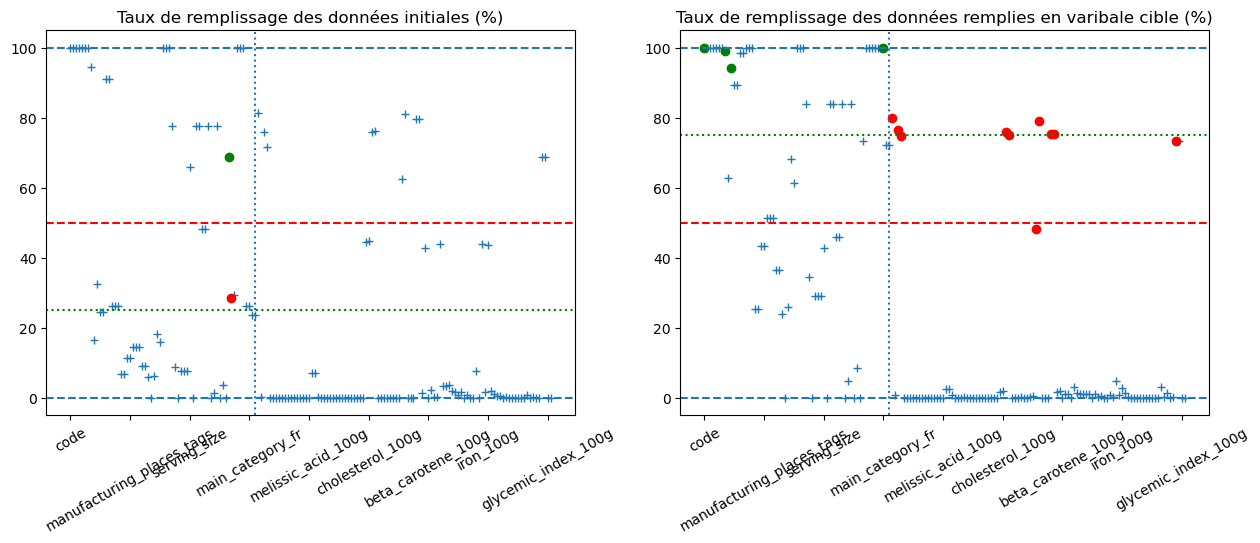

In [21]:
fig = plt.figure(figsize=(15,5))

plot_data_empty_values(data, [25], [[feature_selected], ['nutrition_grade_fr']], 'Taux de remplissage des données initiales (%)', 1)
plot_data_empty_values(data_feature, [75], columns_arraydouble, 'Taux de remplissage des données remplies en varibale cible (%)', 2)
plt.show()

## Première corrélation

In [22]:
len(data_feature.loc[data_feature['salt_100g'].isnull(), 'sodium_100g'])-data_feature.loc[data_feature['salt_100g'].isnull(), 'sodium_100g'].isnull().sum()

0

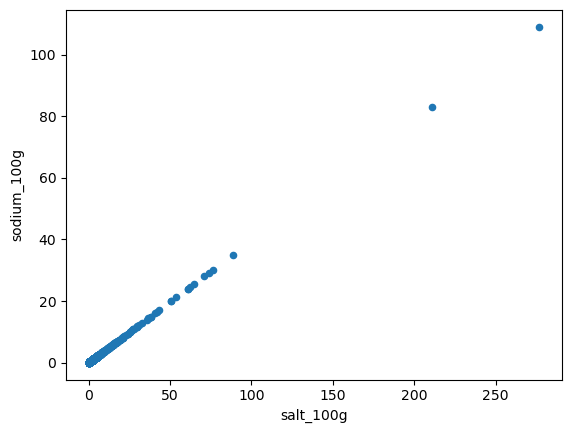

In [23]:
data_feature.loc[data_feature['salt_100g']!=data_feature['salt_100g'].max()].plot(kind='scatter', x='salt_100g', y='sodium_100g')
plt.show()

## Sélection de données

In [24]:
columns_list = columns_list[columns_list!='sodium_100g']
del feature_prediction_array[feature_prediction_array.index('sodium_100g')]

In [25]:
data_selected = data_feature[columns_list].copy()

<Axes: >

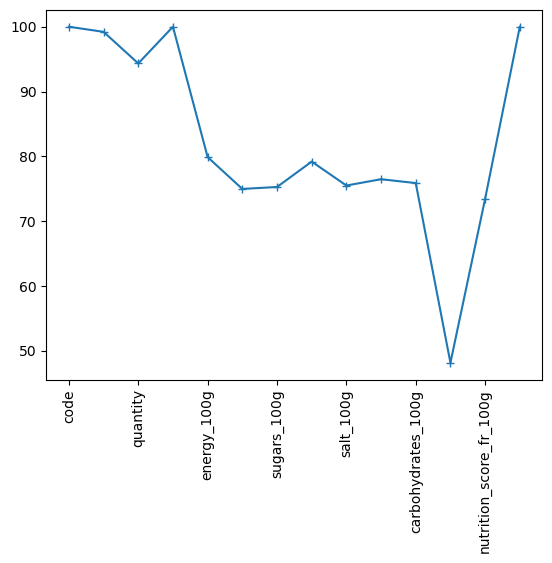

In [26]:
(100-data_selected.isnull().sum()/len(data_selected)*100).plot(marker='+', rot=90)

In [27]:
feature_selected_values = data_selected[feature_selected].unique()

# Nettoyage

## Fonction de représentation

In [28]:
def plot_box_data_prediction(data, threshold_arraydouble):
    #

    fig = plt.figure(figsize=(15,5))
    
    ax=plt.subplot(1,2,1)
    data[feature_prediction_array[1:-1]].plot(ax=ax, kind='box', vert=False, showmeans=True)
    if(len(threshold_arraydouble)>0):
        ax.axvline(threshold_arraydouble[0][0], color='r', linestyle='--')
        ax.axvline(threshold_arraydouble[0][1], color='r', linestyle='--')
    
    ax=plt.subplot(2,2,2)
    data[feature_prediction_array[0]].plot(ax=ax, kind='box', vert=False, showmeans=True)
    ax.set_title(feature_prediction_array[0])
    ax.yaxis.tick_right()
    if(len(threshold_arraydouble)>1):
        ax.axvline(threshold_arraydouble[1][0], color='r', linestyle='--')
        ax.axvline(threshold_arraydouble[1][1], color='r', linestyle='--')
    
    ax=plt.subplot(2,2,4)
    data[feature_prediction_array[-1]].plot(ax=ax, kind='box', vert=False, showmeans=True)
    ax.set_title(feature_prediction_array[-1])
    ax.yaxis.tick_right()
    if(len(threshold_arraydouble)>2):
        ax.axvline(threshold_arraydouble[2][0], color='r', linestyle='--')
        ax.axvline(threshold_arraydouble[2][1], color='r', linestyle='--')

    plt.subplots_adjust(hspace=0.5)

## Valeurs extrêmes

In [29]:
feature_prediction_threshold = 100
energy_threshold = 10000

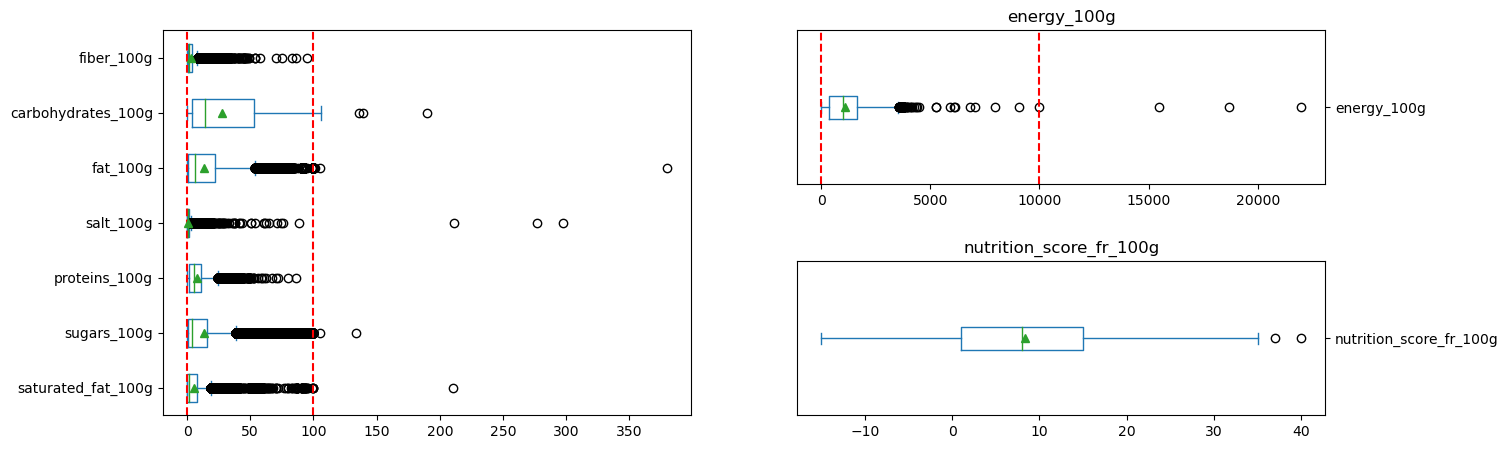

In [30]:
plot_box_data_prediction(data_selected, [[0,feature_prediction_threshold], [0,energy_threshold]])

### Compte des valeurs supprimées

In [31]:
data_null = {}
data_null[feature_prediction_array[0]] = len(data_selected.loc[
                                       (data_selected[feature_prediction_array[0]]>energy_threshold)|(data_selected[feature_prediction_array[0]]<0)])
for string in feature_prediction_array[1:-1]:
    data_null[string] = len(data_selected.loc[
                            (data_selected[string]>feature_prediction_threshold)|(data_selected[string]<0)])
data_null[feature_prediction_array[-1]] = 0

### Tri des valeurs

In [32]:
data_inlier1 = data_selected.copy()
data_inlier1 = data_inlier1.loc[
    ((data_inlier1[feature_prediction_array[0]]<energy_threshold)&(data_inlier1[feature_prediction_array[0]]>=0))
    |(data_inlier1[feature_prediction_array[0]].isnull())]
for string in feature_prediction_array[1:-1]:
    data_inlier1 = data_inlier1.loc[((data_inlier1[string]<=feature_prediction_threshold)&(data_inlier1[string]>=0))|(data_inlier1[string].isnull())]

### Représenatation

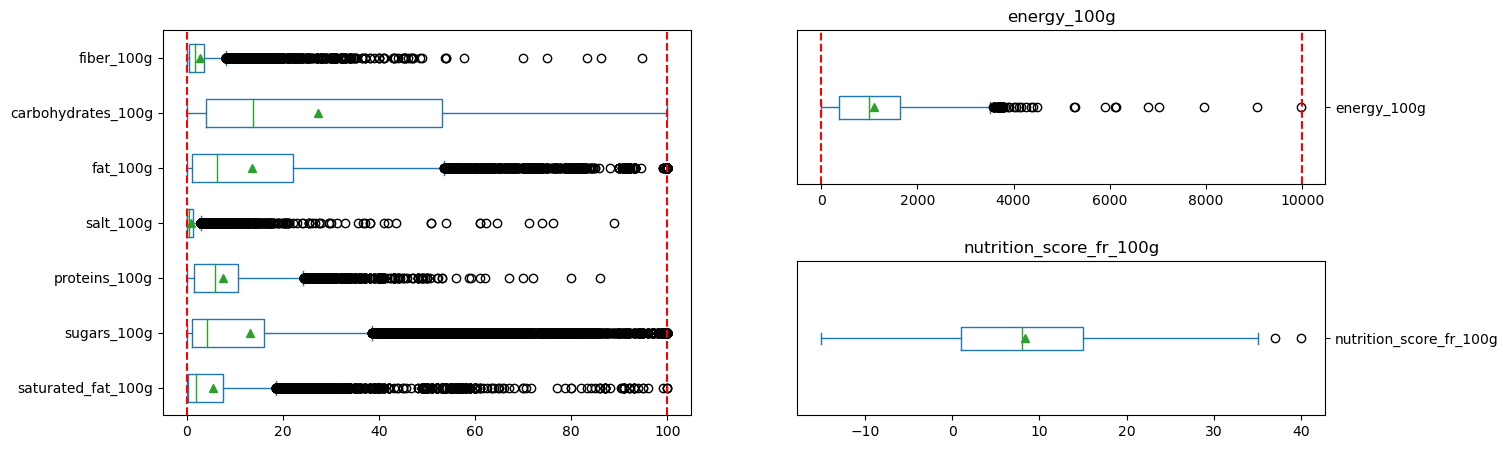

In [33]:
plot_box_data_prediction(data_inlier1, [[0,feature_prediction_threshold], [0,energy_threshold]])

## Calcul de statistiques par produits

In [34]:
data_inlier1_grouped_prod = data_inlier1.groupby('product_name')

In [35]:
data_inlier1_stats_prod = pd.DataFrame()
for string in feature_prediction_array:
    data_inlier1_stats_prod[string+'_size'] = data_inlier1_grouped_prod[string].size()
    data_inlier1_stats_prod[string+'_mean'] = data_inlier1_grouped_prod[string].mean()
    data_inlier1_stats_prod[string+'_med'] = data_inlier1_grouped_prod[string].median()
    data_inlier1_stats_prod[string+'_std'] = data_inlier1_grouped_prod[string].std()
    data_inlier1_stats_prod[string+'_std_med'] = data_inlier1_stats_prod[string+'_std']/data_inlier1_stats_prod[string+'_med']

In [36]:
data_inlier1_stats = data_inlier1.join(data_inlier1_stats_prod, on='product_name', rsuffix='_prod')

In [37]:
for string in feature_prediction_array:
    data_inlier1_stats[string+'_z_prod'] = (data_inlier1_stats[string]-data_inlier1_stats[string+'_mean'])/data_inlier1_stats[string+'_std']

In [38]:
data_inlier1_stats.replace([np.inf, -np.inf], np.nan, inplace=True)

## Z_score

### Compte des valeurs suprimées

In [39]:
data_null2 = {}
for string in feature_prediction_array:
    data_null2[string] = len(data_inlier1_stats.loc[(data_inlier1_stats[string+'_z_prod']<-3)])
    data_null2[string] = data_null2[string]+len(data_inlier1_stats.loc[(data_inlier1_stats[string+'_z_prod']>3)])

### Tri des valeurs

In [40]:
data_inlier2_stats = data_inlier1_stats.copy()
for string in feature_prediction_array:
    data_inlier2_stats = data_inlier2_stats.loc[~(data_inlier1_stats[string+'_z_prod']<-3)]
    data_inlier2_stats = data_inlier2_stats.loc[~(data_inlier1_stats[string+'_z_prod']>3)]

### Représentation

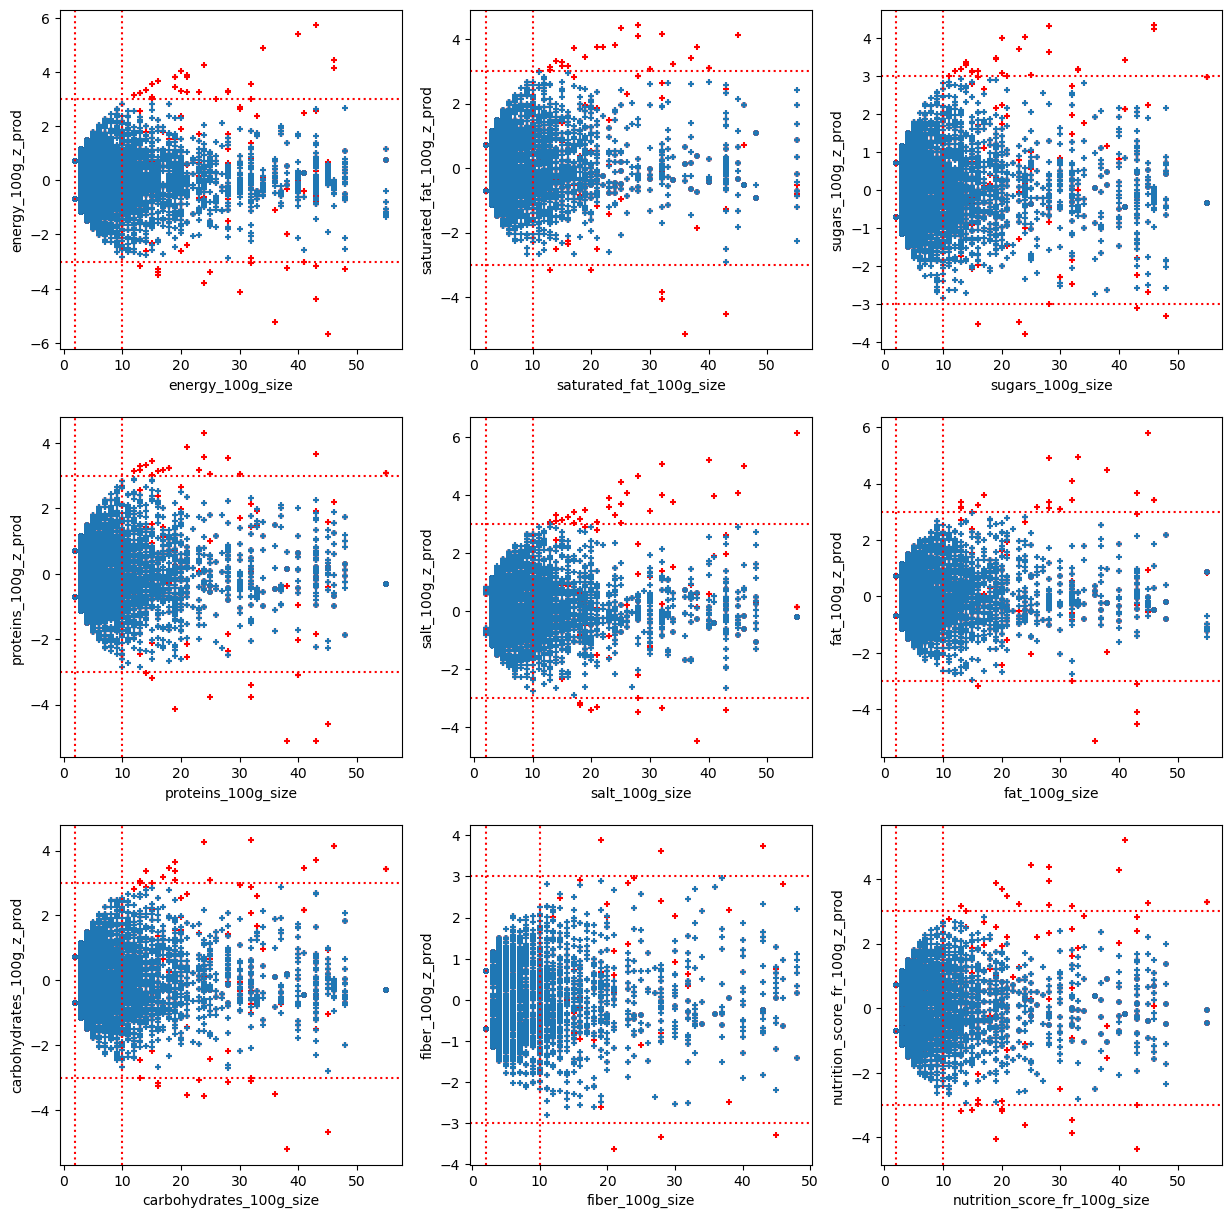

In [41]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    ax = plt.subplot(3,3,i)
    data_inlier1_stats.plot(ax= ax, kind='scatter', x=string+'_size', y=string+'_z_prod', marker='+', color='r')
    data_inlier2_stats.plot(ax= ax, kind='scatter', x=string+'_size', y=string+'_z_prod', marker='+')
    ax.axhline(y=3, color='r', linestyle=':')
    ax.axhline(y=-3, color='r', linestyle=':')
    ax.axvline(x=10, color='r', linestyle=':')
    ax.axvline(x=2, color='r', linestyle=':')
    i=i+1

plt.show()

## Médiane

### Valeurs de tri

In [42]:
p_inlier3 = {}
q_inlier3 = {}
a_inlier3 = {}
for string in feature_prediction_array:
    q_inlier3[string] = 0.999
    p_inlier3[string] = 0.95
p_inlier3['energy_100g'] = 0.88
p_inlier3['sugars_100g'] = 0.92
p_inlier3['fat_100g'] = 0.90
q_inlier3['fat_100g'] = 0.99
p_inlier3['carbohydrates_100g'] = 0.90

p_inlier3['nutrition_score_fr_100g'] = 0.77
q_inlier3['nutrition_score_fr_100g'] = 0.99

for string in feature_prediction_array:
    a_inlier3[string] = -(1-p_inlier3[string])*data_inlier2_stats[string].quantile(q_inlier3[string])**2

### Compte des valeurs supprimées

In [43]:
data_null3 = {}
for string in feature_prediction_array:
    data_null3[string] = len(data_inlier2_stats.loc[(data_inlier2_stats[string+'_size']>1)&(data_inlier2_stats[string]>0)&
          (data_inlier2_stats[string+'_med']<(data_inlier2_stats[string]+data_inlier2_stats[string]**(-1)*a_inlier3[string]))])
    data_null3[string] = data_null3[string]+len(data_inlier2_stats.loc[(data_inlier2_stats[string+'_size']>1)&(data_inlier2_stats[string+'_med']>0)&
          (data_inlier2_stats[string]<(data_inlier2_stats[string+'_med']+data_inlier2_stats[string+'_med']**(-1)*a_inlier3[string]))])
string='nutrition_score_fr_100g'
data_null3[string] = data_null3[string]+len(data_inlier2_stats.loc[(data_inlier2_stats[string+'_size']>1)&(data_inlier2_stats[string+'_med']<0)&
      (data_inlier2_stats[string+'_med']<(data_inlier2_stats[string]+(2*math.sqrt(-a_inlier3[string])-data_inlier2_stats[string])**(-1)*a_inlier3[string]))])
data_null3[string] = data_null3[string]+len(data_inlier2_stats.loc[(data_inlier2_stats[string+'_size']>1)&(data_inlier2_stats[string]<0)&
      (data_inlier2_stats[string]<(data_inlier2_stats[string+'_med']+(2*math.sqrt(-a_inlier3[string])-data_inlier2_stats[string+'_med'])**(-1)*a_inlier3[string]))])

### Tri des valeurs

In [44]:
data_inlier3_stats = data_inlier2_stats.copy()
for string in feature_prediction_array:
    data_inlier3_stats = data_inlier3_stats.loc[~((data_inlier3_stats[string+'_size']>1)&(data_inlier3_stats[string]>0)&
          (data_inlier3_stats[string+'_med']<(data_inlier3_stats[string]+data_inlier3_stats[string]**(-1)*a_inlier3[string])))]
    data_inlier3_stats = data_inlier3_stats.loc[~((data_inlier3_stats[string+'_size']>1)&(data_inlier3_stats[string+'_med']>0)&
          (data_inlier3_stats[string]<(data_inlier3_stats[string+'_med']+data_inlier3_stats[string+'_med']**(-1)*a_inlier3[string])))]
string='nutrition_score_fr_100g'
data_inlier3_stats = data_inlier3_stats.loc[~((data_inlier3_stats[string+'_size']>1)&(data_inlier3_stats[string+'_med']<0)&
      (data_inlier3_stats[string+'_med']<(data_inlier3_stats[string]+(2*math.sqrt(-a_inlier3[string])-data_inlier3_stats[string])**(-1)*a_inlier3[string])))]
data_inlier3_stats = data_inlier3_stats.loc[~((data_inlier3_stats[string+'_size']>1)&(data_inlier3_stats[string]<0)&
      (data_inlier3_stats[string]<(data_inlier3_stats[string+'_med']+(2*math.sqrt(-a_inlier3[string])-data_inlier3_stats[string+'_med'])**(-1)*a_inlier3[string])))]

### Représentation

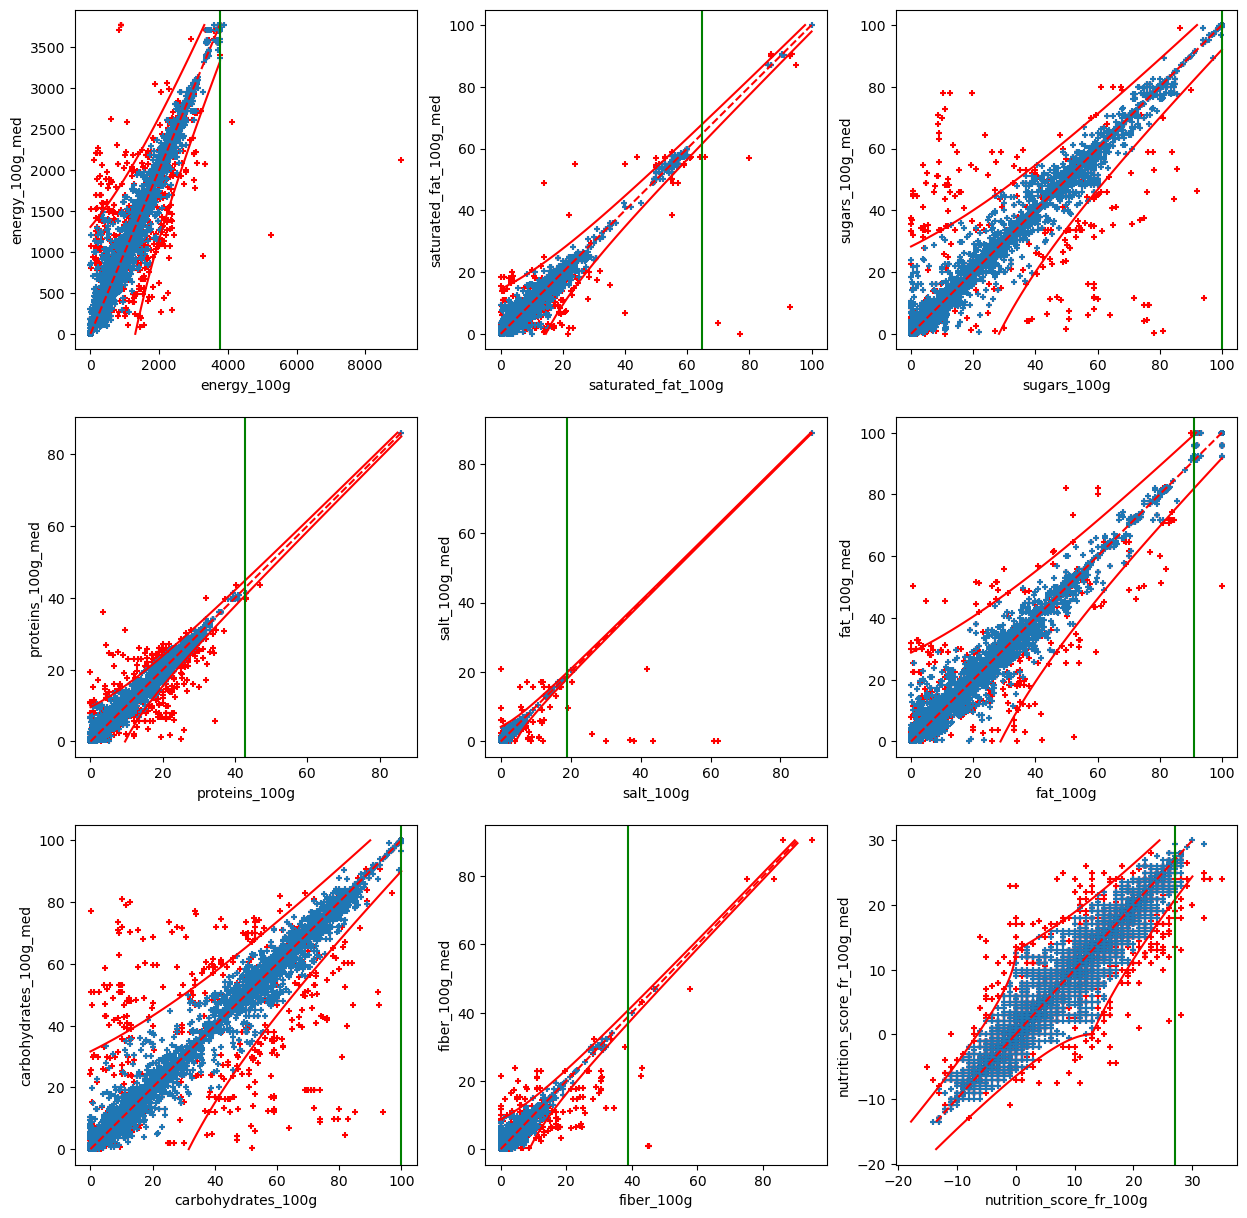

In [45]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    ax = plt.subplot(3,3,i)
    data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1].plot(ax=ax, kind='scatter', x=string, y=string+'_med', marker='+', color='r')
    test_x = [0, data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1, string+'_med'].max()]
    plt.plot(test_x, test_x, '--r')
    test_x = [math.sqrt(-a_inlier3[string])+i/50*(data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1, string+'_med'].max()-math.sqrt(-a_inlier3[string])) for i in range(51)]
    test_y = [i+a_inlier3[string]/i for i in test_x]
    plt.plot(test_x, test_y, 'r')
    plt.plot(test_y, test_x, 'r')
    data_inlier3_stats.loc[data_inlier3_stats[string+'_size']>1].plot(ax=ax, kind='scatter', x=string, y=string+'_med', marker='+')
    ax.axvline(x=data_inlier2_stats[string].quantile(q_inlier3[string]), color='g')

    if(string=='nutrition_score_fr_100g'):
        test_x = [data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1, string+'_med'].min(), 0]
        plt.plot(test_x, test_x, '--r')
        test_x = [math.sqrt(-a_inlier3[string])+i/50*(data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1, string+'_med'].min()-math.sqrt(-a_inlier3[string])) for i in range(51)]
        test_y = [i+a_inlier3[string]/(2*math.sqrt(-a_inlier3[string])-i) for i in test_x]
        plt.plot(test_x, test_y, 'r')
        plt.plot(test_y, test_x, 'r')
    i=i+1

plt.show()

## Produits seuls ou manquants

### Compte des valeurs supprimées

In [46]:
data_null4 = {}
for string in feature_prediction_array:
    data_null4[string] = len(data_inlier3_stats.loc[
        ((data_inlier3_stats[string+'_size']==1)|(data_inlier3_stats[string+'_size'].isnull()))
          &(data_inlier3_stats[string]>data_inlier3_stats.loc[data_inlier3_stats[string+'_size']>1, string].quantile(0.999))])

### Tri des valeurs

In [47]:
data_inlier4_stats = data_inlier3_stats.copy()
for string in feature_prediction_array:
    data_inlier4_stats = data_inlier4_stats.loc[
        ~(((data_inlier4_stats[string+'_size']==1)|(data_inlier4_stats[string+'_size'].isnull()))
          &(data_inlier4_stats[string]>data_inlier4_stats.loc[data_inlier4_stats[string+'_size']>1, string].quantile(0.999)))]

### Représentations

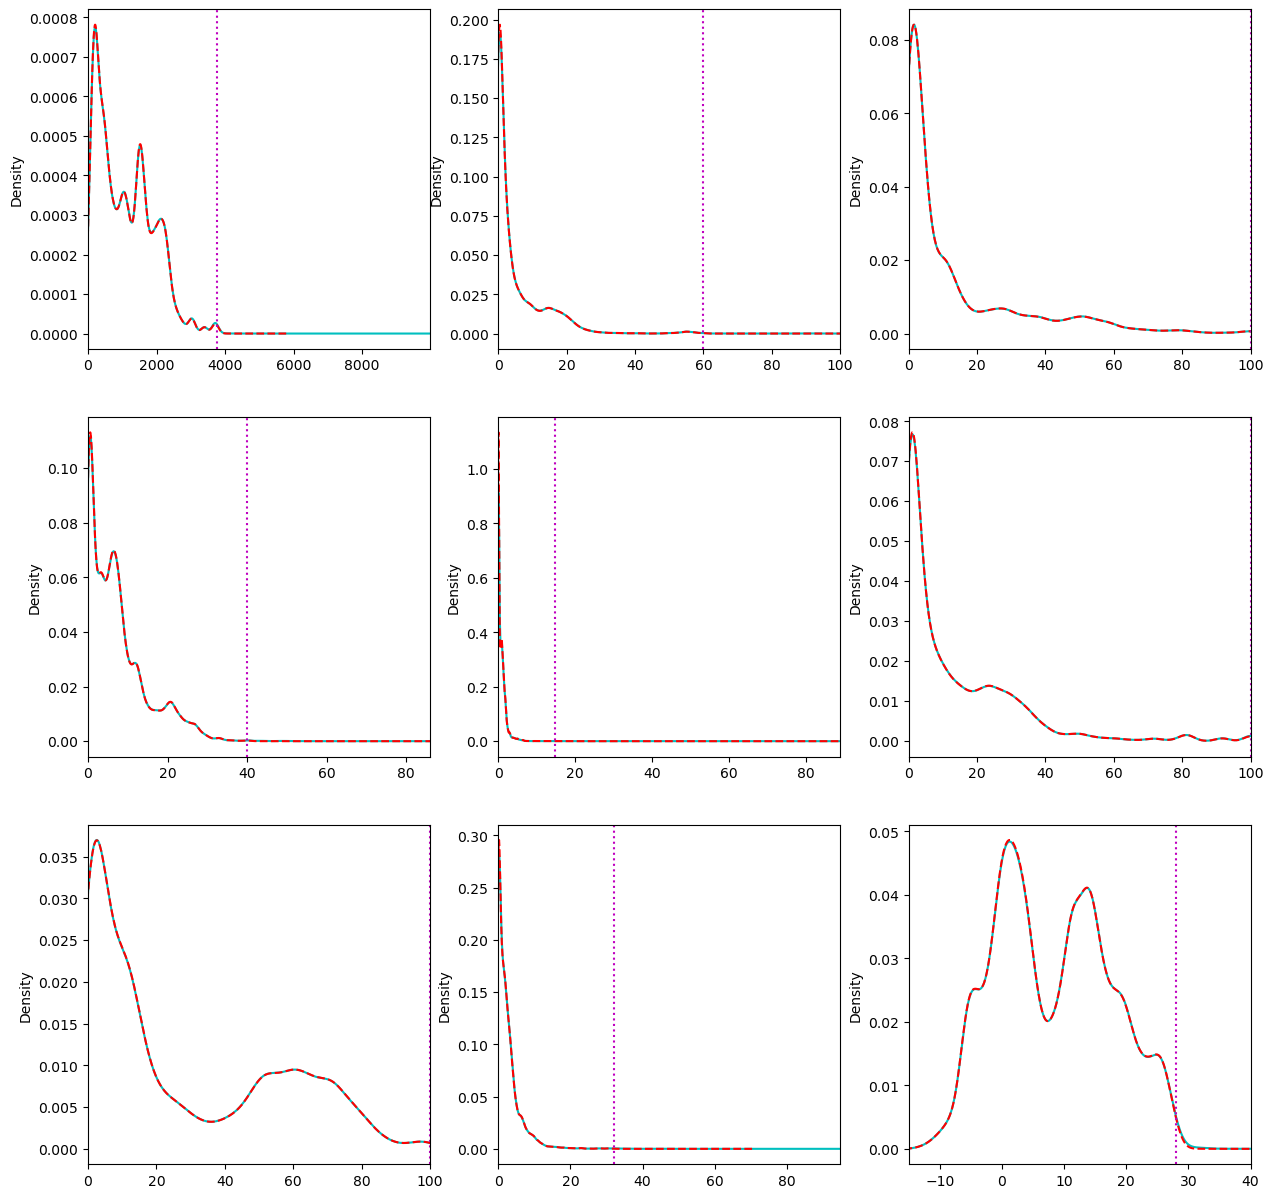

In [48]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    ax = plt.subplot(3,3,i)
    data_inlier3_stats[string].plot(kind='density', ax= ax, color='c')
    data_inlier4_stats[string].plot(kind='density', ax= ax, color='r', linestyle='--')
    ax.axvline(x= data_inlier3_stats.loc[data_inlier3_stats[string+'_size']>1, string].quantile(0.999), color='m', linestyle=':')
    plt.xlim(data_inlier1_stats[string].min(),data_inlier1_stats[string].max())
    i=i+1

plt.show()

## Résumé outliers

### Illustrations étapes

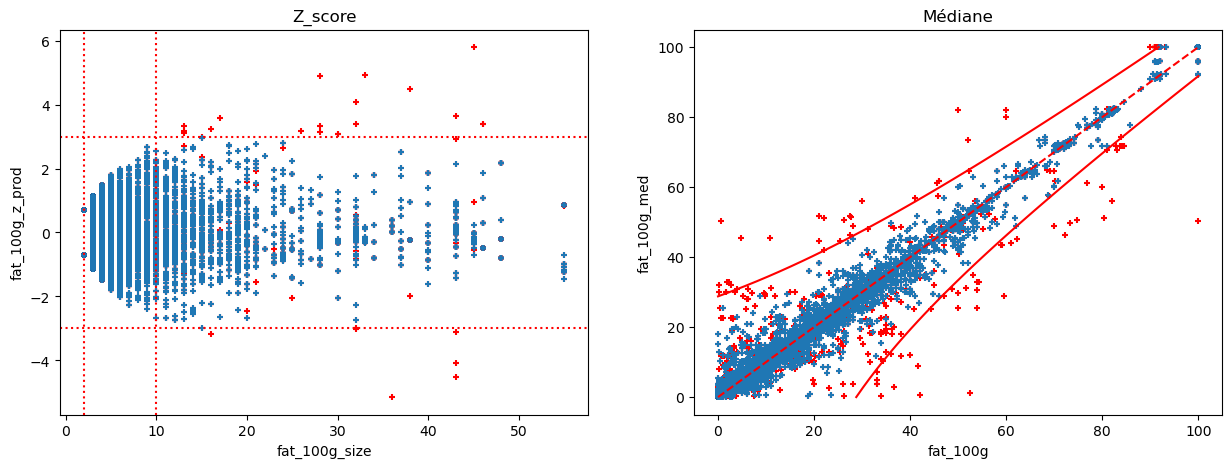

In [49]:
fig = plt.figure(figsize=(15,5))

string = 'fat_100g'

ax = plt.subplot(1,2,1)
data_inlier1_stats.plot(ax= ax, kind='scatter', x=string+'_size', y=string+'_z_prod', marker='+', color='r')
data_inlier2_stats.plot(ax= ax, kind='scatter', x=string+'_size', y=string+'_z_prod', marker='+')
ax.axhline(y=3, color='r', linestyle=':')
ax.axhline(y=-3, color='r', linestyle=':')
ax.axvline(x=10, color='r', linestyle=':')
ax.axvline(x=2, color='r', linestyle=':')
ax.set_title('Z_score')

ax = plt.subplot(1,2,2)
data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1].plot(ax=ax, kind='scatter', x=string, y=string+'_med', marker='+', color='r')
test_x = [0, data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1, string+'_med'].max()]
plt.plot(test_x, test_x, '--r')
test_x = [math.sqrt(-a_inlier3[string])+i/50*(data_inlier2_stats.loc[data_inlier2_stats[string+'_size']>1, string+'_med'].max()-math.sqrt(-a_inlier3[string])) for i in range(51)]
test_y = [i+a_inlier3[string]/i for i in test_x]
plt.plot(test_x, test_y, 'r')
plt.plot(test_y, test_x, 'r')
data_inlier3_stats.loc[data_inlier3_stats[string+'_size']>1].plot(ax=ax, kind='scatter', x=string, y=string+'_med', marker='+')
ax.set_title('Médiane')

plt.show()

### Densités

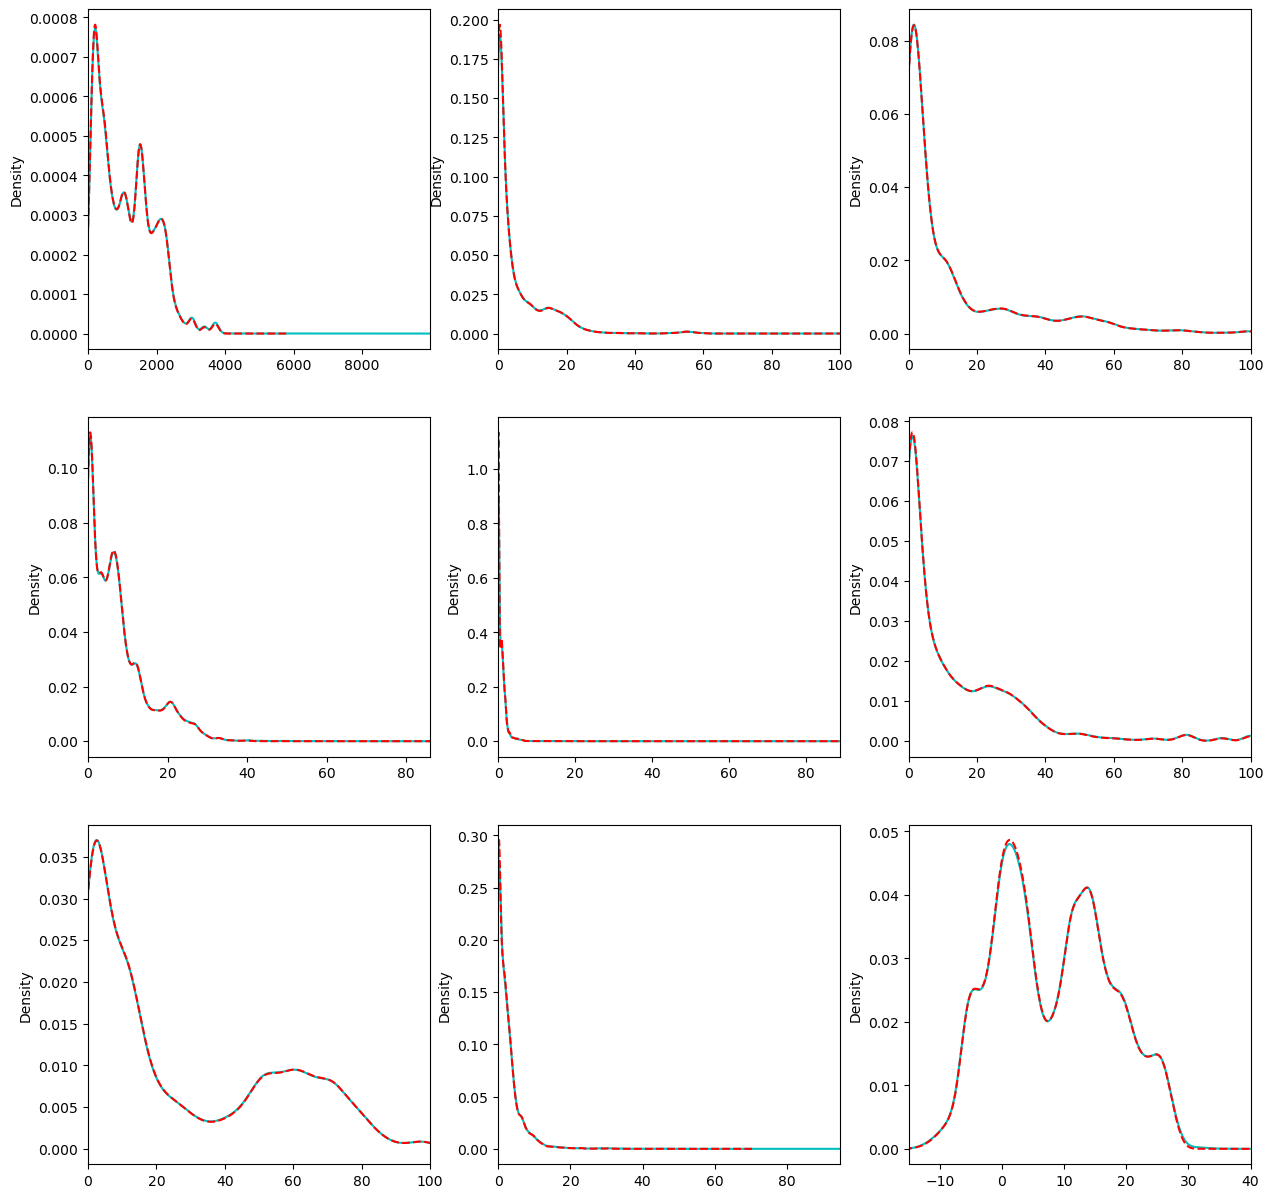

In [50]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    ax = plt.subplot(3,3,i)
    data_inlier1_stats[string].plot(kind='density', ax= ax, color='c')
    data_inlier4_stats[string].plot(kind='density', ax= ax, color='r', linestyle='--')
    plt.xlim(data_inlier1_stats[string].min(),data_inlier1_stats[string].max())
    i=i+1

plt.show()

### Répartitions

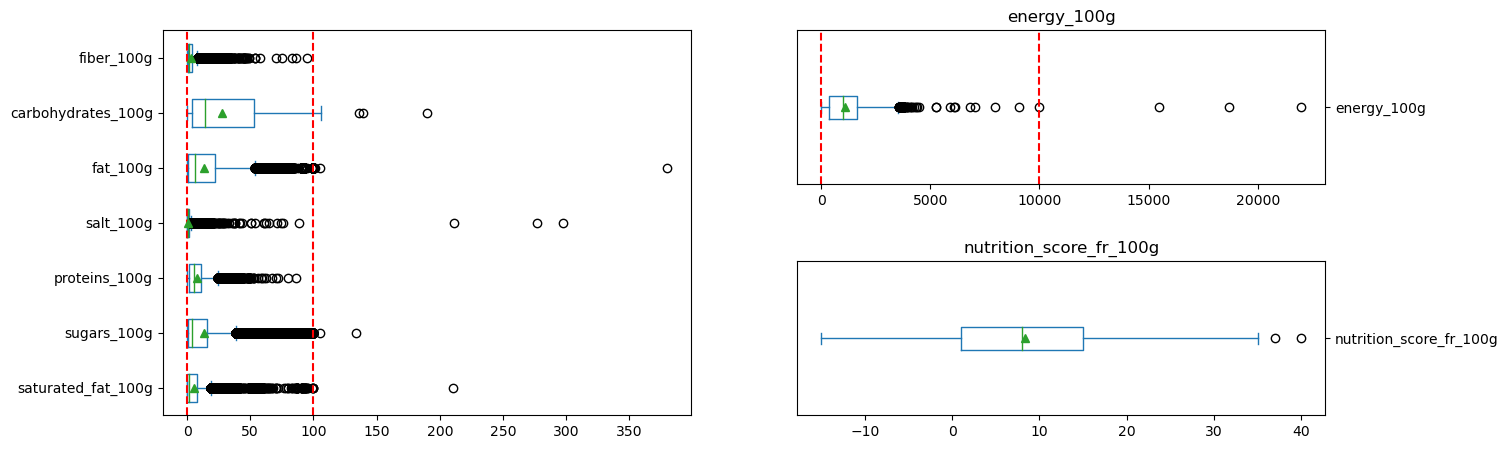

In [51]:
plot_box_data_prediction(data_selected, [[0,feature_prediction_threshold], [0,energy_threshold]])

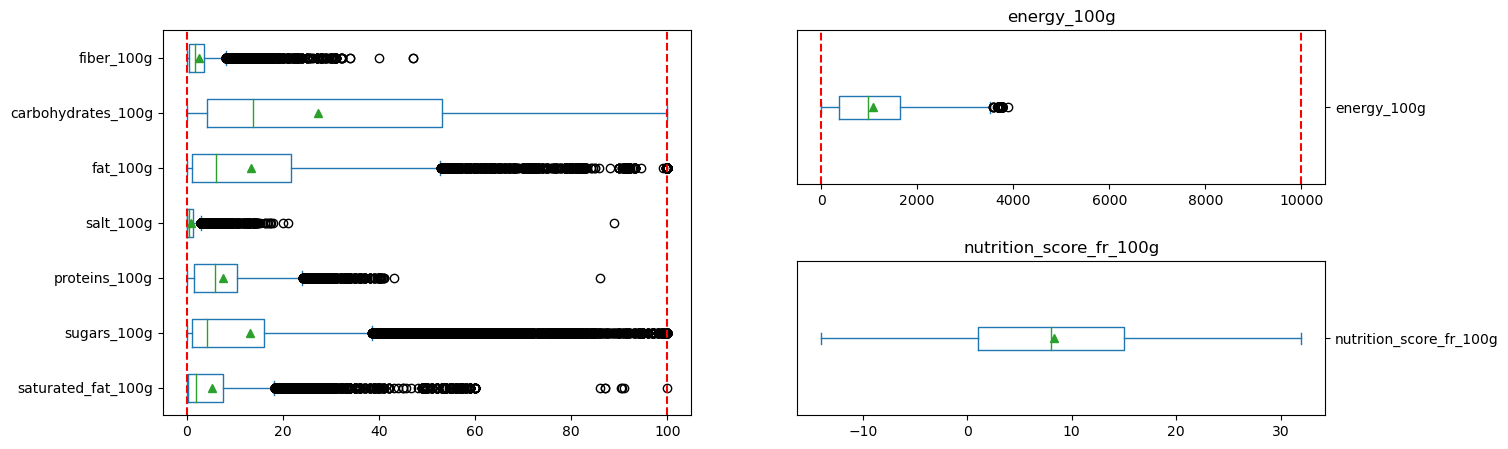

In [52]:
plot_box_data_prediction(data_inlier4_stats, [[0,feature_prediction_threshold], [0,energy_threshold]])

## Doublons et produits vides

### Doublons

In [53]:
data_inlier4_stats.loc[data_inlier4_stats['code'].duplicated(keep=False),:]

code                                       product_name  \
458           11778                                Stem Ginger Cookies   
595     41500007007                                     Yellow Mustard   
9892          11778         All Butter Reduced Fat Stem Ginger Cookies   
11277   14100097037   Soft Baked Chocolate Chunk Dark Chocolat Brownie   
51325   41500007007                                                NaN   
175026  14100097037  Soft Baked Chocolate Chunk Dark Chocolate Brow...   

                  quantity main_category_fr  energy_100g  saturated_fat_100g  \
458     225 g (10 cookies)          Cookies       1809.0                 7.0   
595           9 OZ (25.5g)       Condiments          NaN                 NaN   
9892                 225 g          Cookies       1809.0                 7.0   
11277                 244g          Cookies       1946.0                10.6   
51325                  NaN       Condiments          NaN                 NaN   
175026                244g         Biscuits       1946.0                10.6   

        sugars_100g  proteins_100g  salt_100g  fat_100g  ...  \
458            35.7            6.1       0.83      13.3  ...   
595             NaN            NaN        NaN       NaN  ...   
9892           35.7            6.1       0.83      13.3  ...   
11277          41.7            5.3       0.50      19.2  ...   
51325           NaN            NaN        NaN       NaN  ...   
175026         41.7            5.3       0.50      19.2  ...   

        nutrition_score_fr_100g_std_med  energy_100g_z_prod  \
458                                 NaN                 NaN   
595                                 NaN                 NaN   
9892                                NaN                 NaN   
11277                               NaN                 NaN   
51325                               NaN                 NaN   
175026                              NaN                 NaN   

        saturated_fat_100g_z_prod sugars_100g_z_prod  proteins_100g_z_prod  \
458                           NaN                NaN                   NaN   
595                           NaN                NaN                   NaN   
9892                          NaN                NaN                   NaN   
11277                         NaN                NaN                   NaN   
51325                         NaN                NaN                   NaN   
175026                        NaN                NaN                   NaN   

        salt_100g_z_prod  fat_100g_z_prod  carbohydrates_100g_z_prod  \
458                  NaN              NaN                        NaN   
595                  NaN              NaN                        NaN   
9892                 NaN              NaN                        NaN   
11277                NaN              NaN                        NaN   
51325                NaN              NaN                        NaN   
175026               NaN              NaN                        NaN   

        fiber_100g_z_prod  nutrition_score_fr_100g_z_prod  
458                   NaN                             NaN  
595                   NaN                             NaN  
9892                  NaN                             NaN  
11277                 NaN                             NaN  
51325                 NaN                             NaN  
175026                NaN                             NaN  

[6 rows x 68 columns]

In [54]:
data_inlier5_stats = data_inlier4_stats.copy()
data_inlier5_stats = data_inlier5_stats.drop(51325)
data_inlier5_stats = data_inlier5_stats.drop(9892)
data_inlier5_stats = data_inlier5_stats.drop(11277)

In [55]:
data_inlier = data_inlier5_stats[columns_list].copy()

### Produits vides

In [56]:
data_inlier['nb_val'] = data_inlier[feature_prediction_array].isnull().sum(axis=1)

In [57]:
data_empty = data_inlier.loc[data_inlier['nb_val']!=9].copy()

## Résumé du nettoyage

In [58]:
label_list = ['threshold', 'z_score', 'med', 'alone', 'doublons', 'vides']
loss_list = np.array([len(data_selected)-len(data_inlier1_stats),
                      len(data_inlier1_stats)-len(data_inlier2_stats),
                      len(data_inlier2_stats)-len(data_inlier3_stats),
                      len(data_inlier3_stats)-len(data_inlier4_stats),
                      len(data_inlier4_stats)-len(data_inlier5_stats),
                      len(data_inlier)-len(data_empty)
                     ])
loss_list = 100/len(data_selected)*loss_list
loss_list_cum = loss_list.cumsum()

In [59]:
outliers_freq_merge = pd.DataFrame(data=data_null.values(), index=list(data_null), columns=['threshold'])
outliers_freq_merge = pd.merge(outliers_freq_merge,
                               pd.DataFrame(data=data_null2.values(), index=list(data_null2), columns=['z_score']),
                               left_index=True, right_index=True)
outliers_freq_merge = pd.merge(outliers_freq_merge,
                               pd.DataFrame(data=data_null3.values(), index=list(data_null3), columns=['med']),
                               left_index=True, right_index=True)
outliers_freq_merge = pd.merge(outliers_freq_merge,
                               pd.DataFrame(data=data_null4.values(), index=list(data_null4), columns=['alone']),
                               left_index=True, right_index=True)
outliers_freq_merge = outliers_freq_merge/len(data_selected)*100

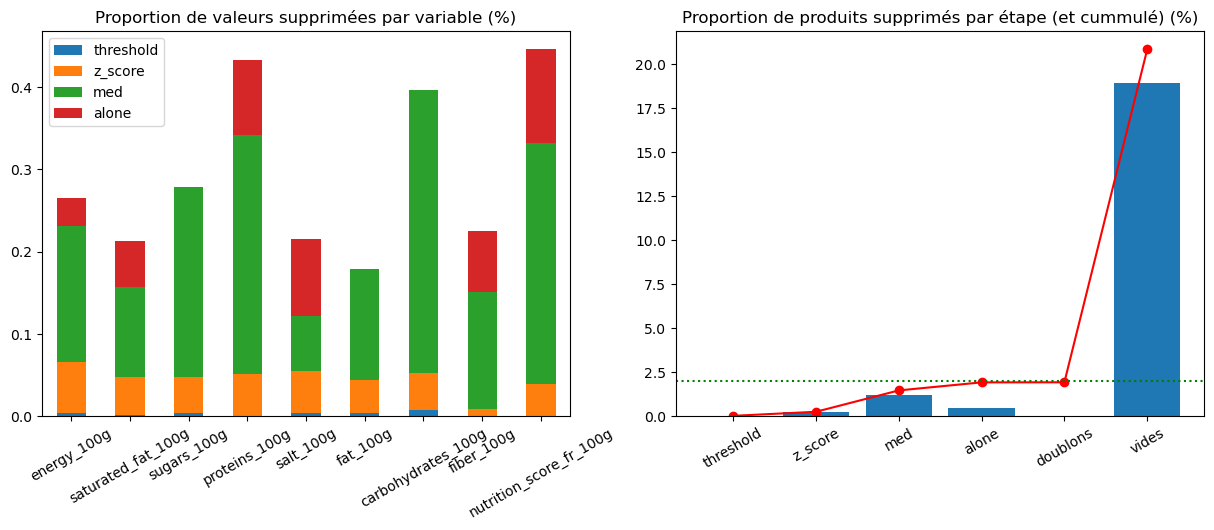

In [60]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
outliers_freq_merge.plot(ax=ax, kind='bar', stacked=True)
plt.xticks(rotation=30)
ax.legend()
ax.set_title('Proportion de valeurs supprimées par variable (%)')

ax = plt.subplot(1,2,2)
ax.bar(label_list, loss_list)
ax.plot(label_list, loss_list_cum,c="red",marker='o')
ax.set_title('Proportion de produits supprimés par étape (et cummulé) (%)')
ax.axhline(2, color='g', linestyle=':')
plt.xticks(rotation=30)

plt.show()

### Valeurs manquantes avant traitement

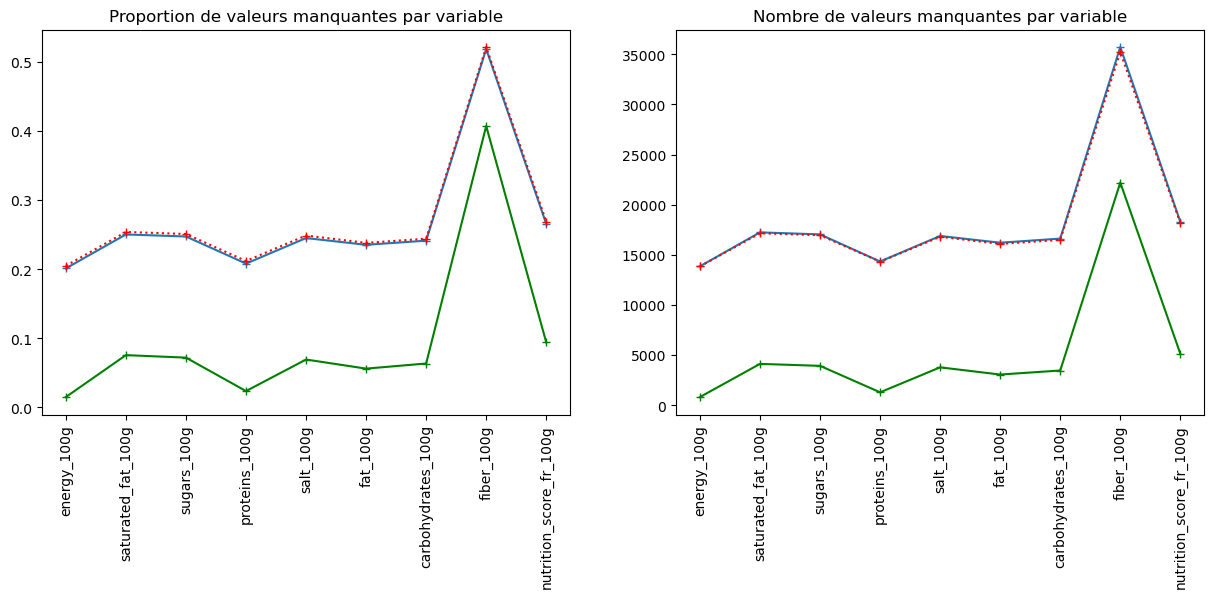

In [61]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
(data_selected[feature_prediction_array].isnull().sum()/len(data_selected)).plot(ax=ax, marker='+', rot=90)
(data_inlier[feature_prediction_array].isnull().sum()/len(data_inlier)).plot(ax=ax, marker='+', rot=90, color='r', linestyle=':')
(data_empty[feature_prediction_array].isnull().sum()/len(data_empty)).plot(ax=ax, marker='+', rot=90, color='g')
ax.set_title('Proportion de valeurs manquantes par variable')

ax = plt.subplot(1,2,2)
data_selected[feature_prediction_array].isnull().sum().plot(ax=ax, marker='+', rot=90)
data_inlier[feature_prediction_array].isnull().sum().plot(ax=ax, marker='+', rot=90, color='r', linestyle=':')
data_empty[feature_prediction_array].isnull().sum().plot(ax=ax, marker='+', rot=90, color='g')
ax.set_title('Nombre de valeurs manquantes par variable')

plt.show()

# Imputation

## Statistiques par produits et catégories

In [62]:
data_inlier_grouped_prod = data_empty.groupby('product_name')
data_inlier_grouped_cat = data_empty.groupby('main_category_fr')

In [63]:
data_inlier_stats_prod = pd.DataFrame()
for string in feature_prediction_array:
    data_inlier_stats_prod[string+'_max'] = data_inlier_grouped_prod[string].max()
    data_inlier_stats_prod[string+'_med'] = data_inlier_grouped_prod[string].median()
    data_inlier_stats_prod[string+'_std'] = data_inlier_grouped_prod[string].std()
data_inlier_stats_cat = pd.DataFrame()
for string in feature_prediction_array:
    data_inlier_stats_cat[string+'_max'] = data_inlier_grouped_cat[string].max()

In [64]:
data_inlier_stats = data_empty.join(data_inlier_stats_prod, on='product_name', rsuffix='_prod')
data_inlier_stats = data_inlier_stats.join(data_inlier_stats_cat, on='main_category_fr', rsuffix='_cat')

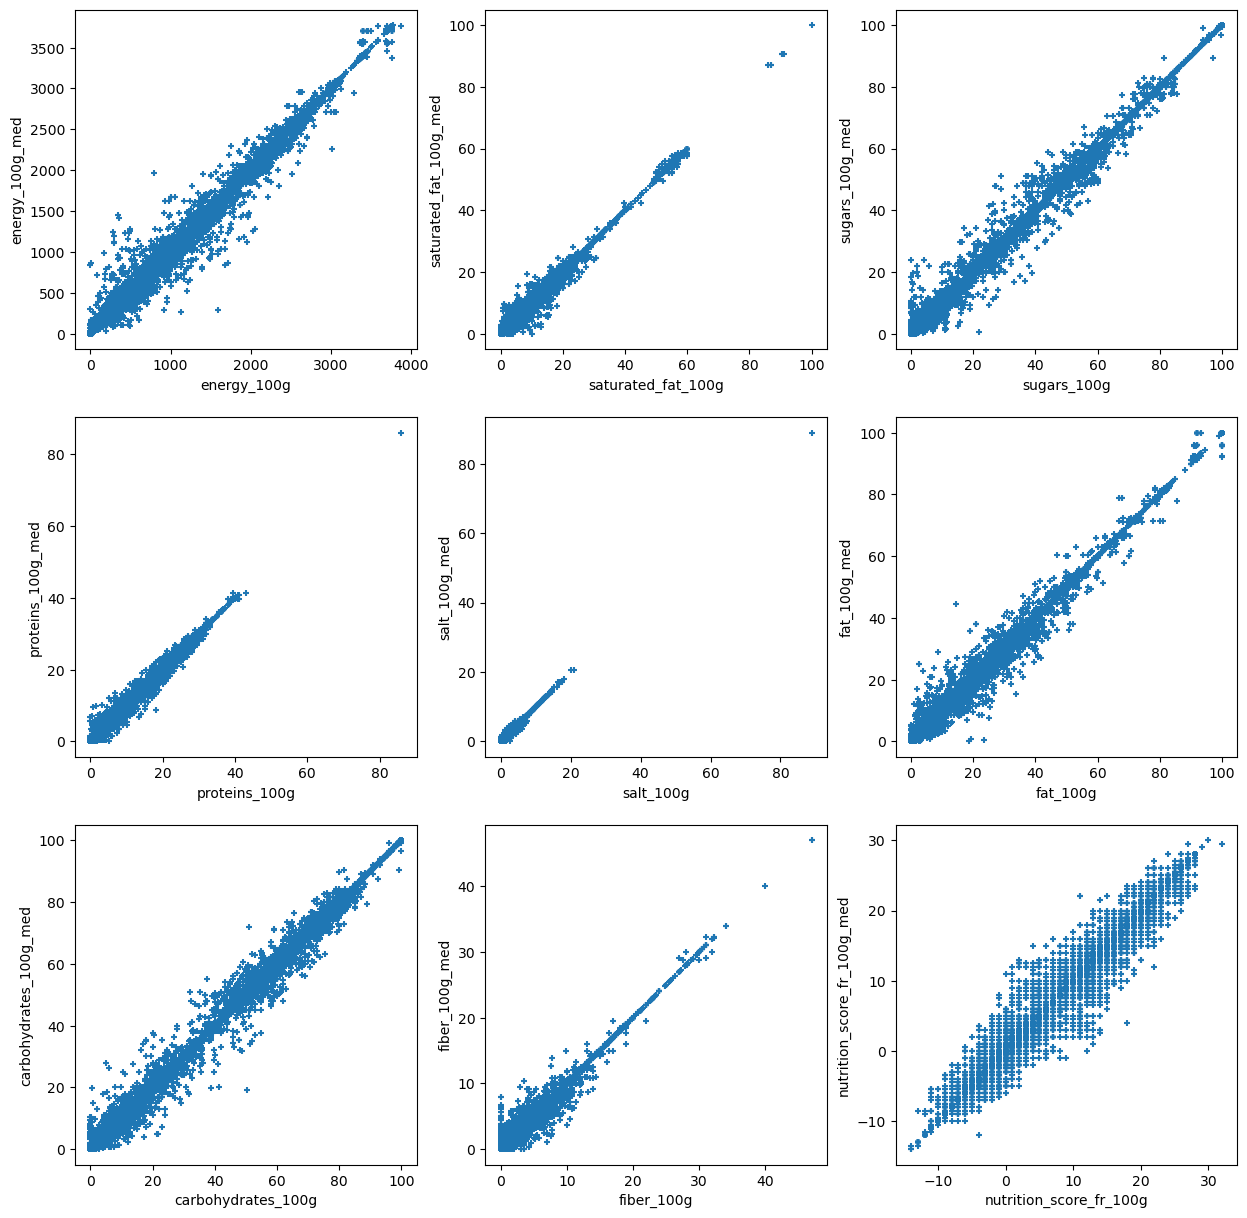

In [65]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    test_x = [0, data_inlier_stats[string].quantile(0.99), data_inlier_stats[string].max()]
    test_y = [1.5, 0.25, 0.25]
    ax = plt.subplot(3,3,i)
    data_inlier_stats.plot(ax=ax, kind='scatter', x=string, y=string+'_med', marker='+')
    i=i+1

plt.show()

## Mises à zero et à la médiane

### Mise à zero produits

In [66]:
data_full1_stats = data_inlier_stats.copy()
for string in feature_prediction_array:
    data_full1_stats.loc[(data_full1_stats[string].isnull())&(data_full1_stats[string+'_max']==0), string] = 0

### Mise à zero catégories

In [67]:
data_full2_stats = data_full1_stats.copy()
for string in feature_prediction_array:
    data_full2_stats.loc[(data_full2_stats[string].isnull())&(data_full2_stats[string+'_max_cat']==0), string] = 0

### Mise à la médiane produits

In [68]:
data_full3_stats = data_full2_stats.copy()
for string in feature_prediction_array:
    data_full3_stats.loc[data_full3_stats[string].isnull(), string] = data_full3_stats.loc[data_full3_stats[string].isnull(), string+'_med']

### Vérification de la densité

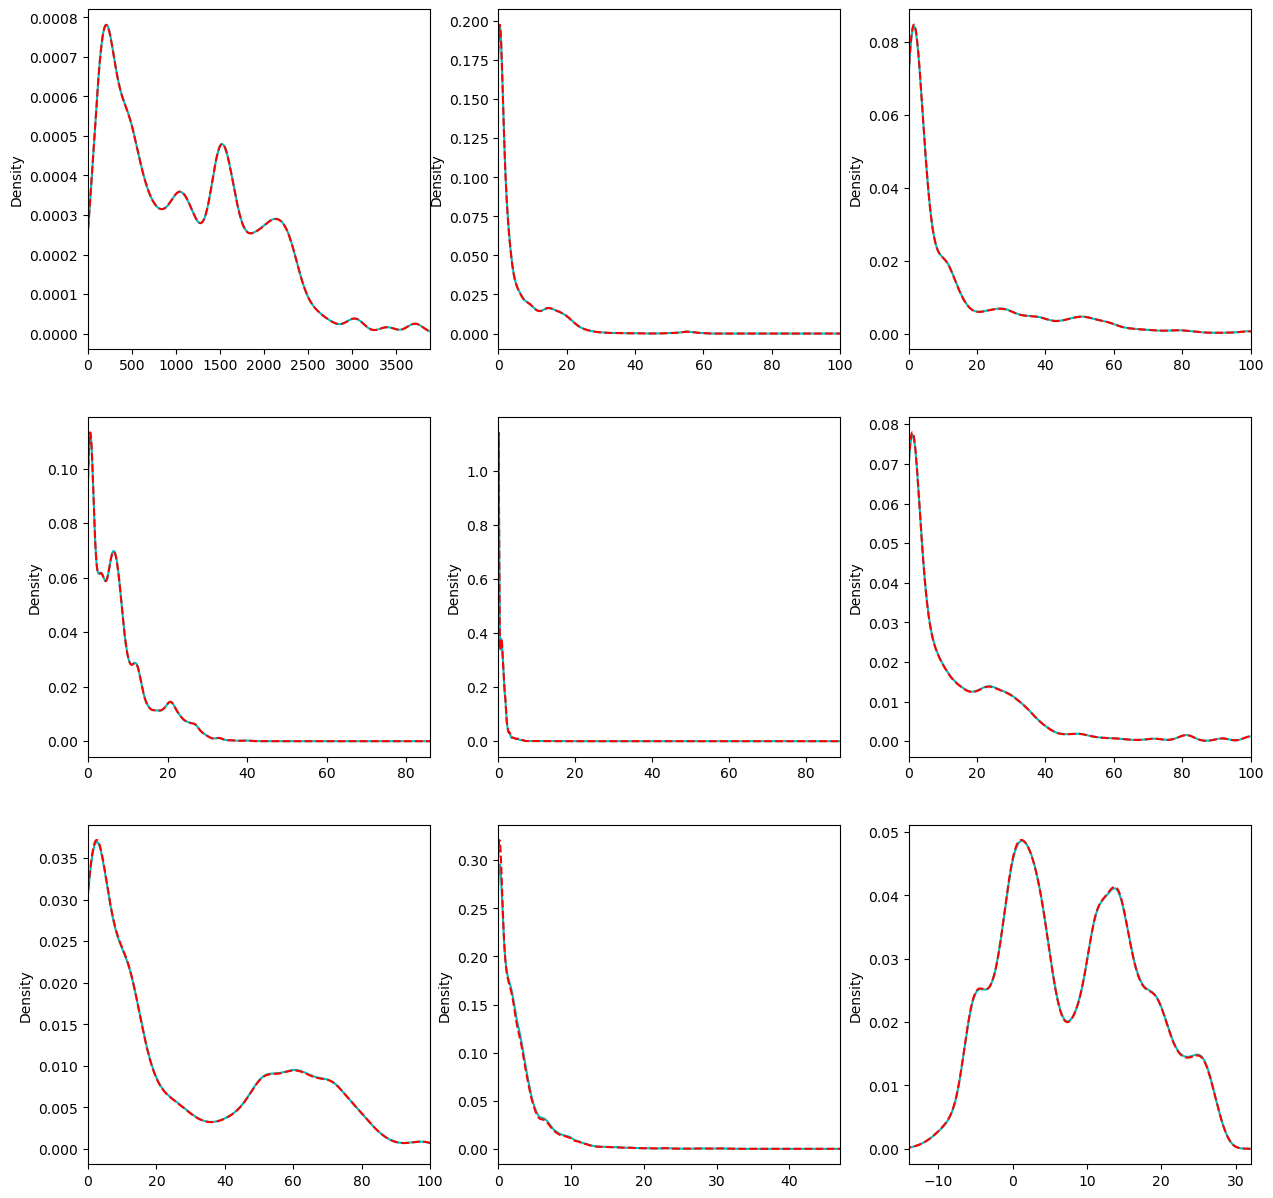

In [69]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    ax = plt.subplot(3,3,i)
    data_inlier[string].plot(kind='density', ax= ax, color='c')
    data_full3_stats[string].plot(kind='density', ax= ax, color='r', linestyle='--')
    plt.xlim(data_inlier[string].min(),data_inlier[string].max())
    i=i+1

plt.show()

## Traitement spécifique des fibres

In [70]:
categories_fiberfree_array = ['Chocolats', 'Fromages', 'Snacks sucrés', 'Bonbons', 'Epices', 'Produits d\'élevages', 'Produits à tartiner salés',
                             'Viandes', 'Biscuits', 'Condiments', 'Gâteaux', 'Laits', 'Volailles', 'Saucisses', 'Saucissons', 'Snacks salés',
                             'Sodas', 'Infusions', 'Jambons', 'Beurres', 'Thés', 'Chips et frites','Charcuteries', 'Glaces', 'Sandwichs',
                             'Produits de la mer', 'Poissons', 'Saumons', 'Sucres', 'Vinaigres','Thons', 'Riz', 'Sardines en conserve']

In [71]:
data_full3_stats['nb_val'] = data_full3_stats[feature_prediction_array].isnull().sum(axis=1)

In [72]:
data_full4_stats = data_full3_stats.copy()
for string in categories_fiberfree_array:
    data_full4_stats.loc[(data_full4_stats['fiber_100g'].isnull())
    &(data_full4_stats['main_category_fr'].str.contains(string, case=False))
    &((data_full4_stats['nb_val']==1)|(data_full4_stats['nb_val']==6)),
    'fiber_100g']=0

## Résumé avant KNN

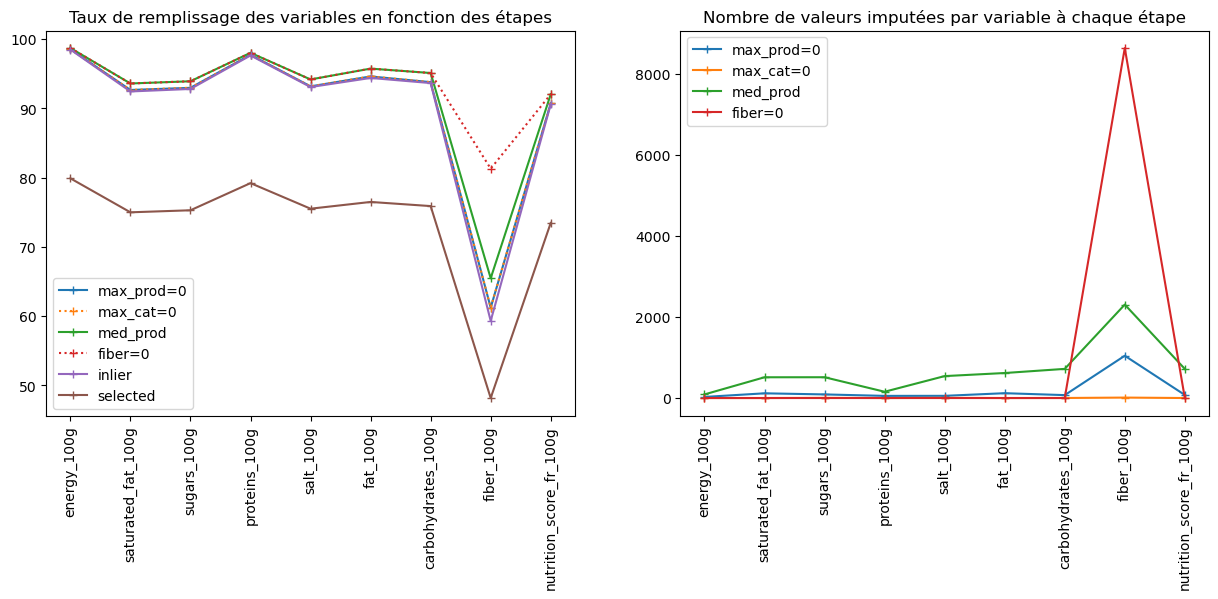

In [73]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
(100-data_full1_stats[feature_prediction_array].isnull().sum()/len(data_full1_stats)*100).plot(ax=ax, marker='+', rot=90, label='max_prod=0')
(100-data_full2_stats[feature_prediction_array].isnull().sum()/len(data_full2_stats)*100).plot(ax=ax, marker='+', rot=90, linestyle=':', label='max_cat=0')
(100-data_full3_stats[feature_prediction_array].isnull().sum()/len(data_full3_stats)*100).plot(ax=ax, marker='+', rot=90, label='med_prod')
(100-data_full4_stats[feature_prediction_array].isnull().sum()/len(data_full4_stats)*100).plot(ax=ax, marker='+', rot=90, linestyle=':', label='fiber=0')
(100-data_inlier_stats[feature_prediction_array].isnull().sum()/len(data_inlier_stats)*100).plot(ax=ax, marker='+', rot=90, label='inlier')
(100-data_selected[feature_prediction_array].isnull().sum()/len(data_selected)*100).plot(ax=ax, marker='+', rot=90, label='selected')
ax.legend()
ax.set_title('Taux de remplissage des variables en fonction des étapes')

ax = plt.subplot(1,2,2)
(data_inlier_stats[feature_prediction_array].isnull().sum() - data_full1_stats[feature_prediction_array].isnull().sum()).plot(
    ax=ax, marker='+', rot=90, label='max_prod=0')
(data_full1_stats[feature_prediction_array].isnull().sum() - data_full2_stats[feature_prediction_array].isnull().sum()).plot(
    ax=ax, marker='+', rot=90, label='max_cat=0')
(data_full2_stats[feature_prediction_array].isnull().sum() - data_full3_stats[feature_prediction_array].isnull().sum()).plot(
    ax=ax, marker='+', rot=90, label='med_prod')
(data_full3_stats[feature_prediction_array].isnull().sum() - data_full4_stats[feature_prediction_array].isnull().sum()).plot(
    ax=ax, marker='+', rot=90, label='fiber=0')
ax.legend()
ax.set_title('Nombre de valeurs imputées par variable à chaque étape')

plt.show()

## KNN

### Fonctions

In [74]:
def impute_KNN_filter(data, nb_val, feature_array):
    data_return = data.loc[(data['nb_val']==0)|(data['nb_val']==nb_val)].copy()
    for string in feature_array:
        data_return = data_return.loc[(data_return['nb_val']==0)|(data_return[string].isnull())]

    imputer = KNNImputer()
    imputed_data = imputer.fit_transform(data_return[feature_prediction_array])
    data_temp = pd.DataFrame(imputed_data)
    data_temp.columns = feature_prediction_array

    data_return = data_return.reset_index(drop=True)
    for string in feature_array:
        data_return[string] = data_temp[string]
    
    return data_return

### Choix des imputations

In [75]:
data_full4_stats['nb_val'] = data_full4_stats[feature_prediction_array].isnull().sum(axis=1)

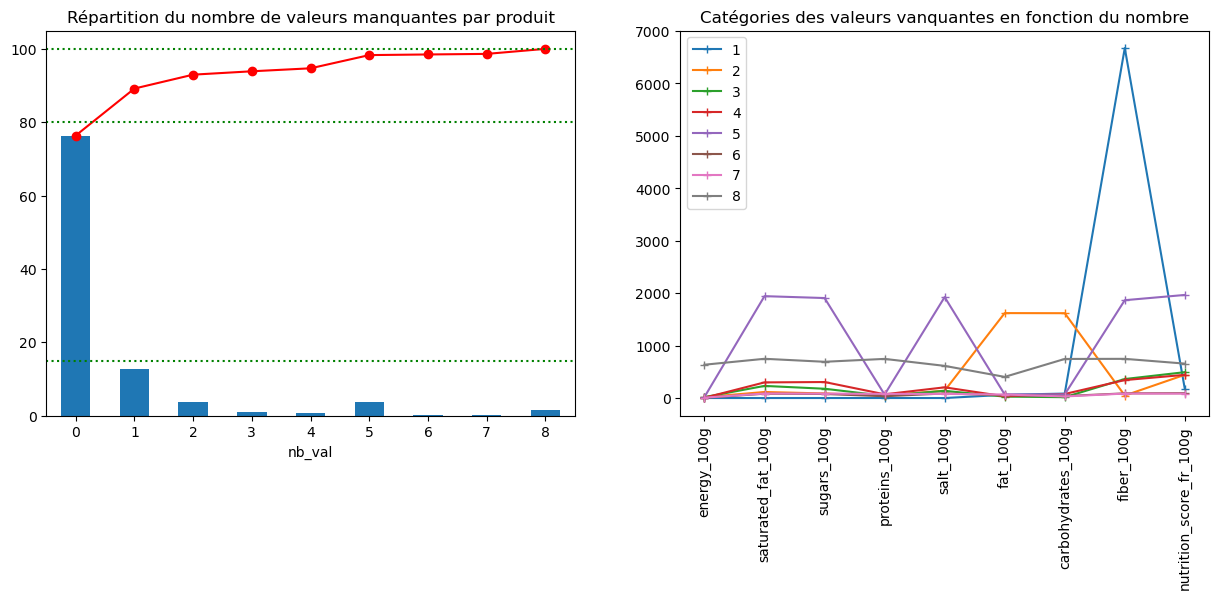

In [76]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
(data_full4_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(kind='bar')
(data_full4_stats['nb_val'].value_counts().sort_index().cumsum()/len(data_empty)*100).plot(c='red', marker='o')
ax.axhline(80, linestyle=':', color='g')
ax.axhline(100, linestyle=':', color='g')
ax.axhline(15, linestyle=':', color='g')
ax.set_title('Répartition du nombre de valeurs manquantes par produit')

ax = plt.subplot(1,2,2)
for i in range(1,9):
    data_full4_stats.loc[data_full4_stats['nb_val']==i, feature_prediction_array].isnull().sum().plot(ax=ax, marker='+', rot=90, label=i)
ax.legend()
ax.set_title('Catégories des valeurs vanquantes en fonction du nombre')

plt.show()

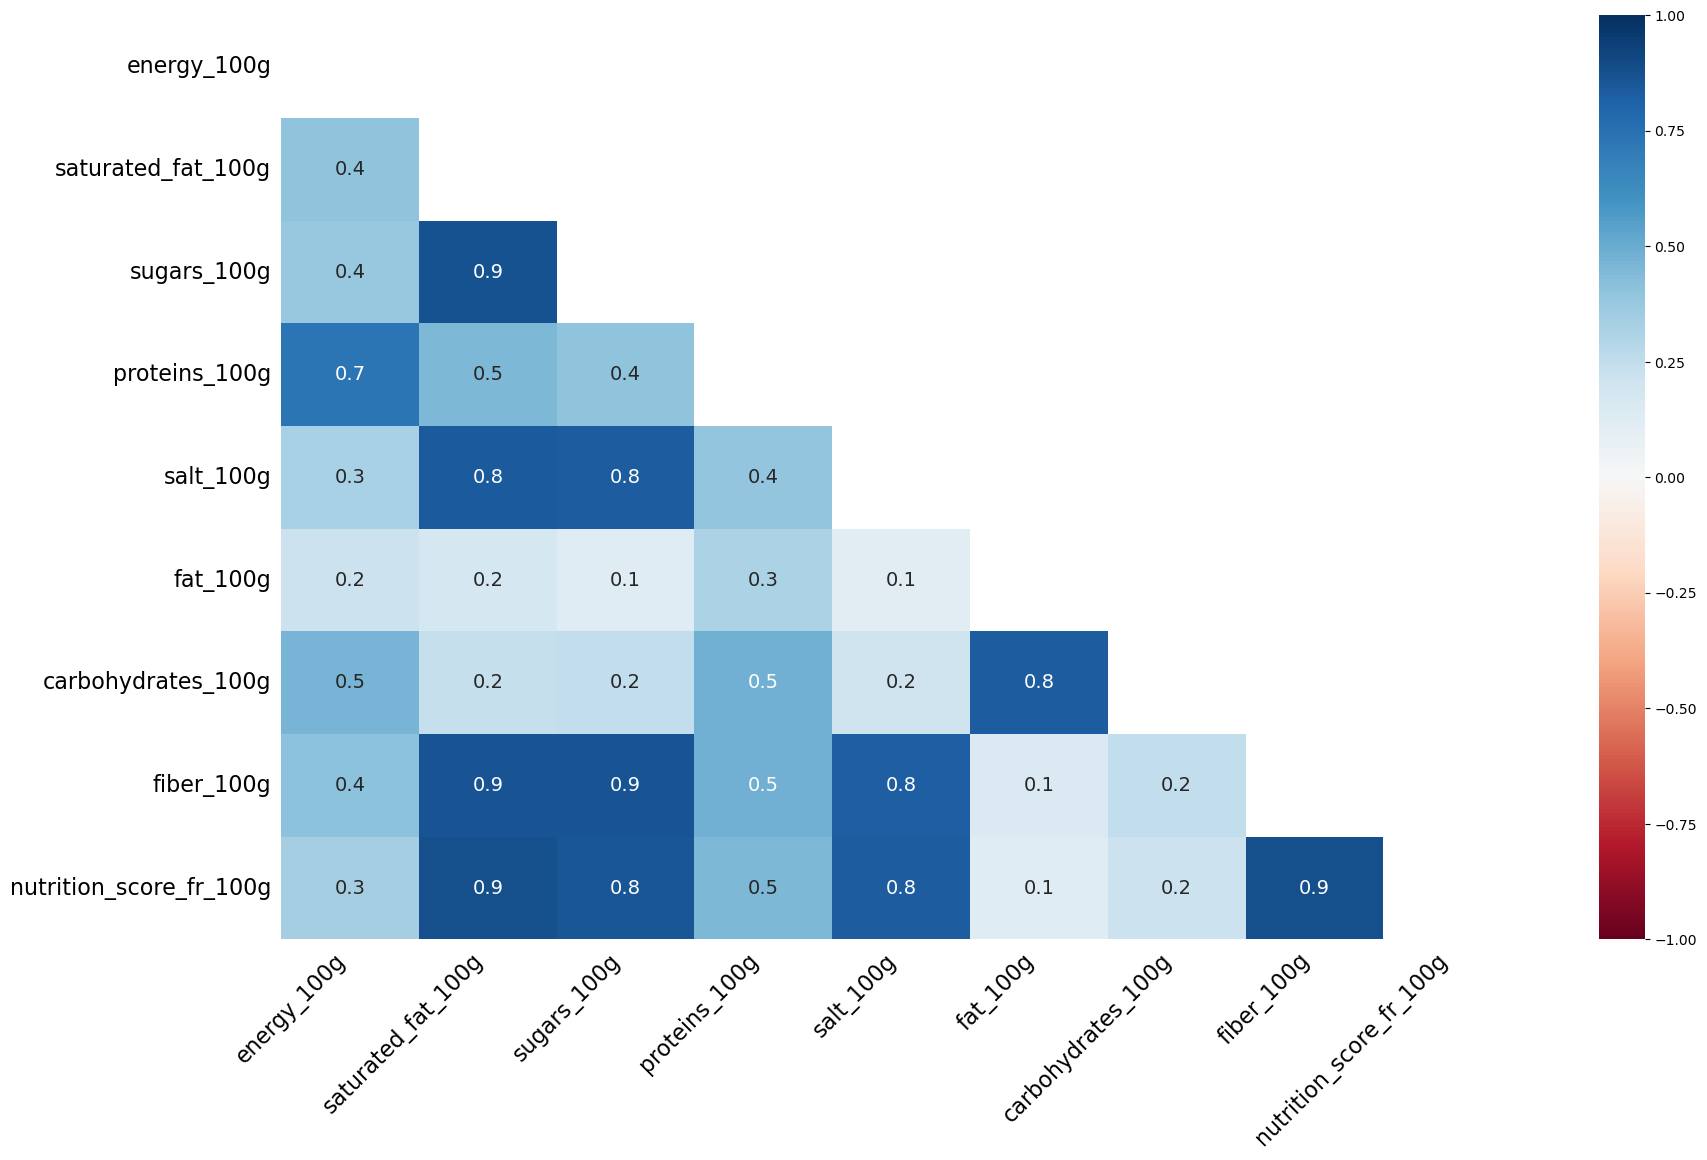

In [77]:
msno.heatmap(data_full4_stats.loc[(data_full4_stats['nb_val']!=9)&(data_full4_stats['nb_val']!=1), feature_prediction_array])
plt.show()

### Features d'imputation

In [78]:
KNN_feature_1_array = ['fiber_100g']

In [79]:
KNN_feature_2_array = ['fat_100g', 'carbohydrates_100g']

In [80]:
KNN_feature_5_array = ['saturated_fat_100g', 'sugars_100g', 'salt_100g', 'fiber_100g', 'nutrition_score_fr_100g']

### Imputations

In [81]:
data_full5a_stats = impute_KNN_filter(data_full4_stats, 1, KNN_feature_1_array)

In [82]:
data_full5b_stats = impute_KNN_filter(data_full4_stats, 2, KNN_feature_2_array)

In [83]:
data_full5c_stats = impute_KNN_filter(data_full4_stats, 5, KNN_feature_5_array)

### Concaténation des valeurs imputées

In [84]:
data_full5_stats = data_full4_stats.loc[(data_full4_stats['nb_val']==0)].copy()
data_full5_stats = pd.concat([data_full5_stats, data_full5a_stats.loc[data_full5a_stats['nb_val']>0]])
data_full5_stats = pd.concat([data_full5_stats, data_full5b_stats.loc[data_full5b_stats['nb_val']>0]])
data_full5_stats = pd.concat([data_full5_stats, data_full5c_stats.loc[data_full5c_stats['nb_val']>0]])

In [85]:
data_full5_stats['nb_val'] = data_full5_stats[feature_prediction_array].isnull().sum(axis=1)

### Vérification de la densité (KNN)

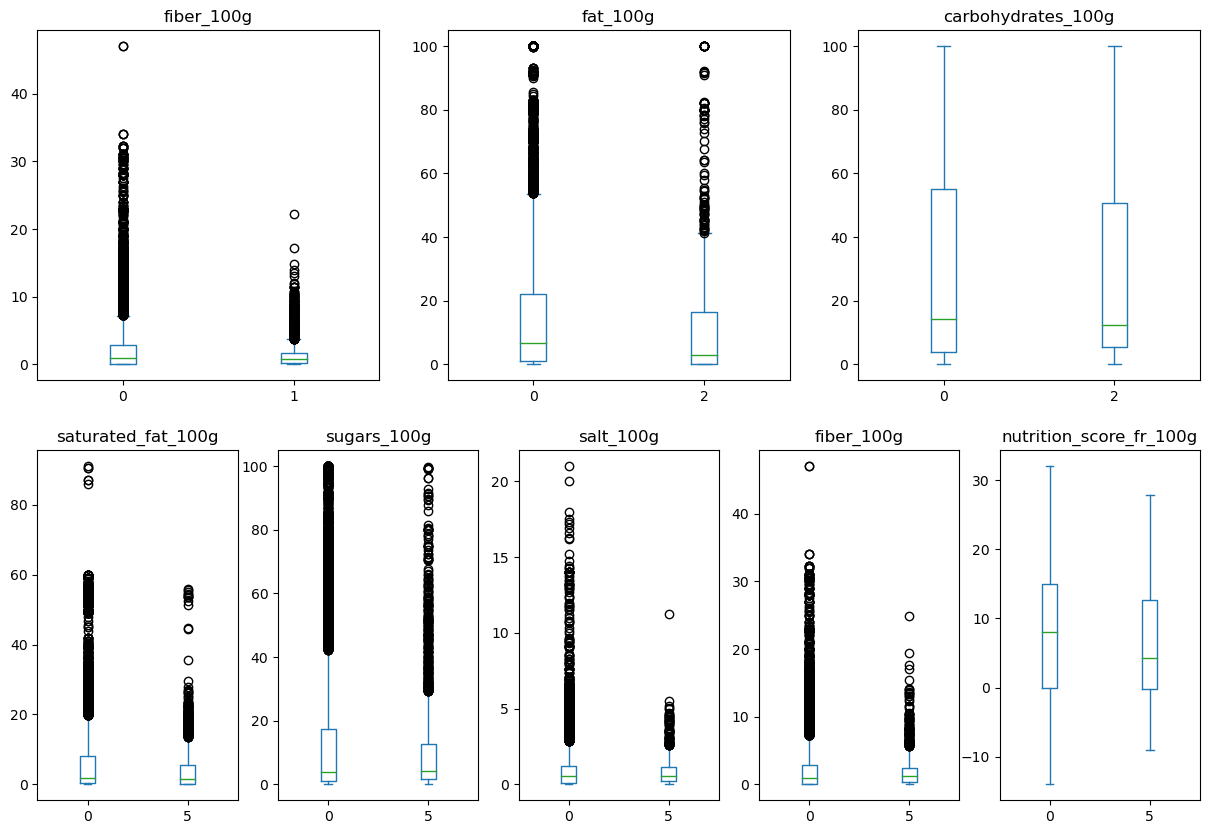

In [86]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,3,1)
pd.pivot_table(data_full5a_stats, values=KNN_feature_1_array[0], columns='nb_val', index=data_full5a_stats.index).plot(ax=ax, kind='box')
ax.set_title(KNN_feature_1_array[0])

i=2
for string in KNN_feature_2_array:
    ax = plt.subplot(2,3,i)
    pd.pivot_table(data_full5b_stats, values=string, columns='nb_val', index=data_full5b_stats.index).plot(ax=ax, kind='box')
    ax.set_title(string)
    i=i+1

i=6
for string in KNN_feature_5_array:
    ax = plt.subplot(2,5,i)
    pd.pivot_table(data_full5c_stats, values=string, columns='nb_val', index=data_full5c_stats.index).plot(ax=ax, kind='box')
    ax.set_title(string)
    i=i+1

plt.show()

## Résumé de l'imputation

In [87]:
data_full = data_full5_stats[columns_list].copy()

### Préparation des variables

In [88]:
data_inlier_stats['nb_val'] = data_inlier_stats[feature_prediction_array].isnull().sum(axis=1)
data_full1_stats['nb_val'] = data_full1_stats[feature_prediction_array].isnull().sum(axis=1)
data_full2_stats['nb_val'] = data_full2_stats[feature_prediction_array].isnull().sum(axis=1)
data_full3_stats['nb_val'] = data_full3_stats[feature_prediction_array].isnull().sum(axis=1)

In [89]:
label_list = ['max_prod=0', 'max_cat=0', 'med_prod', 'fiber=0', 'KNN_fiber', 'KNN_val2', 'KNN_val5']
loss_list = np.array([len(data_full1_stats.loc[data_full1_stats['nb_val']==0])-len(data_inlier_stats.loc[data_inlier_stats['nb_val']==0]),
                      len(data_full2_stats.loc[data_full2_stats['nb_val']==0])-len(data_full1_stats.loc[data_full1_stats['nb_val']==0]),
                      len(data_full3_stats.loc[data_full3_stats['nb_val']==0])-len(data_full2_stats.loc[data_full2_stats['nb_val']==0]),
                      len(data_full4_stats.loc[data_full4_stats['nb_val']==0])-len(data_full3_stats.loc[data_full3_stats['nb_val']==0]),
                      len(data_full5a_stats.loc[data_full5a_stats['nb_val']>0]),
                      len(data_full5b_stats.loc[data_full5b_stats['nb_val']>0]),
                      len(data_full5c_stats.loc[data_full5c_stats['nb_val']>0])])
loss_list = 100/len(data_selected)*loss_list
loss_list_cum = loss_list.cumsum()

In [90]:
data_stand_stats = data_full4_stats.loc[~data_full4_stats['code'].isin(data_full5_stats['code'])]

In [91]:
nb_val_prop_merge = pd.merge(data_inlier_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100,
                             data_full1_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100,
                             on='nb_val')
nb_val_prop_merge.columns = ['inlier', 'max_prod=0']
nb_val_prop_merge = pd.merge(nb_val_prop_merge, data_full2_stats['nb_val'].value_counts().sort_index()/len(data_selected)*100, on='nb_val')
nb_val_prop_merge.rename(columns={'count':'max_cat=0'}, inplace=True) 
nb_val_prop_merge = pd.merge(nb_val_prop_merge, data_full3_stats['nb_val'].value_counts().sort_index()/len(data_selected)*100, on='nb_val')
nb_val_prop_merge.rename(columns={'count':'med_prod'}, inplace=True)
nb_val_prop_merge = pd.merge(nb_val_prop_merge, data_full4_stats['nb_val'].value_counts().sort_index()/len(data_selected)*100, on='nb_val')
nb_val_prop_merge.rename(columns={'count':'fiber=0'}, inplace=True)
nb_val_prop_merge = pd.merge(nb_val_prop_merge, data_stand_stats['nb_val'].value_counts().sort_index()/len(data_selected)*100, on='nb_val', how='outer')
nb_val_prop_merge.rename(columns={'count':'KNN'}, inplace=True)

In [92]:
nb_val_prop_pivot = pd.pivot_table(nb_val_prop_merge, values=nb_val_prop_merge.columns, columns='nb_val', sort=False)

### Proportion des étapes d'imputation

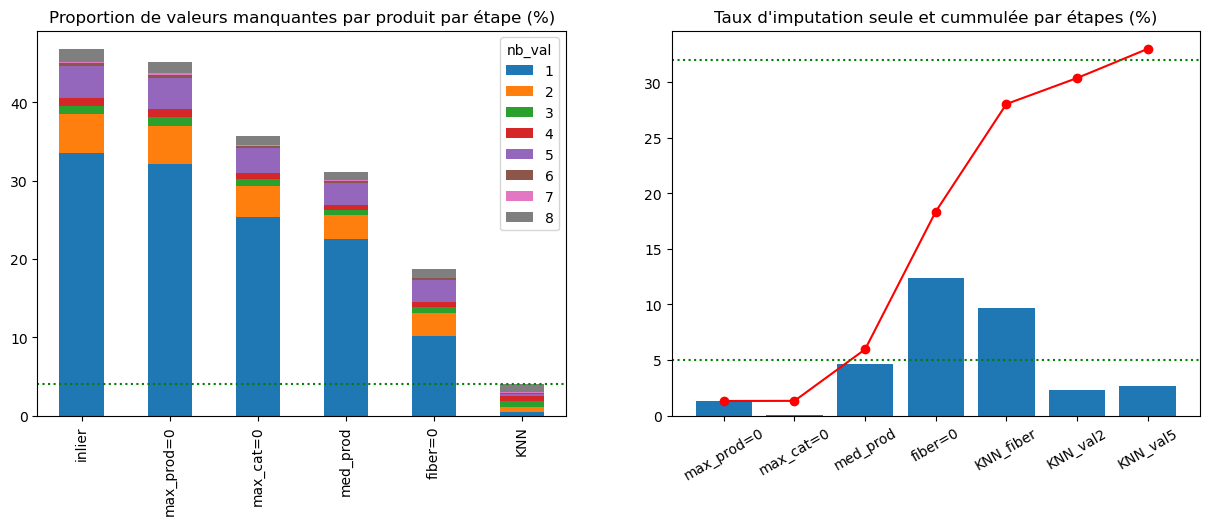

In [93]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
nb_val_prop_pivot[range(1,9)].plot(kind='bar', ax=ax, stacked=True)
ax.set_title('Proportion de valeurs manquantes par produit par étape (%)')
ax.axhline(4, linestyle=':', color='g')

ax = plt.subplot(1,2,2)
ax.bar(label_list, loss_list)
ax.plot(label_list, loss_list_cum,c="red",marker='o')
plt.xticks(rotation=30)
ax.set_title('Taux d\'imputation seule et cummulée par étapes (%)')

ax.axhline(32, linestyle=':', color='g')
ax.axhline(5, linestyle=':', color='g')

plt.show()

### Vérification de la cohérence de l'imputation

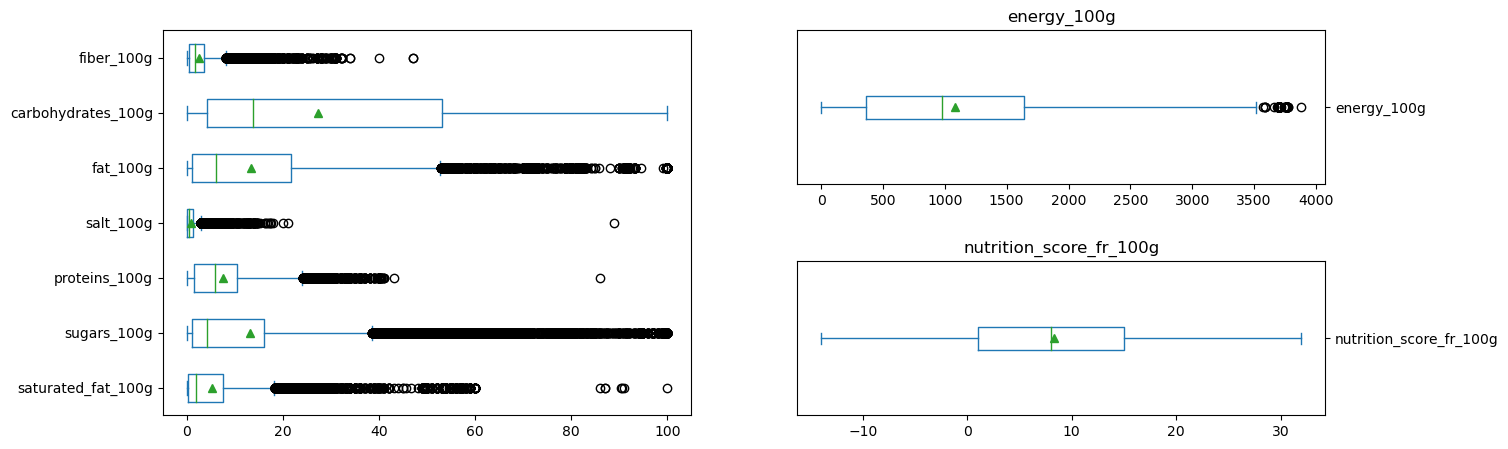

In [94]:
plot_box_data_prediction(data_inlier, [])

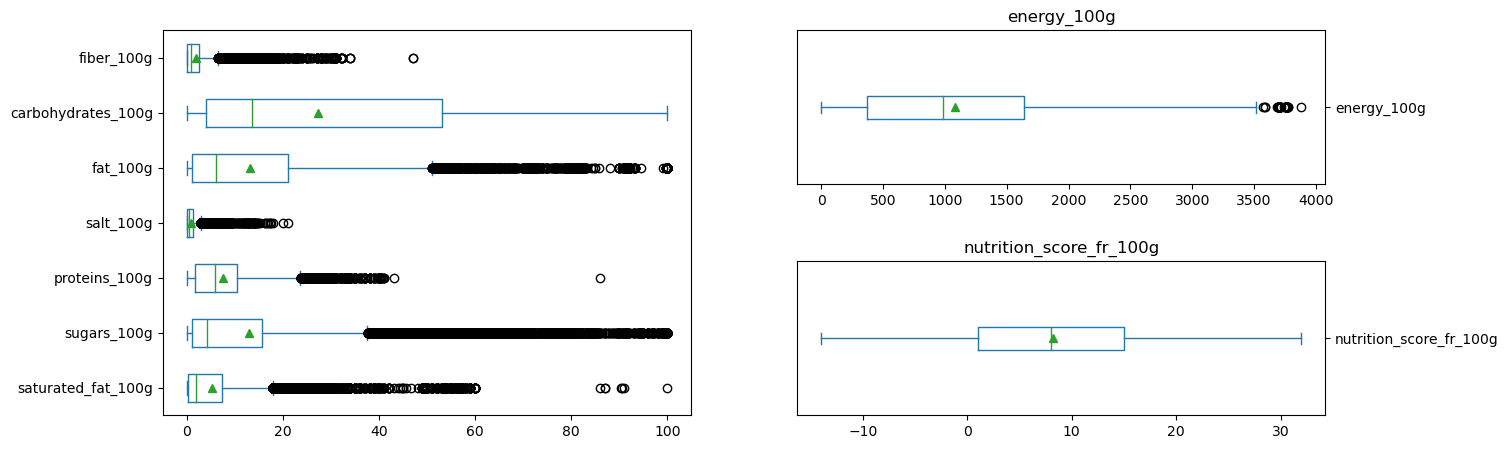

In [95]:
plot_box_data_prediction(data_full, [])

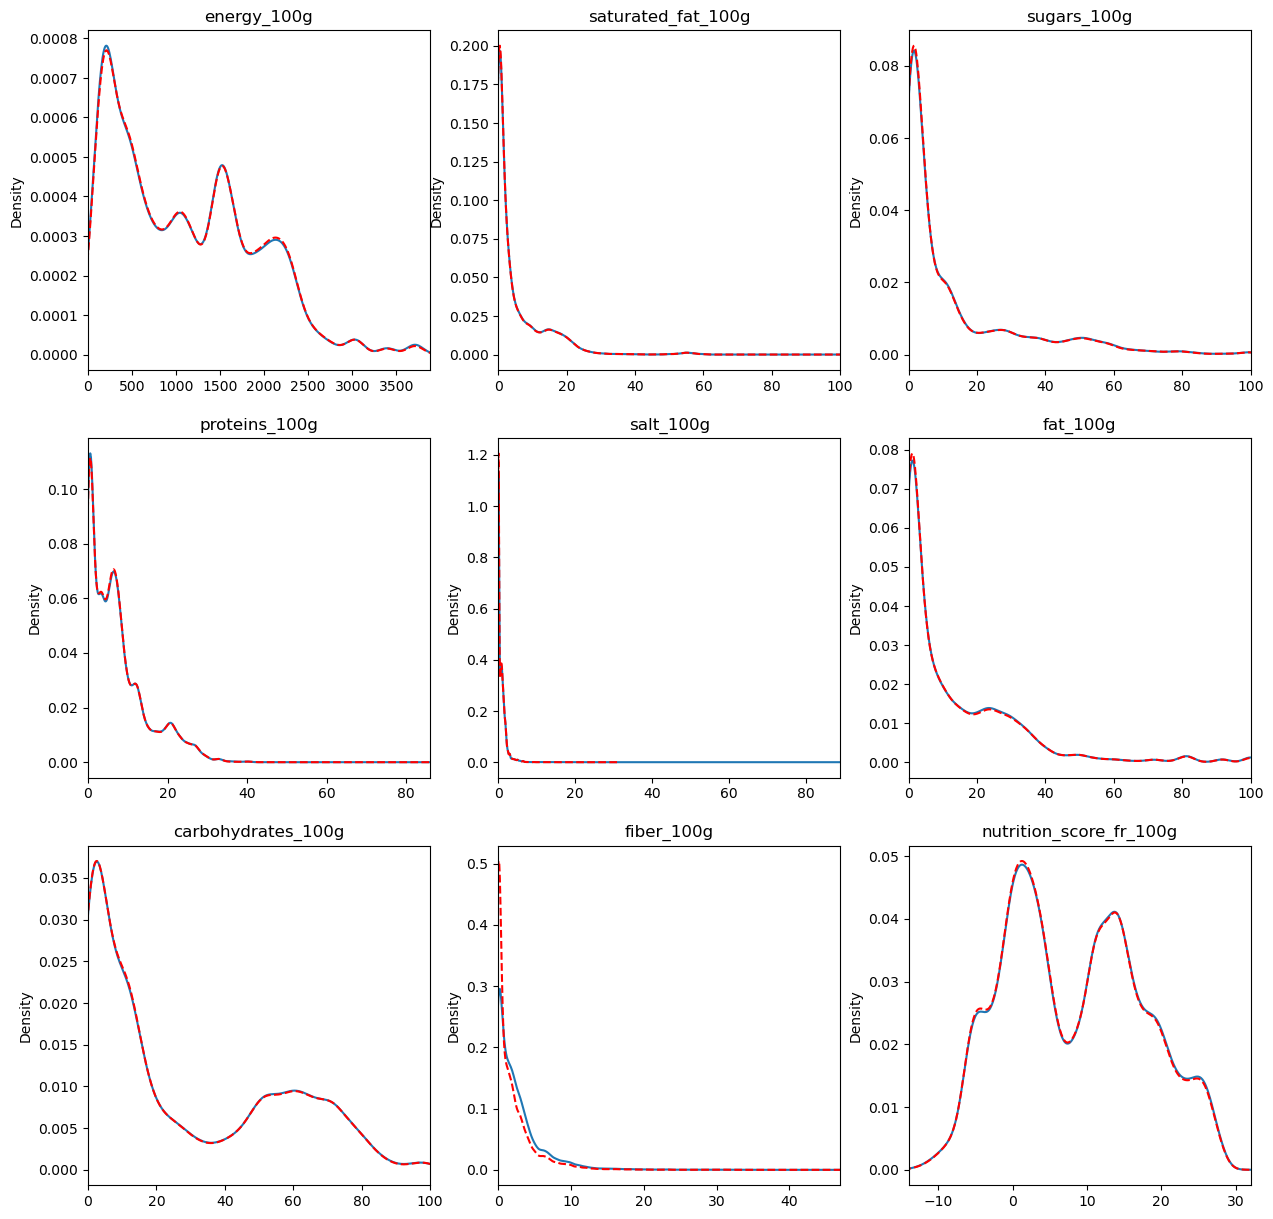

In [96]:
fig = plt.figure(figsize=(15,15))

i=1
for string in feature_prediction_array:
    ax = plt.subplot(3,3,i)
    data_inlier_stats[string].plot(kind='density', ax= ax)
    data_full[string].plot(kind='density', ax= ax, color='r', linestyle='--')
    plt.xlim(data_inlier_stats[string].min(),data_inlier_stats[string].max())
    ax.set_title(string)
    i=i+1

plt.show()

# Résumé nettoyage et imputation

In [97]:
data_nb = [len(data_full1_stats.loc[data_full1_stats['nb_val']==0]),
           data_full.shape[0]-len(data_full1_stats.loc[data_full1_stats['nb_val']==0]),
           data_inlier.shape[0]-data_full.shape[0]-data_inlier.loc[data_inlier['nb_val']==9].shape[0],
           data_inlier.loc[data_inlier['nb_val']==9].shape[0],
           data_selected.shape[0]-data_inlier.shape[0]]
data_labels = ['avant remplissage', 'imputés', 'non imputés', 'vides', 'outliers']

In [98]:
feature_selected_values_freq = pd.DataFrame(index=feature_selected_values)
for string in feature_selected_values_freq.index:
    feature_selected_values_freq.loc[string,'selected'] = (data_selected[feature_selected].value_counts()/len(data_selected))[string]
    feature_selected_values_freq.loc[string,'inlier'] = (data_inlier[feature_selected].value_counts()/len(data_inlier))[string]
    feature_selected_values_freq.loc[string,'vides'] = (data_inlier.loc[data_inlier['nb_val']==9,
                                                           feature_selected].value_counts()/len(data_inlier.loc[data_inlier['nb_val']==9,
                                                                                                feature_selected]))[string]
    feature_selected_values_freq.loc[string,'full'] = (data_full[feature_selected].value_counts()/len(data_full))[string]
feature_selected_values_freq = feature_selected_values_freq*100

In [99]:
feature_selected_values_freq = feature_selected_values_freq.sort_values('selected', ascending=False)

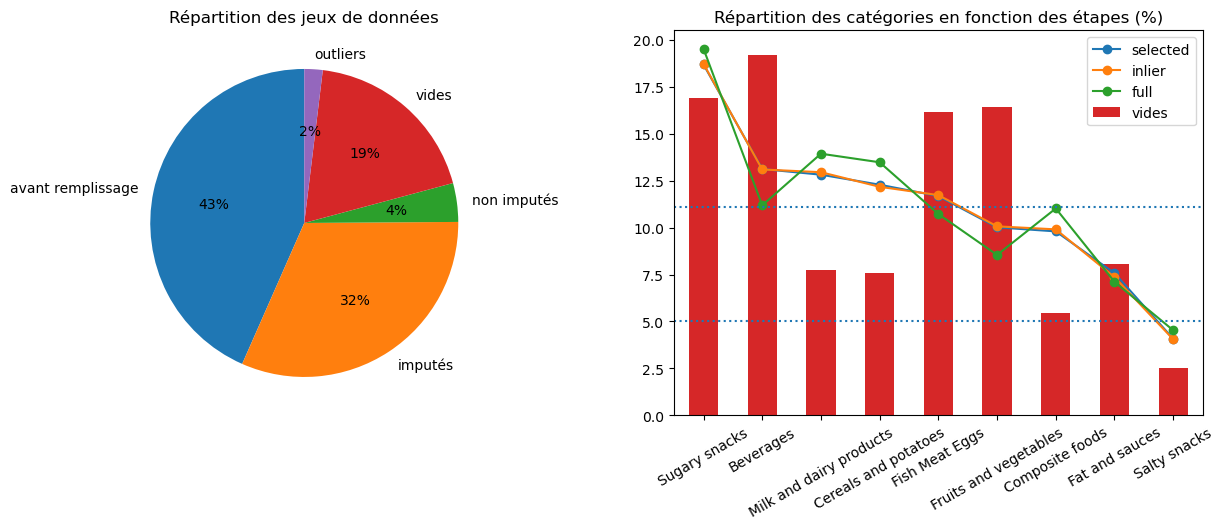

In [100]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
ax.pie(data_nb, labels=data_labels, autopct='%1.0f%%', startangle=90)
ax.set_title('Répartition des jeux de données')

ax = plt.subplot(1,2,2)
feature_selected_values_freq[['selected', 'inlier', 'full']].plot(ax=ax, marker='o', rot=30)
feature_selected_values_freq[['vides']].plot(ax=ax, kind='bar', rot=30, color='tab:red')
ax.axhline(100/9, linestyle=':')
ax.axhline(5, linestyle=':')
ax.legend()
ax.set_title('Répartition des catégories en fonction des étapes (%)')

plt.show()

# Analyse

## Fonctions de représentation

In [101]:
def plot_boxalone_feature(data_plot, feature_plot, threshold_plot, ax, showfliers_bool, eta2_plot):
    data = pd.pivot_table(data_plot, values=feature_plot, index=data_plot.index, columns=feature_selected)
    data.plot(ax=ax, kind='box', vert=False, showfliers=showfliers_bool)
    ax.axvline(threshold_plot, color='r', linestyle=':')
    ax.set_title('{}, eta2 = {}%'.format(feature_plot, round(100*eta2_plot,1)))

In [102]:
def plot_box_density(data_plot, feature_plot, threshold_plot, eta2_plot):
    fig = plt.figure(figsize=(15,5))

    ax = plt.subplot(1,2,1)
    plot_boxalone_feature(data_plot, feature_plot, threshold_plot, ax, True, eta2_plot)
    
    ax = plt.subplot(1,2,2)
    data = pd.pivot_table(data_plot, values=feature_plot, index=data_plot.index, columns=feature_selected)
    data.plot(ax=ax, kind='density')
    ax.axvline(threshold_plot, color='r', linestyle=':')
    plt.xlim(data_plot[feature_plot].min(), data_plot[feature_plot].max())
    #plt.ylim(0,0.1)
    ax.set_title(feature_plot)
    
    plt.show()

In [103]:
def plot_rect_stats(data_plot, feature_x, feature_y, q1_dict, q3_dict, q_title, ax, line_x, line_y):
    i=0
    for string in feature_selected_values:
        x_c = q1_dict[string][feature_x]
        y_c = q1_dict[string][feature_y]
        w = q3_dict[string][feature_x]-q1_dict[string][feature_x]
        h = q3_dict[string][feature_y]-q1_dict[string][feature_y]
        rectangle = Rectangle(xy=(x_c, y_c), width=w, height=h,
                          color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
        ax.add_patch(rectangle)
        i=i+1

    ax.axvline(line_x, linestyle=':', color='r')
    ax.axhline(line_y, linestyle=':', color='r')
    
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    plt.xlim(data_plot[feature_x].min(),data_plot[feature_x].max())
    plt.ylim(data_plot[feature_y].min(),data_plot[feature_y].max())
    plt.legend()
    ax.set_title(q_title)

In [104]:
def plot_scatter_features(data_plot, feature_x, feature_y, threshold_x, threshold_y, ax):
    i=0
    for string in feature_selected_values:
        data_plot.loc[data_plot[feature_selected]==string].plot(
            ax=ax, kind='scatter', x=feature_x, y=feature_y,
            marker='+', label=string, color=colormaps['tab10'].colors[i])
        i=i+1
    ax.axvline(threshold_x, linestyle=':', color='r')
    ax.axhline(threshold_y, linestyle=':', color='r')

In [105]:
def correlation_graph(pca, 
                      x_y, 
                      features, ax) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    #fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        ax.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    ax.plot([-1, 1], [0, 0], color='grey', ls='--')
    ax.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    ax.set_ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    ax.set_title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    ax.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    #plt.show(block=False)

In [106]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

## Description générale

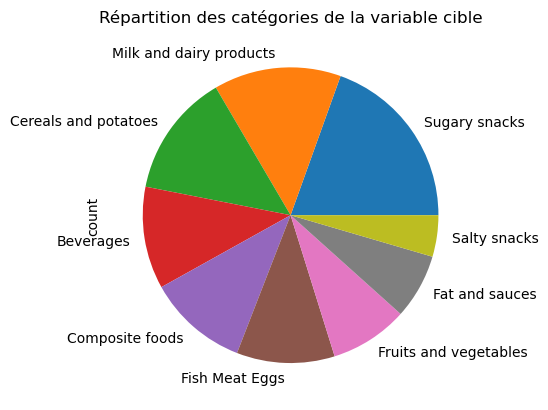

In [107]:
data_full[feature_selected].value_counts().plot(kind='pie')
plt.title('Répartition des catégories de la variable cible')
plt.show()

In [108]:
data_full.describe()

energy_100g  saturated_fat_100g   sugars_100g  proteins_100g  \
count  51741.000000        51741.000000  51741.000000   51741.000000   
mean    1082.660189            5.241116     12.872442       7.412708   
std      788.021449            7.972250     18.433373       7.112882   
min        0.000000            0.000000      0.000000       0.000000   
25%      372.000000            0.200000      1.000000       1.600000   
50%      983.000000            1.800000      4.100000       5.900000   
75%     1642.000000            7.300000     15.600000      10.400000   
max     3883.000000          100.000000    100.000000      86.000000   

          salt_100g      fat_100g  carbohydrates_100g    fiber_100g  \
count  51741.000000  51741.000000        51741.000000  51741.000000   
mean       0.807521     13.084335           27.244109      1.878744   
std        1.105721     17.022110           27.330691      2.904612   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.060000      1.000000            4.000000      0.000000   
50%        0.500000      6.000000           13.600000      0.898000   
75%        1.200000     21.000000           53.000000      2.600000   
max       21.005800    100.000000          100.000000     47.000000   

       nutrition_score_fr_100g  
count             51741.000000  
mean                  8.175992  
std                   9.094259  
min                 -14.000000  
25%                   1.000000  
50%                   8.000000  
75%                  15.000000  
max                  32.000000

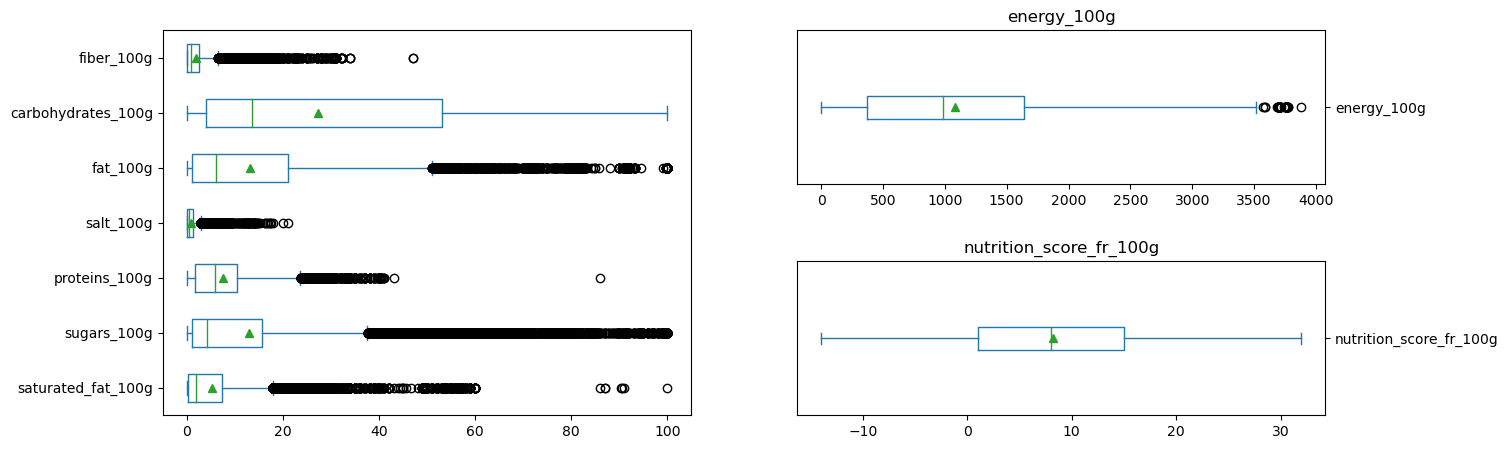

In [109]:
plot_box_data_prediction(data_full, [])

## Normalisation

In [110]:
X = data_full[feature_prediction_array].values

In [111]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [112]:
data_scaled = pd.DataFrame(X_scaled)
data_scaled.columns = feature_prediction_array
data_scaled[feature_selected] = data_full[feature_selected].values

In [113]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8
mean  0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

## Corrélations

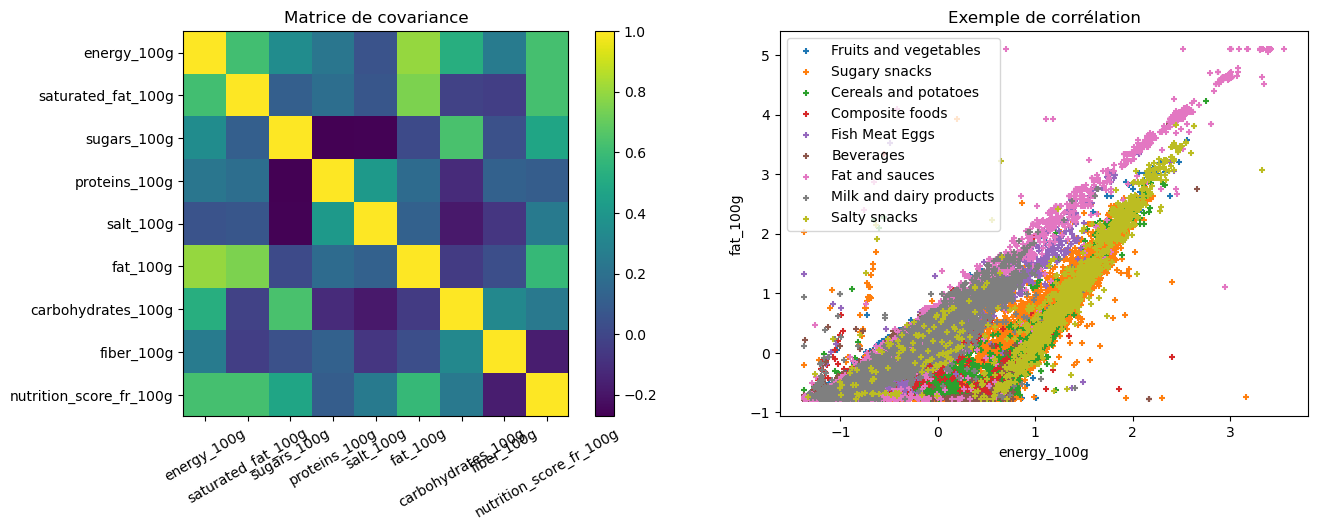

In [114]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
img = ax.imshow(data_scaled[feature_prediction_array].cov(), interpolation='nearest')
ax.set_title('Matrice de covariance')
ax.set_xticks(np.arange(len(feature_prediction_array)), labels=feature_prediction_array)
ax.set_yticks(np.arange(len(feature_prediction_array)), labels=feature_prediction_array)
plt.xticks(rotation=30)

plt.colorbar(img)

ax = plt.subplot(1,2,2)
feature_x = 'energy_100g'
feature_y = 'fat_100g'
i=0
for string in feature_selected_values:
    data_scaled.loc[data_scaled[feature_selected]==string].plot(
        ax=ax, kind='scatter', x=feature_prediction_array[0], y=feature_prediction_array[5],
        marker='+', label=string, color=colormaps['tab10'].colors[i])
    i=i+1
ax.set_title('Exemple de corrélation')
ax.legend()

plt.show()

## PCA

In [115]:
n_components = 6

### Calculs

In [116]:
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

In [117]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)

### Valeurs propres corrélations

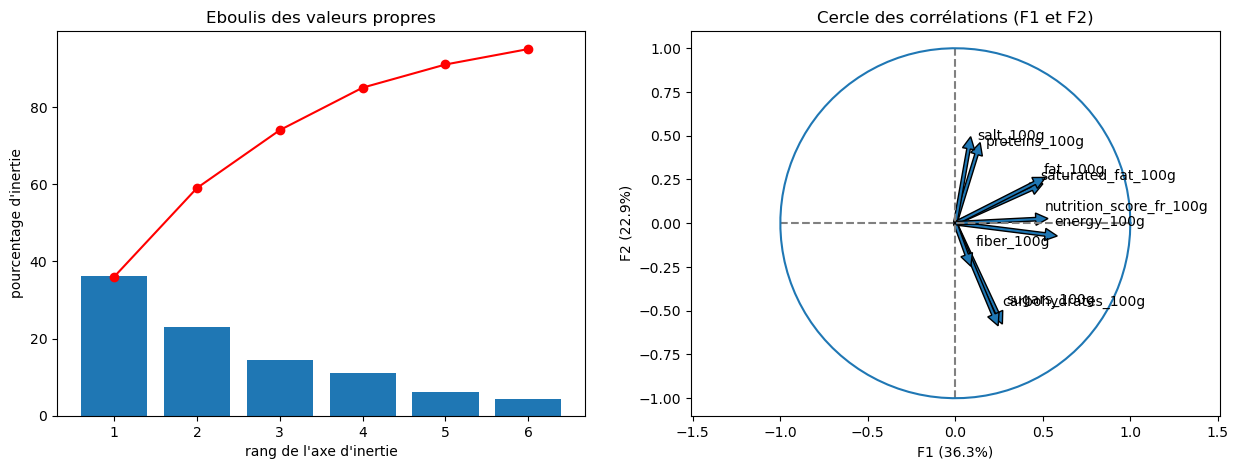

In [118]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
ax.bar(x_list, scree)
ax.plot(x_list, scree_cum,c="red",marker='o')
ax.set_xlabel("rang de l'axe d'inertie")
ax.set_ylabel("pourcentage d'inertie")
ax.set_title("Eboulis des valeurs propres")

ax=plt.subplot(1,2,2)
correlation_graph(pca, (0,1), feature_prediction_array, ax)
plt.show()

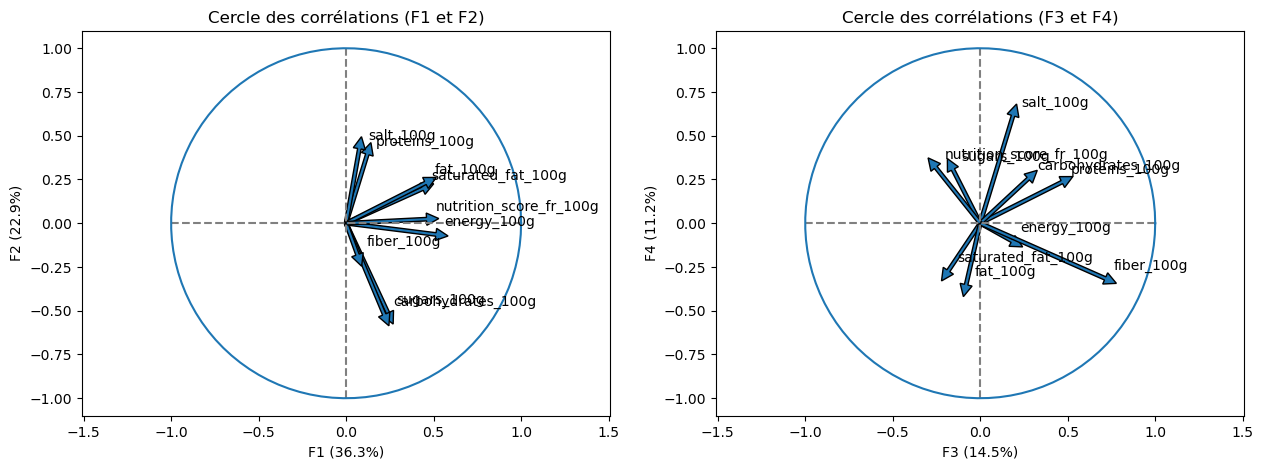

In [119]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
correlation_graph(pca, (0,1), feature_prediction_array, ax)
ax=plt.subplot(1,2,2)
correlation_graph(pca, (2,3), feature_prediction_array, ax)

### Projection des données initiales

In [120]:
X_proj = pca.transform(X_scaled)

In [121]:
data_proj = pd.DataFrame(X_proj)
data_proj[feature_selected] = data_full[feature_selected].values

### Comparaison des données initiales et de la PCA

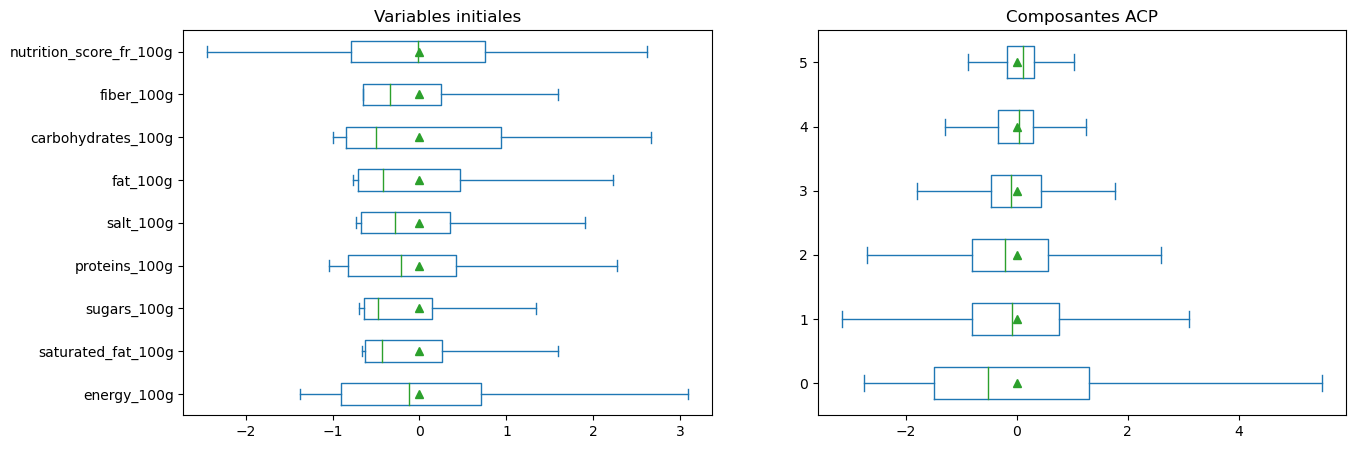

In [122]:
fig = plt.figure(figsize=(15,5))


ax=plt.subplot(1,2,1)
data_scaled.plot(ax=ax, kind='box', vert=False, showmeans=True, showfliers=False)
ax.set_title('Variables initiales')

ax=plt.subplot(1,2,2)
data_proj.plot(ax=ax, kind='box', vert=False, showmeans=True, showfliers=False)
ax.set_title('Composantes ACP')

plt.show()

## ANOVA

### Calculs

In [123]:
eta2_full = {}
for string in feature_prediction_array:
    data = pd.pivot_table(data_full, values=string, index=data_full.index, columns=feature_selected)
    eta2_full[string] = ((len(data)-data.isnull().sum())*((data.mean()-data_full[string].mean())**2)).sum()/len(data)/(data_full[string].std())**2

In [124]:
eta2_proj = {}
for i in data_proj.columns[:-1]:
    data = pd.pivot_table(data_proj, values=i, index=data_proj.index, columns=feature_selected)
    eta2_proj['F'+str(i+1)] = ((len(data)-data.isnull().sum())*((data.mean()-data_proj[i].mean())**2)).sum()/len(data)/(data_proj[i].std())**2

In [125]:
eta2_tot = eta2_full | eta2_proj

In [126]:
eta2_tot_sorted = dict(sorted(eta2_tot.items(), key=lambda item: item[1], reverse=True))

### Représentations

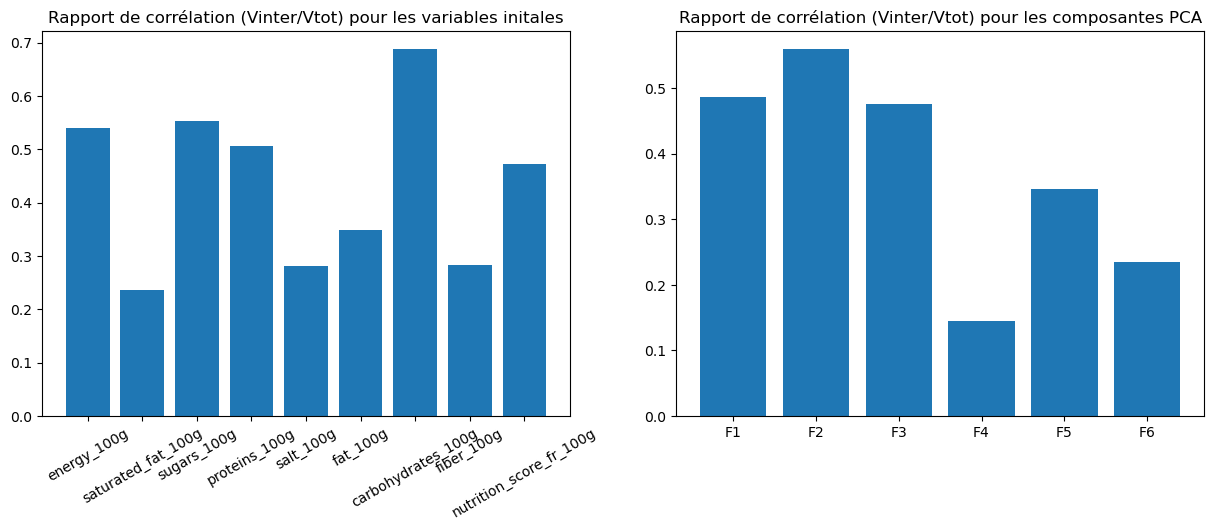

In [127]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
plt.bar(list(eta2_full), eta2_full.values())
plt.xticks(rotation=30)
ax.set_title('Rapport de corrélation (Vinter/Vtot) pour les variables initales')

ax=plt.subplot(1,2,2)
plt.bar(list(eta2_proj), eta2_proj.values())
ax.set_title('Rapport de corrélation (Vinter/Vtot) pour les composantes PCA')

plt.show()

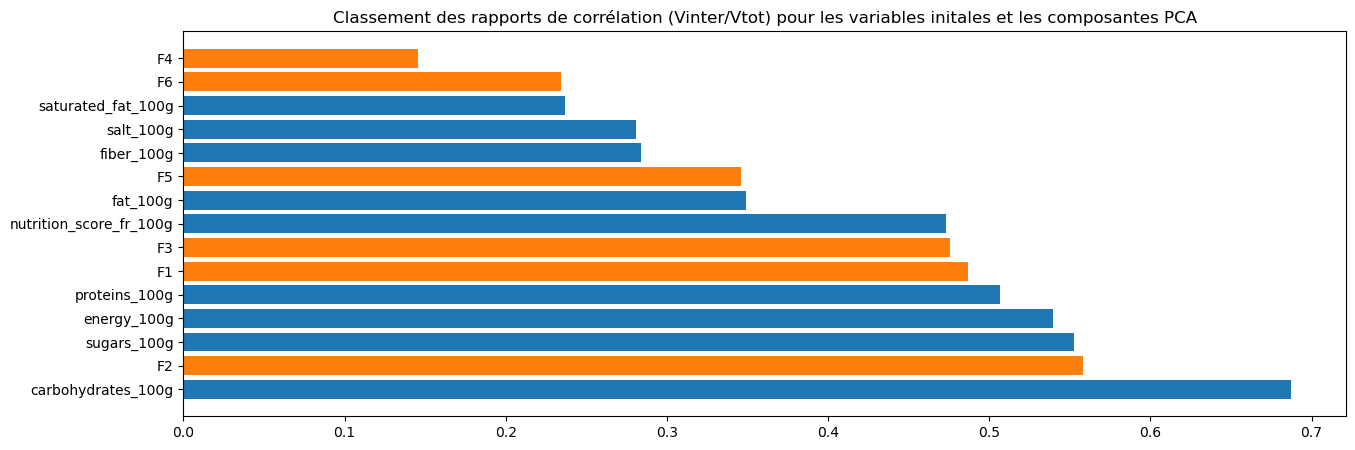

In [128]:
fig = plt.figure(figsize=(15,5))
colors_eta = ['tab:blue' for i in range(len(eta2_tot_sorted))]
for i in range(len(eta2_tot_sorted)):
    if(list(eta2_tot_sorted)[i][0] == 'F'):
        colors_eta[i] = 'tab:orange'
plt.barh(list(eta2_tot_sorted), eta2_tot_sorted.values(), color=colors_eta)
plt.title('Classement des rapports de corrélation (Vinter/Vtot) pour les variables initales et les composantes PCA')
plt.show()

## Calcul des statistiques

In [129]:
def calcul_quantile_categories(data_calcul, quantile_ratio):
    dict_return = {}
    for string in feature_selected_values:
        dict_return[string] = data_calcul.loc[data_calcul[feature_selected]==string, data_calcul.columns[:-1]].quantile(quantile_ratio)
    return dict_return

In [130]:
step3_scaled_q1 = calcul_quantile_categories(data_scaled, 0.25)
step3_scaled_q3 = calcul_quantile_categories(data_scaled, 0.75)

step3_scaled_d1 = calcul_quantile_categories(data_scaled, 0.1)
step3_scaled_d9 = calcul_quantile_categories(data_scaled, 0.9)

step3_scaled_med = calcul_quantile_categories(data_scaled, 0.5)

In [131]:
step3_proj_q1 = calcul_quantile_categories(data_proj, 0.25)
step3_proj_q3 = calcul_quantile_categories(data_proj, 0.75)

step3_proj_d1 = calcul_quantile_categories(data_proj, 0.1)
step3_proj_d9 = calcul_quantile_categories(data_proj, 0.9)

step3_proj_med = calcul_quantile_categories(data_proj, 0.5)

## Comparaison ANOVA/PCA et illustrations

### Variables étudiées

In [132]:
feature_x = 'carbohydrates_100g'
feature_y = 'sugars_100g'

In [133]:
threshold_x = 28
threshold_y = 20

In [134]:
threshold_x_scaled = (threshold_x-data_full[feature_x].mean())/data_full[feature_x].std()
threshold_y_scaled = (threshold_y-data_full[feature_y].mean())/data_full[feature_y].std()

In [135]:
feature_pcax = 0
feature_pcay = 1

In [136]:
threshold_pcax = 1.1
threshold_pcay = -0.1

### Comparaison ANOVA/PCA

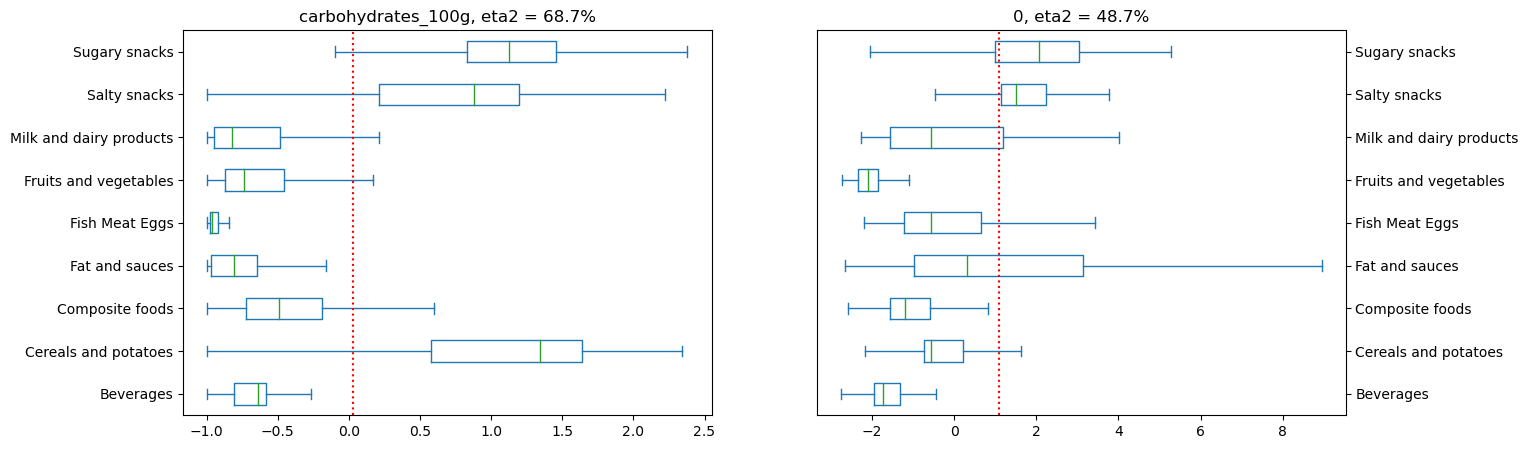

In [137]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
plot_boxalone_feature(data_scaled, feature_x, threshold_x_scaled, ax, False, eta2_tot[feature_x])

ax = plt.subplot(1,2,2)
plot_boxalone_feature(data_proj, feature_pcax, threshold_pcax, ax, False, eta2_tot['F1'])
ax.yaxis.tick_right()

plt.show()

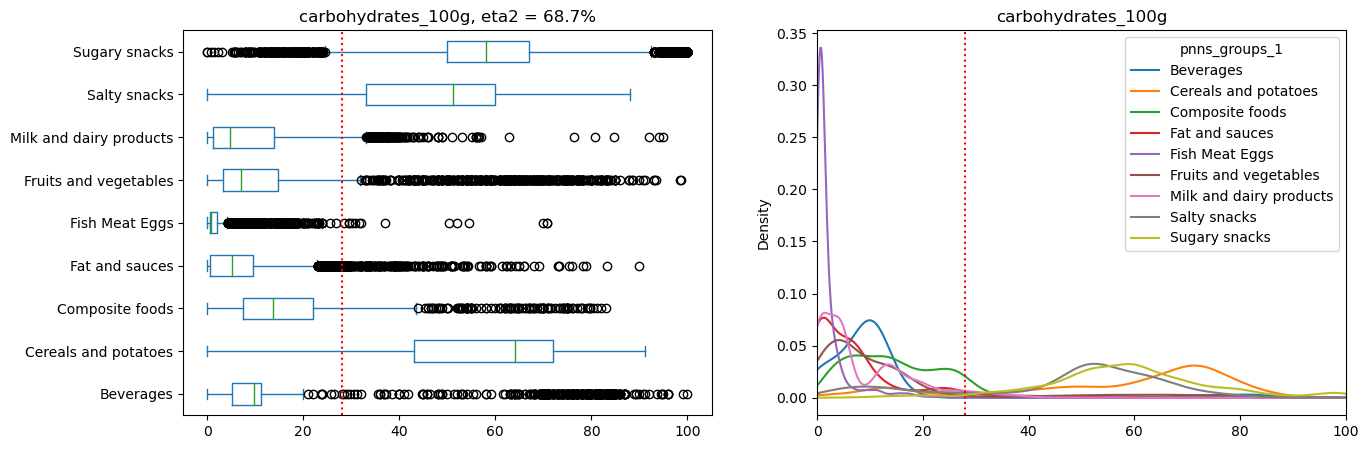

In [138]:
plot_box_density(data_full, feature_x, 28, eta2_tot[feature_x])

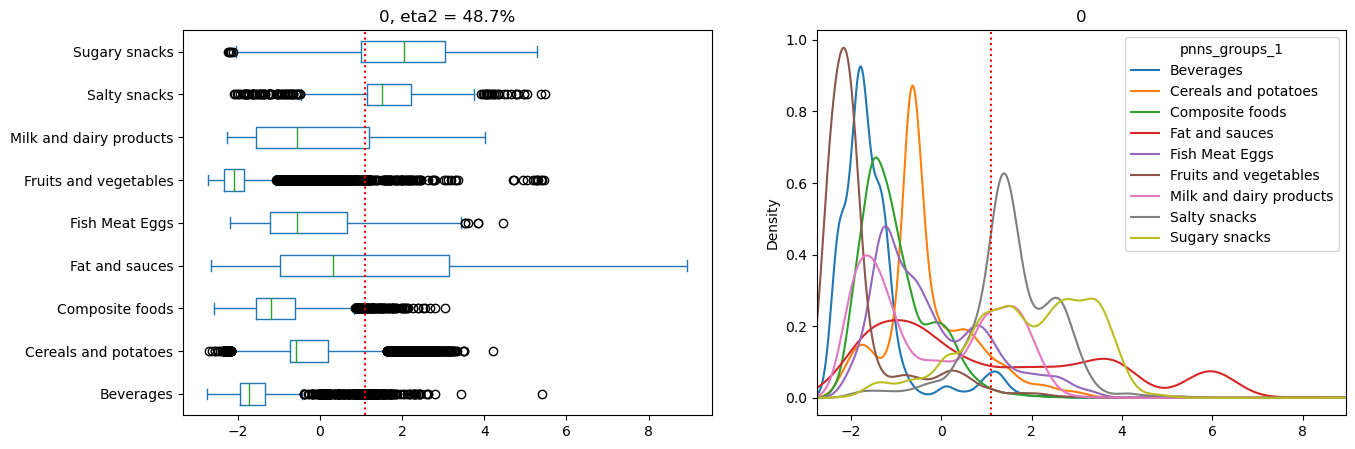

In [139]:
plot_box_density(data_proj, feature_pcax, threshold_pcax, eta2_tot['F1'])

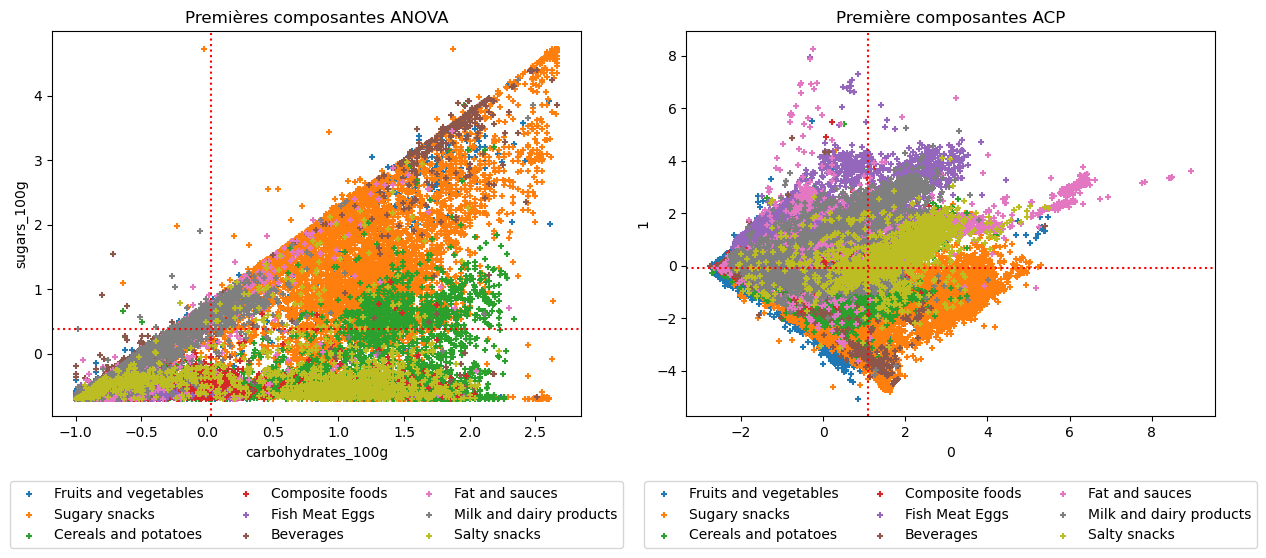

In [140]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
plot_scatter_features(data_scaled, feature_x, feature_y, threshold_x_scaled, threshold_y_scaled, ax)
ax.set_title('Premières composantes ANOVA')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

ax = plt.subplot(1,2,2)
plot_scatter_features(data_proj, feature_pcax, feature_pcay, threshold_pcax, threshold_pcay, ax)
ax.set_title('Première composantes ACP')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

### Illustration variables initiales

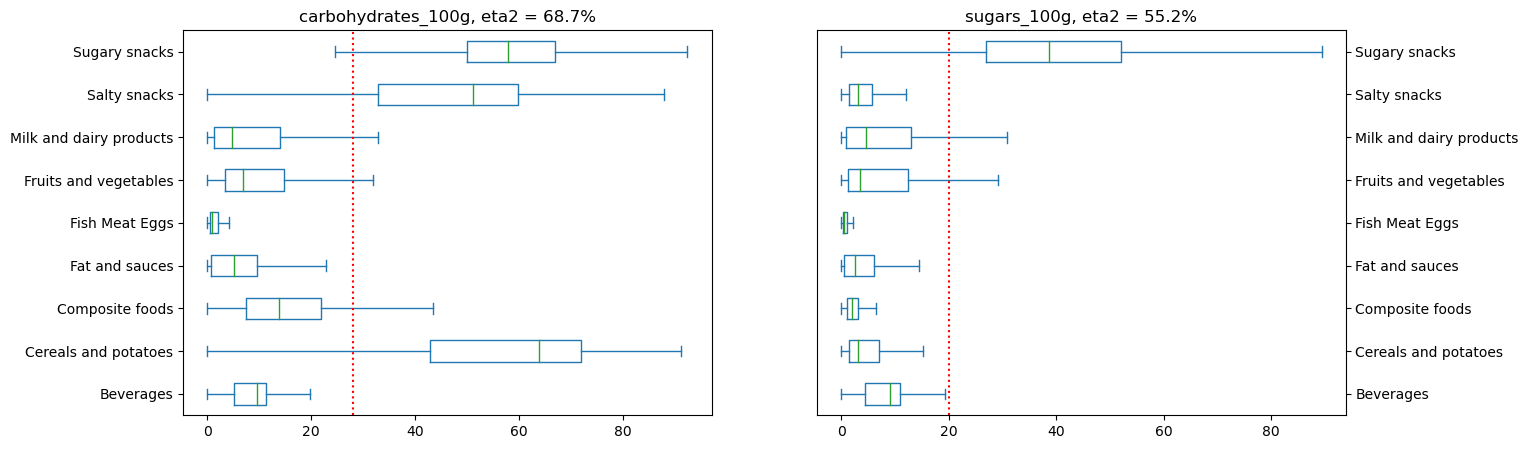

In [141]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
plot_boxalone_feature(data_full, feature_x, threshold_x, ax, False, eta2_tot[feature_x])

ax = plt.subplot(1,2,2)
plot_boxalone_feature(data_full, feature_y, threshold_y, ax, False, eta2_tot[feature_y])
ax.yaxis.tick_right()

plt.show()

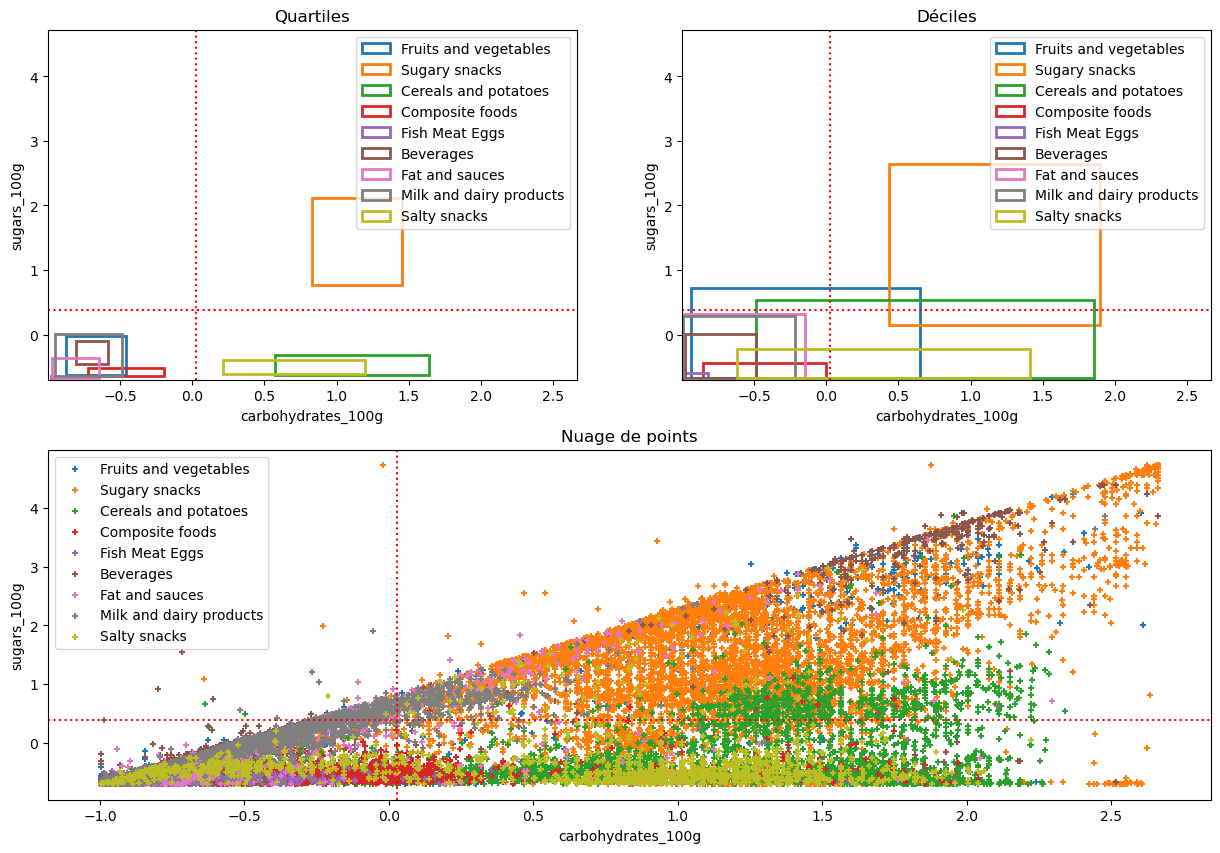

In [142]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
plot_rect_stats(data_scaled, feature_x, feature_y, step3_scaled_q1, step3_scaled_q3, 'Quartiles', ax, threshold_x_scaled, threshold_y_scaled)

ax = plt.subplot(2,2,2)
plot_rect_stats(data_scaled, feature_x, feature_y, step3_scaled_d1, step3_scaled_d9, 'Déciles', ax, threshold_x_scaled, threshold_y_scaled)

ax = plt.subplot(2,1,2)
plot_scatter_features(data_scaled, feature_x, feature_y, threshold_x_scaled, threshold_y_scaled, ax)
ax.set_title('Nuage de points')
ax.legend()

plt.show()

### Illustration variables PCA

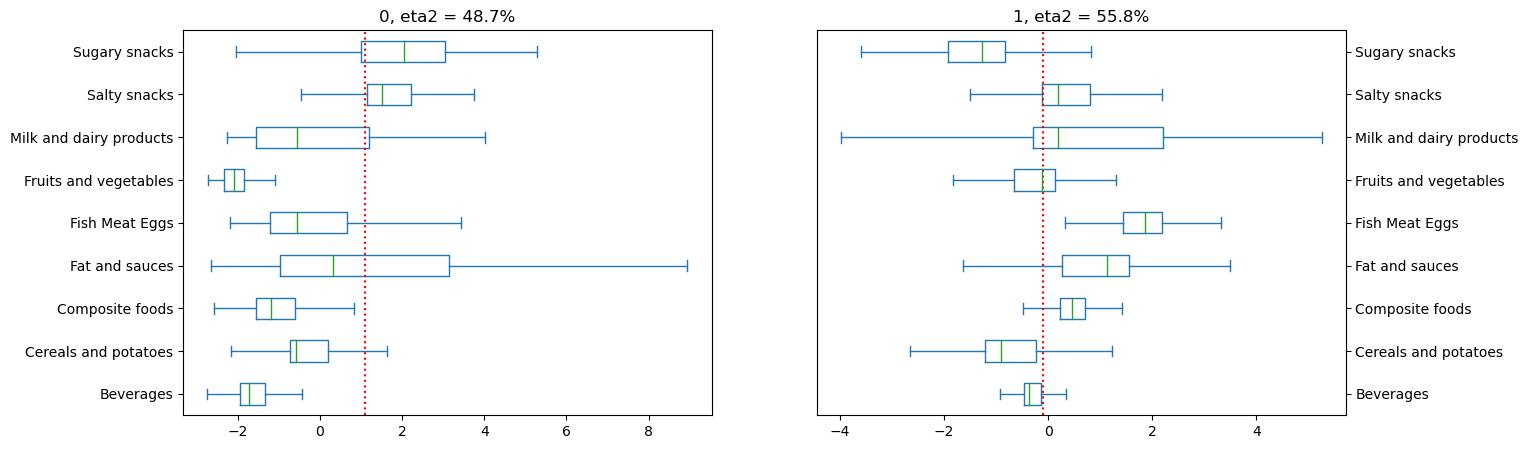

In [143]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
plot_boxalone_feature(data_proj, feature_pcax, threshold_pcax, ax, False, eta2_tot['F1'])

ax = plt.subplot(1,2,2)
plot_boxalone_feature(data_proj, feature_pcay, threshold_pcay, ax, False, eta2_tot['F2'])
ax.yaxis.tick_right()

plt.show()

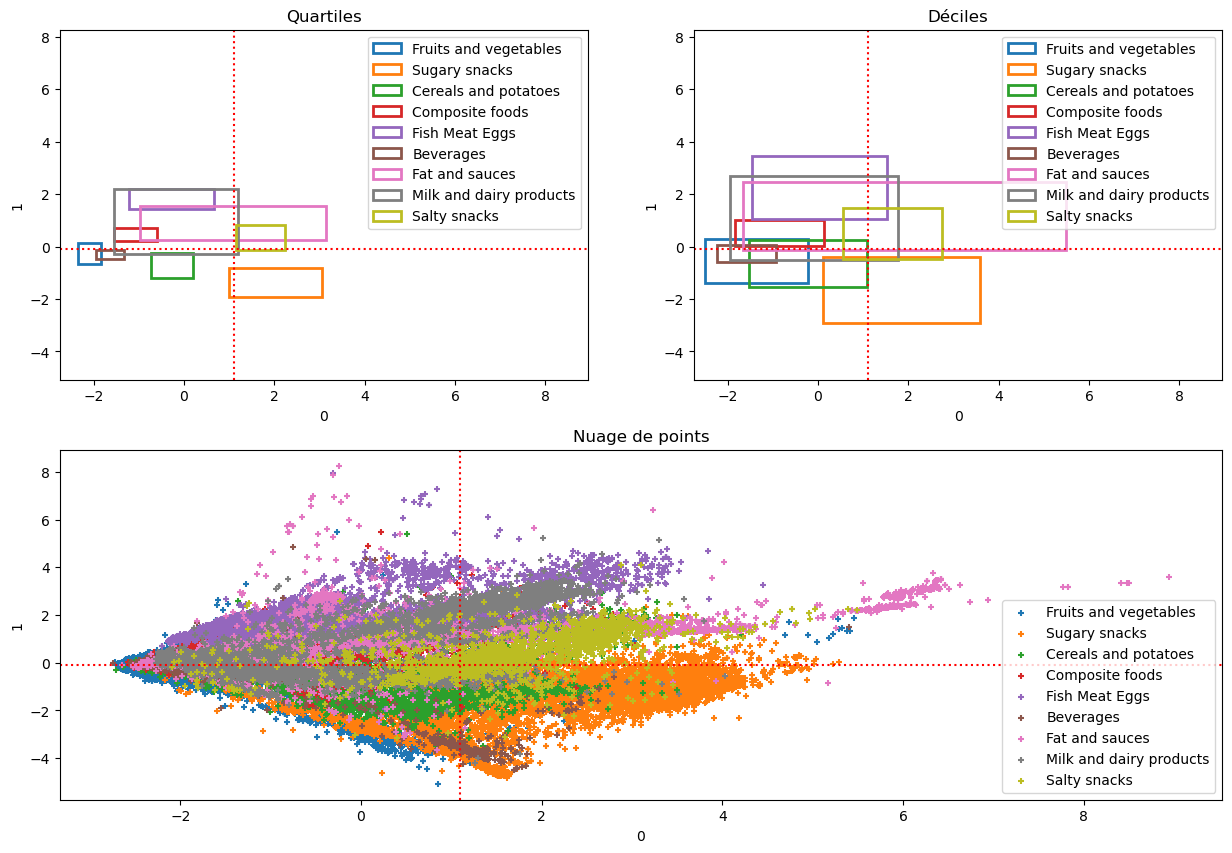

In [144]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
plot_rect_stats(data_proj, feature_pcax, feature_pcay, step3_proj_q1, step3_proj_q3, 'Quartiles', ax, threshold_pcax, threshold_pcay)

ax = plt.subplot(2,2,2)
plot_rect_stats(data_proj, feature_pcax, feature_pcay, step3_proj_d1, step3_proj_d9, 'Déciles', ax, threshold_pcax, threshold_pcay)

ax = plt.subplot(2,1,2)
plot_scatter_features(data_proj, feature_pcax, feature_pcay, threshold_pcax, threshold_pcay, ax)
ax.set_title('Nuage de points')
ax.legend()

plt.show()

# Synthèse

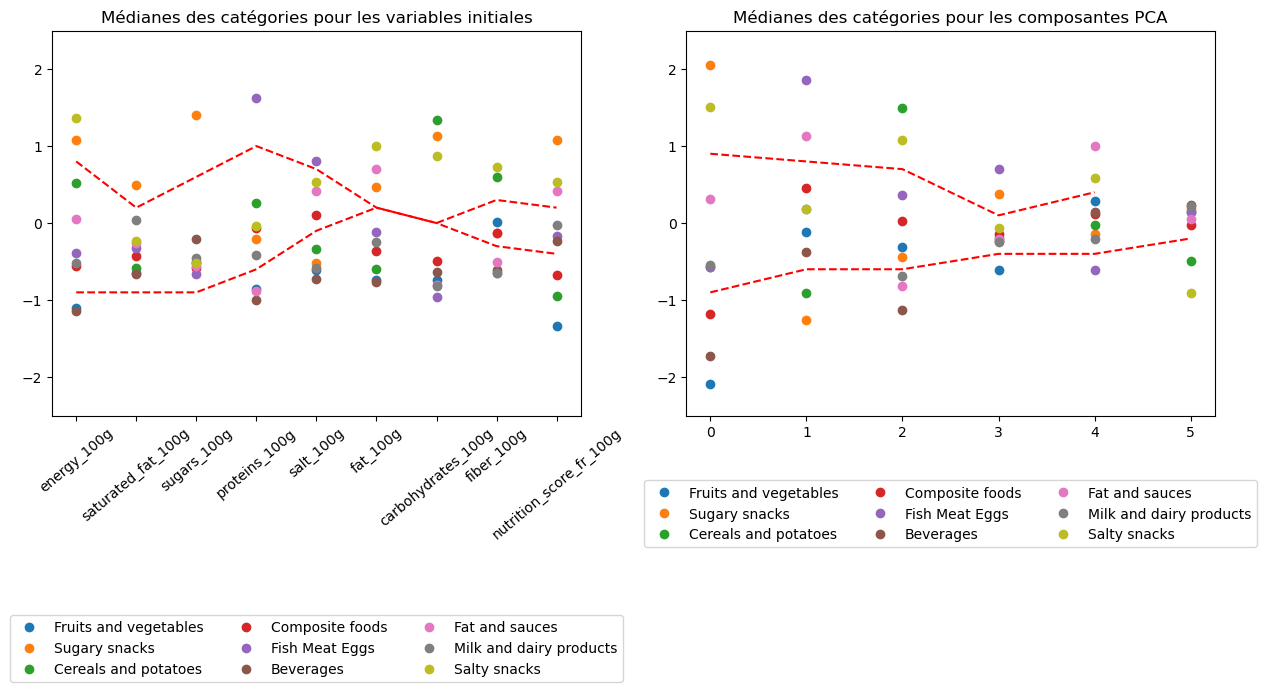

In [145]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in feature_selected_values:
    step3_scaled_med[string].plot(ax=ax, marker = 'o', linestyle='', rot = 40, label = string, color=colormaps['tab10'].colors[i])
    i=i+1
ax.plot([0.8, 0.2, 0.6, 1, 0.7, 0.2, 0, 0.3, 0.2], color='r', linestyle='--')
ax.plot([-0.9, -0.9, -0.9, -0.6, -0.1, 0.2, 0, -0.3, -0.4], color='r', linestyle='--')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)
ax.set_title('Médianes des catégories pour les variables initiales')
plt.ylim(-2.5,2.5)

ax = plt.subplot(1,2,2)
i=0
for string in feature_selected_values:
    step3_proj_med[string].plot(ax=ax, marker = 'o', linestyle='', label = string, color=colormaps['tab10'].colors[i])
    i=i+1
ax.plot([0.9, 0.8, 0.7, 0.1, 0.4], color='r', linestyle='--')
ax.plot([-0.9, -0.6, -0.6, -0.4, -0.4, -0.2], color='r', linestyle='--')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
ax.set_title('Médianes des catégories pour les composantes PCA')
plt.ylim(-2.5,2.5)

plt.show()

# AUTRES

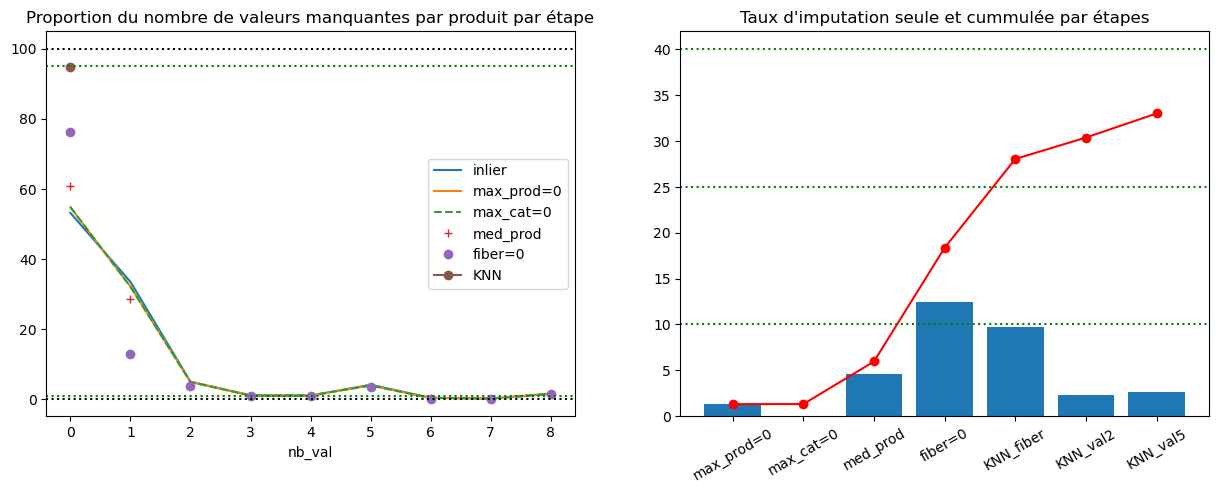

In [146]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
(data_inlier_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(ax=ax, label='inlier')
(data_full1_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(ax=ax, label='max_prod=0')
(data_full2_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(ax=ax, linestyle='--', label='max_cat=0')
(data_full3_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(ax=ax, linestyle='', marker='+', label='med_prod')
(data_full4_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(ax=ax, linestyle='', marker='o', label='fiber=0')
(data_full5_stats['nb_val'].value_counts().sort_index()/len(data_empty)*100).plot(ax=ax, marker='o', label='KNN')
ax.legend()
ax.set_title('Proportion du nombre de valeurs manquantes par produit par étape')

ax.axhline(100, linestyle=':', color='k')
ax.axhline(0, linestyle=':', color='k')
ax.axhline(95, linestyle=':', color='g')
ax.axhline(1, linestyle=':', color='g')

ax = plt.subplot(1,2,2)
ax.bar(label_list, loss_list)
ax.plot(label_list, loss_list_cum,c="red",marker='o')
plt.xticks(rotation=30)
ax.set_title('Taux d\'imputation seule et cummulée par étapes')

ax.axhline(40, linestyle=':', color='g')
ax.axhline(25, linestyle=':', color='g')
ax.axhline(10, linestyle=':', color='g')

plt.show()

NameError: name 'step3_full_med' is not defined

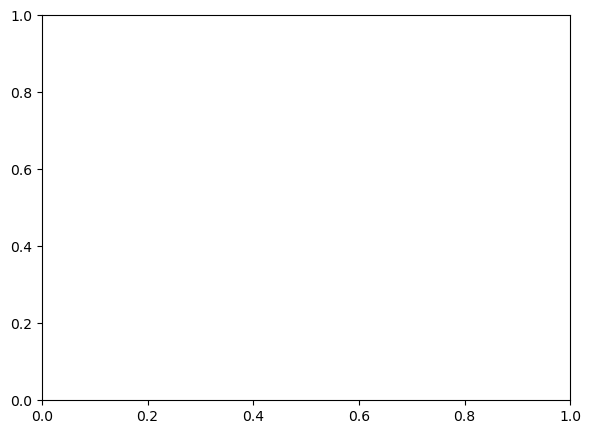

In [147]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in feature_selected_values:
    step3_full_med[string].plot(ax=ax, marker = 'o', linestyle='', rot = 90, label = string, color=colormaps['tab10'].colors[i])
    i=i+1

i=0
for string in feature_selected_values:
    step3_full_q1[string].plot(ax=ax, marker = '+', linestyle='', rot = 90, color=colormaps['tab10'].colors[i])
    step3_full_q3[string].plot(ax=ax, marker = '+', linestyle='', rot = 90, color=colormaps['tab10'].colors[i])
    i=i+1

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)

ax = plt.subplot(1,2,2)
i=0
for string in feature_selected_values:
    step3_proj_med[string].plot(ax=ax, marker = 'o', linestyle='', label = string, color=colormaps['tab10'].colors[i])
    i=i+1

i=0
for string in feature_selected_values:
    step3_proj_q1[string].plot(ax=ax, marker = '+', linestyle='', color=colormaps['tab10'].colors[i])
    step3_proj_q3[string].plot(ax=ax, marker = '+', linestyle='', color=colormaps['tab10'].colors[i])
    i=i+1

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

In [ ]:
F_values = {}
p_values = {}
for string in columns_prediction:
    anova_variete = smf.ols(string+'~'+feature_selected, data=data_full).fit()
    F_values[string] = sm.stats.anova_lm(anova_variete, typ=2)['F'][0]
    p_values[string] = sm.stats.anova_lm(anova_variete, typ=2)['PR(>F)'][0]

In [ ]:
anova_variete.pvalues

In [ ]:
p_values

In [ ]:
F_values_sorted = dict(sorted(F_values.items(), key=lambda item: item[1], reverse=True))

In [ ]:
plt.bar(list(F_values_sorted), F_values_sorted.values())
plt.xticks(rotation=90)
plt.show()

In [ ]:
values_num = pd.DataFrame()
values_num['values'] = feature_selected_values
values_num['num'] = range(len(feature_selected_values))

In [ ]:
data_full = data_full.merge(values_num, left_on=feature_selected, right_on='values')

In [ ]:
model = sm.OLS(data_full['num'], data_full[columns_prediction]).fit()
print(model.summary())

In [ ]:
model.pvalues

In [ ]:
sm.stats.anova_lm(anova_variete, typ=2)['PR(>F)'][0]

In [ ]:
reg_log2 = sm.GLM(data_full['num'], data_full[columns_prediction], family=sm.families.Binomial()).fit()

In [ ]:
print(reg_log2.summary())

In [ ]:
data_proj = data_proj.merge(values_num, left_on=feature_selected, right_on='values')

In [ ]:
reg_log3 = sm.GLM(data_proj['num'], data_proj[range(6)], family=sm.families.Binomial()).fit()

In [ ]:
print(reg_log3.summary())

In [ ]:
values_filter = ['Sugary snacks', 'Fruits and vegetables', 'Cereals and potatoes']

In [ ]:
data_full['F2']=data_proj[1].values

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in values_filter:
    x_c = step3_full_q1[string]['nutrition_score_fr_100g']
    y_c = step3_proj_q1[string][0]
    w = step3_full_q3[string]['nutrition_score_fr_100g']-step3_full_q1[string]['nutrition_score_fr_100g']
    h = step3_proj_q3[string][0]-step3_proj_q1[string][0]
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()

ax = plt.subplot(1,2,2)
i=0
for string in values_filter:
    x_c = step3_full_d1[string]['nutrition_score_fr_100g']
    y_c = step3_proj_d1[string][0]
    w = step3_full_d9[string]['nutrition_score_fr_100g']-step3_full_d1[string]['nutrition_score_fr_100g']
    h = step3_proj_d9[string][0]-step3_proj_d1[string][0]
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,5)
plt.ylim(-2,5)
plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,1,1)
string = 'Sugary snacks'
data_scaled.loc[data_scaled['pnns_groups_1']==string].plot(ax=ax, kind='scatter', x='sugars_100g', y='carbohydrates_100g', marker='+')
data_scaled.loc[data_scaled['pnns_groups_1']=='Fat and sauces'].plot(ax=ax, kind='scatter', x='sugars_100g', y='carbohydrates_100g', marker='+', color='y')
x_c = step3_full_d1[string]['sugars_100g']
y_c = step3_full_d1[string]['carbohydrates_100g']
w = step3_full_d9[string]['sugars_100g']-step3_full_d1[string]['sugars_100g']
h = step3_full_d9[string]['carbohydrates_100g']-step3_full_d1[string]['carbohydrates_100g']
ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h, fc='None', lw=2, label=string, color='r')
ax.add_patch(ellipse)
x_c = step3_full_q1[string]['sugars_100g']
y_c = step3_full_q1[string]['carbohydrates_100g']
w = step3_full_q3[string]['sugars_100g']-step3_full_q1[string]['sugars_100g']
h = step3_full_q3[string]['carbohydrates_100g']-step3_full_q1[string]['carbohydrates_100g']
ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h, fc='None', lw=2, label=string, linestyle=':', color='r')
ax.add_patch(ellipse)
string='Fat and sauces'
x_c = step3_full_d1[string]['sugars_100g']
y_c = step3_full_d1[string]['carbohydrates_100g']
w = step3_full_d9[string]['sugars_100g']-step3_full_d1[string]['sugars_100g']
h = step3_full_d9[string]['carbohydrates_100g']-step3_full_d1[string]['carbohydrates_100g']
ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h, fc='None', lw=2, label=string, color='g')
ax.add_patch(ellipse)
x_c = step3_full_q1[string]['sugars_100g']
y_c = step3_full_q1[string]['carbohydrates_100g']
w = step3_full_q3[string]['sugars_100g']-step3_full_q1[string]['sugars_100g']
h = step3_full_q3[string]['carbohydrates_100g']-step3_full_q1[string]['carbohydrates_100g']
ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h, fc='None', lw=2, label=string, linestyle=':', color='g')
ax.add_patch(ellipse)

plt.xlim(-1,5)
plt.ylim(-2,4)

ax = plt.subplot(2,2,3)
string = 'Sugary snacks'
data_scaled.loc[data_scaled['pnns_groups_1']==string, 'sugars_100g'].plot(ax=ax, kind='density', label='sugars_100g')
data_scaled.loc[data_scaled['pnns_groups_1']==string, 'carbohydrates_100g'].plot(ax=ax, kind='density', label='carbohydrates_100g')
ax.axvline(step3_full_d1[string]['sugars_100g'], linestyle='--')
ax.axvline(step3_full_d9[string]['sugars_100g'], linestyle='--')
ax.axvline(step3_full_d1[string]['carbohydrates_100g'], linestyle='--', color='r')
ax.axvline(step3_full_d9[string]['carbohydrates_100g'], linestyle='--', color='r')
ax.axvline(step3_full_q1[string]['sugars_100g'], linestyle=':')
ax.axvline(step3_full_q3[string]['sugars_100g'], linestyle=':')
ax.axvline(step3_full_q1[string]['carbohydrates_100g'], linestyle=':', color='r')
ax.axvline(step3_full_q3[string]['carbohydrates_100g'], linestyle=':', color='r')
ax.legend()

ax = plt.subplot(2,2,4)
string = 'Fat and sauces'
data_scaled.loc[data_scaled['pnns_groups_1']==string, 'sugars_100g'].plot(ax=ax, kind='density', label='sugars_100g')
data_scaled.loc[data_scaled['pnns_groups_1']==string, 'carbohydrates_100g'].plot(ax=ax, kind='density', label='carbohydrates_100g')
ax.axvline(step3_full_d1[string]['sugars_100g'], linestyle='--')
ax.axvline(step3_full_d9[string]['sugars_100g'], linestyle='--')
ax.axvline(step3_full_d1[string]['carbohydrates_100g'], linestyle='--', color='r')
ax.axvline(step3_full_d9[string]['carbohydrates_100g'], linestyle='--', color='r')
ax.axvline(step3_full_q1[string]['sugars_100g'], linestyle=':')
ax.axvline(step3_full_q3[string]['sugars_100g'], linestyle=':')
ax.axvline(step3_full_q1[string]['carbohydrates_100g'], linestyle=':', color='r')
ax.axvline(step3_full_q3[string]['carbohydrates_100g'], linestyle=':', color='r')
ax.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
data = pd.pivot_table(data_full, values='sugars_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(20, color='r', linestyle=':')
ax.set_title('{}, eta2 = {}%'.format('sugars_100g', round(100*eta2_tot['sugars_100g'],1)))

ax = plt.subplot(2,2,2)
data = pd.pivot_table(data_proj, values=1, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.yaxis.tick_right()
ax.set_title('F2')

ax = plt.subplot(2,2,3)
data = pd.pivot_table(data_full, values='energy_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(1800, color='r', linestyle=':')
ax.axvline(350, color='r', linestyle=':')
ax.set_title('energy_100g')

ax = plt.subplot(2,2,4)
data = pd.pivot_table(data_full, values='proteins_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(3, color='r', linestyle=':')
ax.yaxis.tick_right()
ax.set_title('proteins_100g')

plt.show()

In [ ]:
from matplotlib.patches import Rectangle

data_full['F2']=data_proj[1].values

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in feature_selected_values:
    x_c = step3_full_q1[string]['sugars_100g']
    y_c = step3_proj_q1[string][1]
    w = step3_full_q3[string]['sugars_100g']-step3_full_q1[string]['sugars_100g']
    h = step3_proj_q3[string][1]-step3_proj_q1[string][1]
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()

ax = plt.subplot(1,2,2)
i=0
for string in feature_selected_values:
    x_c = step3_full_d1[string]['sugars_100g']
    y_c = step3_proj_d1[string][1]
    w = step3_full_d9[string]['sugars_100g']-step3_full_d1[string]['sugars_100g']
    h = step3_proj_d9[string][1]-step3_proj_d1[string][1]
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,5)
plt.ylim(-5,5)
plt.legend()

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in values_filter:
    step3_full_med[string].plot(ax=ax, marker = 'o', linestyle='', rot = 90, label = string, color=colormaps['tab10'].colors[i])
    i=i+1

i=0
for string in values_filter:
    step3_full_d1[string].plot(ax=ax, marker = '+', linestyle=':', rot = 90, color=colormaps['tab10'].colors[i])
    step3_full_d9[string].plot(ax=ax, marker = '+', linestyle=':', rot = 90, color=colormaps['tab10'].colors[i])
    i=i+1

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)

ax = plt.subplot(1,2,2)
i=0
for string in values_filter:
    step3_proj_med[string].plot(ax=ax, marker = 'o', linestyle='', label = string, color=colormaps['tab10'].colors[i])
    i=i+1

i=0
for string in values_filter:
    step3_proj_d1[string].plot(ax=ax, marker = '+', linestyle=':', color=colormaps['tab10'].colors[i])
    step3_proj_d9[string].plot(ax=ax, marker = '+', linestyle=':', color=colormaps['tab10'].colors[i])
    i=i+1

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

In [ ]:
values_filter = ['Sugary snacks', 'Cereals and potatoes']

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in values_filter:
    step3_full_med[string].plot(ax=ax, marker = 'o', linestyle='', rot = 90, label = string, color=colormaps['tab10'].colors[i])
    i=i+1

i=0
for string in values_filter:
    step3_full_d1[string].plot(ax=ax, marker = '+', linestyle=':', rot = 90, color=colormaps['tab10'].colors[i])
    step3_full_d9[string].plot(ax=ax, marker = '+', linestyle=':', rot = 90, color=colormaps['tab10'].colors[i])
    i=i+1

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)

ax = plt.subplot(1,2,2)
i=0
for string in values_filter:
    step3_proj_med[string].plot(ax=ax, marker = 'o', linestyle='', label = string, color=colormaps['tab10'].colors[i])
    i=i+1

i=0
for string in values_filter:
    step3_proj_d1[string].plot(ax=ax, marker = '+', linestyle=':', color=colormaps['tab10'].colors[i])
    step3_proj_d9[string].plot(ax=ax, marker = '+', linestyle=':', color=colormaps['tab10'].colors[i])
    i=i+1

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

In [ ]:
step1_values = ['Sugary snacks', 'Salty snacks', 'Fat and sauces', 'Cereals and potatoes']

In [ ]:
data_full_filter = data_full.loc[~data_full['pnns_groups_1'].isin(step1_values)]
data_proj_filter = data_proj.loc[~data_proj['pnns_groups_1'].isin(step1_values)]

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_full_filter, values='nutrition_score_fr_100g', index=data_full_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(1, color='r', linestyle=':')
ax.set_title('{}, eta2 = {}%'.format('nutrition_score_fr_100g', round(100*eta2_tot['nutrition_score_fr_100g'],1)))

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_full_filter, values='proteins_100g', index=data_full_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(3, color='r', linestyle=':')
ax.yaxis.tick_right()
ax.set_title('{}, eta2 = {}%'.format('proteins_100g', round(100*eta2_tot['proteins_100g'],1)))

plt.show()

In [ ]:
data_full['F2']=data_proj[1].values

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in feature_selected_values:
    data_full.loc[data_full['pnns_groups_1']==string].plot(ax=ax, kind='scatter', x='sugars_100g', y='nutrition_score_fr_100g',
                                                                         color=colormaps['tab10'].colors[i], label=string, marker='+')
    i=i+1

ax.axhline(3)
ax.axvline(1)
plt.legend()

In [ ]:
from matplotlib.patches import Rectangle

data_full['F2']=data_proj[1].values

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in feature_selected_values:
    x_c = step3_full_q1[string]['sugars_100g']
    y_c = step3_full_q1[string]['nutrition-score-fr_100g']
    w = step3_full_q3[string]['sugars_100g']-step3_full_q1[string]['sugars_100g']
    h = step3_full_q3[string]['nutrition-score-fr_100g']-step3_full_q1[string]['nutrition-score-fr_100g']
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()

ax = plt.subplot(1,2,2)
i=0
for string in feature_selected_values:
    x_c = step3_full_d1[string]['sugars_100g']
    y_c = step3_full_d1[string]['nutrition-score-fr_100g']
    w = step3_full_d9[string]['sugars_100g']-step3_full_d1[string]['sugars_100g']
    h = step3_full_d9[string]['nutrition-score-fr_100g']-step3_full_d1[string]['nutrition-score-fr_100g']
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend()

In [ ]:
from matplotlib.patches import Rectangle

data_full['F2']=data_proj[1].values

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
i=0
for string in feature_selected_values:
    x_c = step3_full_q1[string]['sugars_100g']
    y_c = step3_proj_q1[string][0]
    w = step3_full_q3[string]['sugars_100g']-step3_full_q1[string]['sugars_100g']
    h = step3_proj_q3[string][0]-step3_proj_q1[string][0]
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()

ax = plt.subplot(1,2,2)
i=0
for string in feature_selected_values:
    x_c = step3_full_d1[string]['sugars_100g']
    y_c = step3_proj_d1[string][0]
    w = step3_full_d9[string]['sugars_100g']-step3_full_d1[string]['sugars_100g']
    h = step3_proj_d9[string][0]-step3_proj_d1[string][0]
    ellipse = Rectangle(xy=(x_c, y_c), width=w, height=h,
                      color=colormaps['tab10'].colors[i], fc='None', lw=2, label=string)
    ax.add_patch(ellipse)
    i=i+1

plt.xlim(-2,5)
plt.ylim(-5,5)
plt.legend()

In [ ]:
step2_values = ['Fruits and vegetables', 'Beverages']

In [ ]:
data_full_filter = data_full_filter.loc[~data_full_filter['pnns_groups_1'].isin(step2_values)]
data_proj_filter = data_proj_filter.loc[~data_proj_filter['pnns_groups_1'].isin(step2_values)]

In [ ]:
step3_values = data_full_filter['pnns_groups_1'].unique()

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_full_filter, values='fiber_100g', index=data_full_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(0.7, color='r', linestyle=':')
ax.set_title('{}, eta2 = {}%'.format('fiber_100g', round(100*eta2_tot['fiber_100g'],1)))

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_proj_filter, values=3, index=data_proj_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False, showfliers=False)
ax.axvline(0.1, color='r', linestyle=':')
ax.yaxis.tick_right()
ax.set_title('{}, eta2 = {}%'.format('F4', round(100*eta2_tot['F4'],1)))

plt.show()

In [ ]:
data_full[columns_prediction].std()

In [ ]:
pd.pivot_table(data_full, values=string, index=data_full.index, columns=feature_selected).mean()

In [ ]:
data = pd.pivot_table(data_full, values=string, index=data_full.index, columns=feature_selected)
    data.plot(ax=ax, kind='box', vert=False)
    eta2 = ((len(data)-data.isnull().sum())*((data.mean()-data_full[string].mean())**2)).sum()/len(data)/(data_full[string].std())**2
    ax.set_title('{}, eta2 = {}%'.format(string, round(100*eta2,1)))

In [ ]:
data_proj.columns[:-1]

In [ ]:
data_full[columns_prediction[-1]].plot(rot=90)

In [ ]:
fig = plt.figure(figsize=(15,15))

i=1
for string in columns_prediction:
    ax = plt.subplot(3,3,i)
    data = pd.pivot_table(data_full, values=string, index=data_full.index, columns=feature_selected)
    data.plot(ax=ax, kind='box', vert=False)
    eta2 = ((len(data)-data.isnull().sum())*((data.mean()-data_full[string].mean())**2)).sum()/len(data)/(data_full[string].std())**2
    ax.set_title('{}, eta2 = {}%'.format(string, round(100*eta2,1)))
    i=i+1

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

i=1
for string in columns_prediction:
    ax = plt.subplot(3,3,i)
    data = pd.pivot_table(data_full, values=string, index=data_full.index, columns=feature_selected)
    data.plot(ax=ax, kind='density')
    ax.set_title(string)
    plt.xlim(data_full[string].min(),data_full[string].max())
    i=i+1

plt.show()

# PCA

In [ ]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
data_scaled.plot(ax=ax, kind='box', vert=False)

ax=plt.subplot(1,2,2)
data_proj.plot(ax=ax, kind='box', vert=False)

In [ ]:
data_scaled_pivot = pd.pivot_table(data_scaled, values=columns_prediction, columns=feature_selected, index=data_scaled.index)

In [ ]:
data_scaled_q1 = data_scaled_pivot.quantile(0.25)

In [ ]:
data_scaled_pivot

In [ ]:
data_proj_pivot = pd.pivot_table(data_proj, values=data_proj.columns[:-1], columns=feature_selected, aggfunc='median')

In [ ]:
pd.pivot_table(data_scaled_q1, columns=data_scaled_q1.index)

In [ ]:
fig = plt.figure(figsize=(15,15))

i=1
for string in columns_prediction:
    ax = plt.subplot(3,3,i)
    data = pd.pivot_table(data_scaled, values=string, index=data_scaled.index, columns=feature_selected)
    data.plot(ax=ax, kind='box', vert=False)
    eta2 = ((len(data)-data.isnull().sum())*((data.mean()-data_scaled[string].mean())**2)).sum()/len(data)/(data_scaled[string].std())**2
    ax.set_title('{}, eta2 = {}%'.format(string, round(100*eta2,1)))
    i=i+1

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

i=1
for string in columns_prediction:
    ax = plt.subplot(3,3,i)
    data = pd.pivot_table(data_scaled, values=string, index=data_scaled.index, columns=feature_selected)
    data.plot(ax=ax, kind='density')
    ax.set_title(string)
    i=i+1

plt.show()

In [ ]:
data = pd.pivot_table(data_scaled.loc[data_scaled['pnns_groups_1'].isin(feature_selected_values_close)], values='fat_100g', index=data_scaled.loc[data_scaled['pnns_groups_1'].isin(feature_selected_values_close)].index, columns=feature_selected)
data.plot(kind='density')

In [ ]:
feature_selected_values_close = ['Fat and sauces', 'Milk and dairy products']

In [ ]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot(3,2,1)
data_scaled_pivot.plot(ax=ax, linestyle='', marker='o', rot=90)
plt.axhline(1)
plt.axhline(-1)
#ax.legend(bbox_to_anchor=(-0.5, 1.05))

ax = plt.subplot(3,2,3)
ax.matshow((data_scaled_pivot > 1).transpose())
plt.xticks(np.arange(len(data_scaled_pivot.index)), data_scaled_pivot.index, rotation=90)
plt.yticks(np.arange(len(data_scaled_pivot.columns)), data_scaled_pivot.columns)

ax = plt.subplot(3,2,5)
ax.matshow((data_scaled_pivot < -1).transpose())
plt.xticks(np.arange(len(data_scaled_pivot.index)), data_scaled_pivot.index, rotation=90)
plt.yticks(np.arange(len(data_scaled_pivot.columns)), data_scaled_pivot.columns)

ax = plt.subplot(3,2,2)
data_scaled_pivot[feature_selected_values_close].plot(ax=ax, linestyle='', marker='o', rot=90)
#plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.axhline(0.2)
plt.axhline(-0.6)

ax = plt.subplot(3,2,4)
ax.matshow((data_scaled_pivot[feature_selected_values_close] > 0.2).transpose())
plt.xticks(np.arange(len(data_scaled_pivot[feature_selected_values_close].index)), data_scaled_pivot[feature_selected_values_close].index, rotation=90)
plt.yticks(np.arange(len(data_scaled_pivot[feature_selected_values_close].columns)), data_scaled_pivot[feature_selected_values_close].columns)

ax = plt.subplot(3,2,6)
ax.matshow((data_scaled_pivot[feature_selected_values_close] < -0.6).transpose())
plt.xticks(np.arange(len(data_scaled_pivot[feature_selected_values_close].index)), data_scaled_pivot[feature_selected_values_close].index, rotation=90)
plt.yticks(np.arange(len(data_scaled_pivot[feature_selected_values_close].columns)), data_scaled_pivot[feature_selected_values_close].columns)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(data_proj.shape[1]-1):
    ax = plt.subplot(3,3,i+1)
    data = pd.pivot_table(data_proj, values=i, index=data_proj.index, columns=feature_selected)
    data.plot(ax=ax, kind='box', vert=False)
    eta2 = ((len(data)-data.isnull().sum())*((data.mean()-data_proj[i].mean())**2)).sum()/len(data)/(data_proj[i].std())**2
    ax.set_title('F{}, eta2 = {}%'.format(i+1, round(100*eta2,1)))

plt.show()

In [ ]:
data_proj_pivot = pd.pivot_table(data_proj, values=data_proj.columns[:-1], columns=feature_selected, aggfunc='median')

In [ ]:
feature_selected_values_close = ['Composite foods', 'Fruits and vegetables']

In [ ]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot(3,2,1)
data_proj_pivot.plot(ax=ax, linestyle='', marker='o', rot=90)
plt.axhline(0.5)
plt.axhline(-0.7)
ax.legend(bbox_to_anchor=(0.5, -0.05))

ax = plt.subplot(3,2,3)
ax.matshow((data_proj_pivot > 0.5).transpose())
plt.xticks(np.arange(len(data_proj_pivot.index)), data_proj_pivot.index, rotation=90)
plt.yticks(np.arange(len(data_proj_pivot.columns)), data_proj_pivot.columns)

ax = plt.subplot(3,2,5)
ax.matshow((data_proj_pivot < -0.7).transpose())
plt.xticks(np.arange(len(data_proj_pivot.index)), data_proj_pivot.index, rotation=90)
plt.yticks(np.arange(len(data_proj_pivot.columns)), data_proj_pivot.columns)

ax = plt.subplot(3,2,2)
data_proj_pivot[feature_selected_values_close].plot(ax=ax, linestyle='', marker='o', rot=90)
#plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.axhline(0.5)
plt.axhline(-0.5)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,15))

for i in range(data_proj.shape[1]-1):
    ax = plt.subplot(3,3,i+1)
    data = pd.pivot_table(data_proj, values=i, index=data_proj.index, columns=feature_selected)
    data.plot(ax=ax, kind='density')
    ax.set_title(i+1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
data = pd.pivot_table(data_proj, values=0, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-1, color='r', linestyle=':')
ax.axvline(-1.9, color='r', linestyle=':')

ax = plt.subplot(2,2,2)
data = pd.pivot_table(data_proj, values=1, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')

ax = plt.subplot(2,2,3)
data = pd.pivot_table(data_proj, values=2, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(0.5, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')

ax = plt.subplot(2,2,4)
data = pd.pivot_table(data_proj, values=4, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
data = pd.pivot_table(data_proj, values=0, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-1, color='r', linestyle=':')
ax.axvline(-1.9, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F1')

ax = plt.subplot(2,2,2)
data = pd.pivot_table(data_proj, values=1, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F2')

ax = plt.subplot(2,2,3)
data = pd.pivot_table(data_proj, values=2, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(0.5, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F3')

ax = plt.subplot(2,2,4)
data = pd.pivot_table(data_proj.loc[data_proj['pnns_groups_1'].isin(feature_selected_values_close)], values=4, index=data_proj.loc[data_proj['pnns_groups_1'].isin(feature_selected_values_close)].index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(0.2, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F5')

plt.show()

In [ ]:
F1_up_values = ['Sugary snacks', 'Salty snacks']
F1_down_values = ['Beverages', 'Composite foods']

In [ ]:
step1_values = ['Sugary snacks', 'Salty snacks', 'Cereals and potatoes']

In [ ]:
fig = plt.figure(figsize=(15,15))

ax = plt.subplot(3,2,1)
data_proj_pivot.plot(ax=ax, linestyle='', marker='o', rot=90)
plt.axhline(0.5)
plt.axhline(-0.7)
ax.legend(bbox_to_anchor=(0.5, -0.05))

ax = plt.subplot(3,2,2)
data_scaled_pivot.plot(ax=ax, linestyle='', marker='o', rot=90)
plt.axhline(1)
plt.axhline(-1)
ax.legend(bbox_to_anchor=(0.5, -0.5))

In [ ]:
fig = plt.figure(figsize=(15,15))

data_proj_pivot_filter = data_proj_pivot[data_proj_pivot.columns[~data_proj_pivot.columns.isin(step1_values)]]
data_scaled_pivot_filter = data_scaled_pivot[data_scaled_pivot.columns[~data_scaled_pivot.columns.isin(step1_values)]]

ax = plt.subplot(3,2,1)
data_proj_pivot_filter.plot(ax=ax, linestyle='', marker='o', rot=90)
plt.axhline(0.5)
plt.axhline(-0.7)
ax.legend(bbox_to_anchor=(0.5, -0.05))

ax = plt.subplot(3,2,2)
data_scaled_pivot_filter.plot(ax=ax, linestyle='', marker='o', rot=90)
plt.axhline(1)
plt.axhline(-1)
ax.legend(bbox_to_anchor=(0.5, -0.5))

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_full, values='sugars_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(20, color='r', linestyle=':')

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_full, values='sugars_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(20, color='r', linestyle=':')
plt.xlim(data_full['sugars_100g'].min(), data_full['sugars_100g'].max())
plt.ylim(0,0.1)
ax.set_title('sugars_100g')

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_full, values='carbohydrates_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(35, color='r', linestyle=':')

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_full, values='carbohydrates_100g', index=data_full.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(35, color='r', linestyle=':')
plt.xlim(data_full['carbohydrates_100g'].min(), data_full['carbohydrates_100g'].max())
ax.set_title('carbohydrates_100g')

In [ ]:
fig = plt.figure(figsize=(15,5))

data_filter = data_full.loc[data_full['pnns_groups_1'].isin(['Salty snacks', 'Cereals and potatoes'])]
ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_filter, values='fat_100g', index=data_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(15, color='r', linestyle=':')

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_filter, values='fat_100g', index=data_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(15, color='r', linestyle=':')
plt.xlim(data_filter['fat_100g'].min(), data_filter['fat_100g'].max())
ax.set_title('fat_100g')

In [ ]:
fig = plt.figure(figsize=(15,5))

data_filter = data_full.loc[~data_full['pnns_groups_1'].isin(step1_values)]

ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_filter, values='energy_100g', index=data_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(15, color='r', linestyle=':')

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_filter, values='energy_100g', index=data_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(15, color='r', linestyle=':')
plt.xlim(data_filter['energy_100g'].min(), data_filter['energy_100g'].max())
ax.set_title('energy_100g')

In [ ]:
fig = plt.figure(figsize=(15,5))

data_proj_filter = data_proj.loc[~data_proj['pnns_groups_1'].isin(step1_values)]

ax = plt.subplot(1,2,1)
data = pd.pivot_table(data_proj_filter, values=4, index=data_proj_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(15, color='r', linestyle=':')

ax = plt.subplot(1,2,2)
data = pd.pivot_table(data_proj_filter, values=4, index=data_proj_filter.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(15, color='r', linestyle=':')
#plt.xlim(data_full['proteins_100g'].min(), data_full['proteins_100g'].max())
ax.set_title('F5')

In [ ]:
fig = plt.figure(figsize=(15,20))

ax = plt.subplot(4,2,1)
data = pd.pivot_table(data_proj, values=0, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-1, color='r', linestyle=':')
ax.axvline(-1.9, color='r', linestyle=':')

ax = plt.subplot(4,2,2)
data = pd.pivot_table(data_proj, values=0, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-1, color='r', linestyle=':')
ax.axvline(-1.9, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F1')

ax = plt.subplot(4,2,3)
data = pd.pivot_table(data_proj, values=1, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')

ax = plt.subplot(4,2,4)
data = pd.pivot_table(data_proj, values=1, index=data_proj.index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(1, color='r', linestyle=':')
ax.axvline(-0.5, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F2')

ax = plt.subplot(4,2,5)
data = pd.pivot_table(data_proj.loc[data_proj['pnns_groups_1'].isin(F1_up_values)], values=1, index=data_proj.loc[data_proj['pnns_groups_1'].isin(F1_up_values)].index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(-0.5, color='r', linestyle=':')

ax = plt.subplot(4,2,6)
data = pd.pivot_table(data_proj.loc[data_proj['pnns_groups_1'].isin(F1_up_values)], values=1, index=data_proj.loc[data_proj['pnns_groups_1'].isin(F1_up_values)].index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(-0.5, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F2')

ax = plt.subplot(4,2,7)
data = pd.pivot_table(data_proj.loc[data_proj['pnns_groups_1'].isin(F1_down_values)], values=2, index=data_proj.loc[data_proj['pnns_groups_1'].isin(F1_down_values)].index, columns=feature_selected)
data.plot(ax=ax, kind='box', vert=False)
ax.axvline(-0.5, color='r', linestyle=':')

ax = plt.subplot(4,2,8)
data = pd.pivot_table(data_proj.loc[data_proj['pnns_groups_1'].isin(F1_down_values)], values=2, index=data_proj.loc[data_proj['pnns_groups_1'].isin(F1_down_values)].index, columns=feature_selected)
data.plot(ax=ax, kind='density')
ax.axvline(-0.5, color='r', linestyle=':')
plt.xlim(-5, 10)
ax.set_title('F3')

In [ ]:
fig = plt.figure(figsize=(15,10))

i=0
for string in feature_selected_values:
    ax = plt.subplot(4,3,i+1)
    data_proj.loc[data_proj[feature_selected]==string].plot(ax=ax, kind='scatter', x=0, y=1, marker='+')
    ax.set_title(string)
    plt.xlim(-10,10)
    plt.ylim(-10, 10)
    plt.axhline(0)
    plt.axvline(0)
    plt.axhline(2.5, linestyle=':')
    plt.axvline(2.5, linestyle=':')
    plt.axhline(-2.5, linestyle=':')
    plt.axvline(-2.5, linestyle=':')
    i=i+1


In [ ]:
fig = plt.figure(figsize=(15,10))

i=0
for string in feature_selected_values:
    ax = plt.subplot(4,3,i+1)
    data_proj.loc[data_proj[feature_selected]==string].plot(ax=ax, kind='scatter', x=2, y=4, marker='+')
    ax.set_title(string)
    plt.xlim(-10,10)
    plt.ylim(-10, 10)
    plt.axhline(0)
    plt.axvline(0)
    plt.axhline(2.5, linestyle=':')
    plt.axvline(2.5, linestyle=':')
    plt.axhline(-2.5, linestyle=':')
    plt.axvline(-2.5, linestyle=':')
    i=i+1


In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,3,1)
data_proj.loc[data_proj[feature_selected]=='a'].plot(ax=ax, kind='scatter', x=0, y=1, marker='+')
data_proj.loc[data_proj[feature_selected]=='b'].plot(ax=ax, kind='scatter', x=0, y=1, marker='+', color='r')
ax.set_title('a et b')
plt.xlim(-10,10)
plt.ylim(-10, 10)
plt.axhline(0)
plt.axvline(0)
plt.axhline(2.5, linestyle=':')
plt.axvline(2.5, linestyle=':')
plt.axhline(-2.5, linestyle=':')
plt.axvline(-2.5, linestyle=':')

ax = plt.subplot(1,3,2)
data_proj.loc[data_proj[feature_selected]=='c'].plot(ax=ax, kind='scatter', x=0, y=1, marker='+', color='g')
ax.set_title('c')
plt.xlim(-10,10)
plt.ylim(-10, 10)
plt.axhline(0)
plt.axvline(0)
plt.axhline(2.5, linestyle=':')
plt.axvline(2.5, linestyle=':')
plt.axhline(-2.5, linestyle=':')
plt.axvline(-2.5, linestyle=':')

ax = plt.subplot(1,3, 3)
data_proj.loc[data_proj[feature_selected]=='d'].plot(ax=ax, kind='scatter', x=0, y=1, marker='+')
data_proj.loc[data_proj[feature_selected]=='e'].plot(ax=ax, kind='scatter', x=0, y=1, marker='+', color='r')
ax.set_title('d et e')
plt.xlim(-10,10)
plt.ylim(-10, 10)
plt.axhline(0)
plt.axvline(0)
plt.axhline(2.5, linestyle=':')
plt.axvline(2.5, linestyle=':')
plt.axhline(-2.5, linestyle=':')
plt.axvline(-2.5, linestyle=':')

plt.show()

In [ ]:
display_factorial_planes(X_proj, [2,3], clusters=data_full[feature_selected])

In [ ]:
data_full4[columns_prediction[1:]].plot(kind='box', vert=False)

In [ ]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
data_full.plot(ax=ax, kind='scatter', x='fiber_100g', y='salt_100g', marker='+')

ax=plt.subplot(1,2,2)
data_full.plot(ax=ax, kind='scatter', x='fiber_100g', y='saturated-fat_100g', marker='+')

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
data_full4.plot(ax=ax, kind='scatter', x='sugars_100g', y='saturated-fat_100g', marker='+')

ax=plt.subplot(1,2,2)
data_full4.plot(ax=ax, kind='scatter', x='fat_100g', y='saturated-fat_100g', marker='+')

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))

ax=plt.subplot(1,2,1)
data_full4.plot(ax=ax, kind='scatter', x='sugars_100g', y='energy_100g', marker='+')

ax=plt.subplot(1,2,2)
data_full4.plot(ax=ax, kind='scatter', x='proteins_100g', y='energy_100g', marker='+')

plt.show()

# Autre

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data_inlier_stats[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(ax=ax, kind='box', vert=False)

ax = plt.subplot(1,2,2)
data_full4[columns_prediction[1:]].plot(ax=ax, kind='box', vert=False)

plt.show()

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data_full_stats_val1.loc[data_full_stats_val1['nb_val']==0,'fiber_100g'].plot(ax=ax, kind='box')
plt.axhline(y=10)

ax = plt.subplot(1,2,2)
data_full_stats_val1.loc[data_full_stats_val1['nb_val']==1,'fiber_100g_impute'].plot(ax=ax, kind='box')
plt.axhline(y=10)

In [ ]:
ax = plt.gca()
data_full_stats_val1.loc[data_full_stats_val1['nb_val']==0,'fiber_100g'].plot(ax=ax, kind='density')
data_full_stats_val1.loc[data_full_stats_val1['nb_val']==1,'fiber_100g_impute'].plot(ax=ax, kind='density', color='r')
plt.axvline(x=data_full_stats_val1.loc[data_full_stats_val1['nb_val']==1,'fiber_100g_impute'].quantile(0.75), color='g', linestyle=':')
plt.axvline(x=data_full_stats_val1.loc[data_full_stats_val1['nb_val']==1,'fiber_100g_impute'].median(), color='g', linestyle=':')

In [ ]:
data_full_stats_val1.loc[data_full_stats_val1['nb_val']==1,'fiber_100g_impute'].median()

In [ ]:
data_full_stats_val1.loc[data_full_stats_val1['nb_val']==1,'fiber_100g_impute'].quantile(0.75)

In [ ]:
data_full2_stats = data_full2_stats.join(data_full_stats_val1['fiber']

# Outliers

In [ ]:
data_selected[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)

In [ ]:
data_selected[feature_prediction_full_array[0]].plot(kind='box', vert=False)
plt.axvline(x=17000)
plt.xlim(-100,1e5)

In [ ]:
data_inlier = data_selected.loc[~((data_selected['energy_100g']>5e4)|(data_selected['salt_100g']>5e4))]
for string in columns_prediction:
    data_inlier = data_inlier.loc[~(data_inlier[string]<0)]
data_inlier = data_inlier.loc[~((data_inlier['salt_100g']>500)|(data_inlier['energy_100g']>10000))]

In [ ]:
data_inlier = data_selected.copy()
data_inlier = data_inlier.loc[((data_inlier[columns_prediction[0]]<17000)&(data_inlier[columns_prediction[0]]>0))|(data_inlier[columns_prediction[0]].isnull())]
for string in columns_prediction[1:]:
    data_inlier = data_inlier.loc[((data_inlier[string]<111)&(data_inlier[string]>0))|(data_inlier[string].isnull())]

In [ ]:
data_inlier[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)

In [ ]:
data_inlier[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)

In [ ]:
for string in columns_prediction:
    data_inlier[string+'_z'] = stats.zscore(data_inlier[string], nan_policy='omit')

In [ ]:
fig = plt.figure(figsize=(15,10))
ax=fig.gca()
data_inlier[[string+'_z' for string in columns_prediction]].hist(ax=ax)
plt.show()

In [ ]:
data_inlier = data_inlier.loc[(data_inlier['energy_100g_z']<5)|(data_inlier['energy_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['saturated-fat_100g_z']<5)|(data_inlier['saturated-fat_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['sugars_100g_z']<3)|(data_inlier['sugars_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['proteins_100g_z']<3)|(data_inlier['proteins_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['salt_100g_z']<5)|(data_inlier['salt_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['fat_100g_z']<3)|(data_inlier['fat_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['carbohydrates_100g_z']<3)|(data_inlier['carbohydrates_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['fiber_100g_z']<5)|(data_inlier['fiber_100g_z'].isnull())]

In [ ]:
for string in columns_prediction:
    data_inlier[string+'_z'] = stats.zscore(data_inlier[string], nan_policy='omit')

In [ ]:
fig = plt.figure(figsize=(15,10))
ax=fig.gca()
data_inlier[[string+'_z' for string in columns_prediction]].hist(ax=ax)
plt.show()

In [ ]:
data_inlier = data_inlier.loc[(data_inlier['energy_100g_z']<3)|(data_inlier['energy_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['saturated-fat_100g_z']<3)|(data_inlier['saturated-fat_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['sugars_100g_z']<3)|(data_inlier['sugars_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['proteins_100g_z']<3)|(data_inlier['proteins_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['salt_100g_z']<3)|(data_inlier['salt_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['fat_100g_z']<3)|(data_inlier['fat_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['carbohydrates_100g_z']<3)|(data_inlier['carbohydrates_100g_z'].isnull())]
data_inlier = data_inlier.loc[(data_inlier['fiber_100g_z']<3)|(data_inlier['fiber_100g_z'].isnull())]

In [ ]:
for string in columns_prediction:
    data_inlier[string+'_z'] = stats.zscore(data_inlier[string], nan_policy='omit')

In [ ]:
fig = plt.figure(figsize=(15,10))
ax=fig.gca()
data_inlier[[string+'_z' for string in columns_prediction]].hist(ax=ax)
plt.show()

In [ ]:
fig = plt.figure(figsize=(15,10))
ax=fig.gca()
data_inlier[[string for string in columns_prediction]].hist(ax=ax)
plt.show()

In [ ]:
feature_size_deleted = []
for string in columns_prediction:
    feature_size_deleted.append(len(data_selected.loc[data_selected[string]>data_inlier[string].max()]))

In [ ]:
plt.plot(feature_size_deleted)

In [ ]:
data_inlier[[string for string in columns_prediction]].isnull().sum().plot(marker='+', rot=90)

In [ ]:
data_inlier[[string for string in columns_prediction]].isnull().sum()

In [ ]:
data_inlier = data_selected.copy()
data_inlier = data_inlier.loc[((data_inlier[columns_prediction[0]]<17000)&(data_inlier[columns_prediction[0]]>0))|(data_inlier[columns_prediction[0]].isnull())]
for string in columns_prediction[1:]:
    data_inlier = data_inlier.loc[(data_inlier[string]>0)|(data_inlier[string].isnull())]

In [ ]:
#data_inlier = data_selected.copy()
#data_inlier = data_selected.loc[~((data_selected['energy_100g']>5e4)|(data_selected['salt_100g']>5e4))]
data_inlier_grouped_prod = data_inlier.groupby('product_name')
#data_inlier_grouped_cat = data_inlier.groupby('categories')

In [ ]:
data_inlier_stats_prod = pd.DataFrame()
data_inlier_stats_prod['salt_100g_size'] = data_inlier_grouped_prod['salt_100g'].size()
data_inlier_stats_prod['salt_100g_mean'] = data_inlier_grouped_prod['salt_100g'].mean()
data_inlier_stats_prod['salt_100g_std'] = data_inlier_grouped_prod['salt_100g'].std()

In [ ]:
data_inlier_stats_cat = pd.DataFrame()
data_inlier_stats_cat['salt_100g_size'] = data_inlier_grouped_cat['salt_100g'].size()
data_inlier_stats_cat['salt_100g_mean'] = data_inlier_grouped_cat['salt_100g'].mean()
data_inlier_stats_cat['salt_100g_std'] = data_inlier_grouped_cat['salt_100g'].std()

In [ ]:
data_inlier_stats = data_inlier.join(data_inlier_stats_prod, on='product_name', rsuffix='_prod')
#data_inlier_stats = data_inlier_stats.join(data_inlier_stats_cat, on='categories', rsuffix='_cat')

In [ ]:
data_inlier_stats['salt_100g_z'] = (data_inlier_stats['salt_100g']-data_inlier_stats['salt_100g_mean'])/data_inlier_stats['salt_100g_std']
data_inlier_stats['salt_100g_std_mean'] = data_inlier_stats['salt_100g_std']/data_inlier_stats['salt_100g_mean']

In [ ]:
data_inlier_stats['salt_100g_z_cat'] = (data_inlier_stats['salt_100g']-data_inlier_stats['salt_100g_mean_cat'])/data_inlier_stats['salt_100g_std_cat']
data_inlier_stats['salt_100g_std_mean_cat'] = data_inlier_stats['salt_100g_std_cat']/data_inlier_stats['salt_100g_mean_cat']

In [ ]:
data_inlier_stats.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g']>500)&(data_inlier_stats['salt_100g_size']==1))]

In [ ]:
data_inlier_stats.plot(kind='scatter', x='salt_100g_size', y='salt_100g_z_prod', marker='+')
plt.axvline(x=0, linestyle=':')
plt.axhline(y=3, linestyle=':')
plt.axhline(y=-3, linestyle=':')

In [ ]:
data_inlier_stats_prod1 = data_inlier_stats.loc[(data_inlier_stats['salt_100g_z_prod']<-3)]
data_inlier_stats_prod1 = pd.concat([data_inlier_stats_prod1, data_inlier_stats.loc[(data_inlier_stats['salt_100g_z_prod']>3)]])
data_inlier_stats_cat1 = data_inlier_stats.loc[(data_inlier_stats['salt_100g_z_cat']<-3)]
data_inlier_stats_cat1 = pd.concat([data_inlier_stats_cat1, data_inlier_stats.loc[(data_inlier_stats['salt_100g_z_cat']>3)]])

In [ ]:
data_inlier_stats_prod1 = data_inlier_stats.loc[(data_inlier_stats['salt_100g_z']<-3)]
data_inlier_stats_prod1 = pd.concat([data_inlier_stats_prod1, data_inlier_stats.loc[(data_inlier_stats['salt_100g_z']>3)]])

In [ ]:
data_inlier_stats_cat1.shape

In [ ]:
data_inlier_stats_prod1.shape

In [ ]:
ax = plt.gca()
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g_size', y='salt_100g_z', marker='+')
data_inlier_stats_prod1.plot(ax=ax, kind='scatter', x='salt_100g_size', y='salt_100g_z', marker='+', color='g')
plt.axhline(y=3, color='r')
plt.axhline(y=-3, color='r')
plt.axvline(x=10, color='g')
ax.set_title('products')

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g_size', y='salt_100g_z_prod', marker='+')
data_inlier_stats_prod1.plot(ax=ax, kind='scatter', x='salt_100g_size', y='salt_100g_z_prod', marker='+', color='g')
data_inlier_stats_cat1.plot(ax=ax, kind='scatter', x='salt_100g_size', y='salt_100g_z_prod', marker='+', color='r')
plt.axhline(y=3, color='r')
plt.axhline(y=-3, color='r')
plt.axvline(x=10, color='g')
ax.set_title('products')

ax = plt.subplot(1,2,2)
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g_size_cat', y='salt_100g_z_cat', marker='+')
data_inlier_stats_cat1.plot(ax=ax, kind='scatter', x='salt_100g_size_cat', y='salt_100g_z_cat', marker='+', color='g')
data_inlier_stats_prod1.plot(ax=ax, kind='scatter', x='salt_100g_size_cat', y='salt_100g_z_cat', marker='+', color='r')
plt.axhline(y=3, color='r')
plt.axhline(y=-3, color='r')
plt.axvline(x=10, color='g')
ax.set_title('categories')

plt.show()

In [ ]:
data_inlier_stats_prod2 = data_inlier_stats.loc[((data_inlier_stats['salt_100g']<20)&(data_inlier_stats['salt_100g_std_mean_prod']>4-3.5/20*(data_inlier_stats['salt_100g'])))]
data_inlier_stats_prod2 = pd.concat([data_inlier_stats_prod2, data_inlier_stats.loc[((data_inlier_stats['salt_100g']>20)&(data_inlier_stats['salt_100g_std_mean_prod']>0.5))]])
data_inlier_stats_cat2 = data_inlier_stats.loc[((data_inlier_stats['salt_100g']<20)&(data_inlier_stats['salt_100g_std_mean_cat']>4-3.5/20*(data_inlier_stats['salt_100g'])))]
data_inlier_stats_cat2 = pd.concat([data_inlier_stats_cat2, data_inlier_stats.loc[((data_inlier_stats['salt_100g']>20)&(data_inlier_stats['salt_100g_std_mean_cat']>0.5))]])

In [ ]:
data_inlier_stats_prod2 = data_inlier_stats.loc[((data_inlier_stats['salt_100g']<20)&(data_inlier_stats['salt_100g_std_mean']>4-3.5/20*(data_inlier_stats['salt_100g'])))]
data_inlier_stats_prod2 = pd.concat([data_inlier_stats_prod2, data_inlier_stats.loc[((data_inlier_stats['salt_100g']>20)&(data_inlier_stats['salt_100g_std_mean']>0.5))]])

In [ ]:
test_x = [0,1,2.25,4]
test_y = [3,3,0.5,0.5]

In [ ]:
test_x = [1, 1,20,80]
test_y = [4, 3,0.5,0.5]

In [ ]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_prod', marker='+')
data_inlier_stats_prod2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_prod', marker='+', color='g')
data_inlier_stats_cat2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_prod', marker='+', color='r')
plt.axvline(x=0, linestyle=':')
plt.axhline(y=0, linestyle=':')
plt.plot(test_x, test_y, 'g')
#plt.axvline(x=5, color='g')

ax = plt.subplot(1,2,2)
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_cat', marker='+')
data_inlier_stats_cat2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_cat', marker='+', color='g')
data_inlier_stats_prod2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_cat', marker='+', color='r')
plt.plot(test_x, test_y, 'g')
#plt.axvline(x=5, color='g')

plt.show()

In [ ]:
ax = plt.gca()
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean', marker='+')
data_inlier_stats_prod2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean', marker='+', color='g')
#data_inlier_stats_cat2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_std_mean_prod', marker='+', color='r')
plt.axvline(x=0, linestyle=':')
plt.axhline(y=0, linestyle=':')
plt.plot(test_x, test_y, 'g')
#plt.axvline(x=5, color='g')
plt.xlim(0,200)

plt.show()

In [ ]:
data_inlier_stats_filter2 = data_inlier_stats.loc[((data_inlier_stats['salt_100g']<20)&(data_inlier_stats['salt_100g_ratio_std_mean']>4-3.5/20*(data_inlier_stats['salt_100g'])))]
data_inlier_stats_filter2 = pd.concat([data_inlier_stats_filter2, data_inlier_stats.loc[((data_inlier_stats['salt_100g']>20)&(data_inlier_stats['salt_100g_ratio_std_mean']>0.5))]])

In [ ]:
data_inlier_stats_filter1 = data_inlier_stats.loc[(data_inlier_stats['salt_100g_z_prod']<-3)]
data_inlier_stats_filter1 = pd.concat([data_inlier_stats_filter1, data_inlier_stats.loc[(data_inlier_stats['salt_100g_z_prod']>3)]])
#data_inlier_stats_filter1 = pd.concat([data_inlier_stats_filter1, data_inlier_stats.loc[((data_inlier_stats['salt_100g_ratio_std_mean']<1)&(data_inlier_stats['salt_100g_z_prod']>3))]])
#data_inlier_stats_filter1 = pd.concat([data_inlier_stats_filter1, data_inlier_stats.loc[((data_inlier_stats['salt_100g_ratio_std_mean']<2.25)&(data_inlier_stats['salt_100g_z_prod']>3-2.5/1.25*(data_inlier_stats['salt_100g_ratio_std_mean']-1)))]])
#data_inlier_stats_filter1 = pd.concat([data_inlier_stats_filter1, data_inlier_stats.loc[((data_inlier_stats['salt_100g_ratio_std_mean']>2.25)&(data_inlier_stats['salt_100g_z_prod']>0.5))]])

In [ ]:
ax = plt.gca()
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g_ratio_std_mean', y='salt_100g_z_prod', marker='+')
data_inlier_stats_filter1.plot(ax=ax, kind='scatter', x='salt_100g_ratio_std_mean', y='salt_100g_z_prod', marker='+', color='r')
data_inlier_stats_filter2.plot(ax=ax, kind='scatter', x='salt_100g_ratio_std_mean', y='salt_100g_z_prod', marker='+', color='r')
plt.axvline(x=0, linestyle=':')
plt.axvline(x=1, linestyle=':')
plt.axvline(x=1.5, linestyle=':')
plt.axvline(x=2, linestyle=':')
plt.axhline(y=3, linestyle=':')
plt.axhline(y=2, linestyle=':')
plt.axhline(y=1, linestyle=':')
plt.axhline(y=0.5, linestyle=':')
plt.axhline(y=-3, linestyle=':')
plt.plot(test_x, test_y, 'r')
plt.plot([0,4], [-3,-3], 'r')

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~(data_inlier_stats['salt_100g_z']<-3)]
data_inlier_stats = data_inlier_stats.loc[~(data_inlier_stats['salt_100g_z']>3)]
#data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g_ratio_std_mean']<1)&(data_inlier_stats['salt_100g_z_prod']>3))]
#data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g_ratio_std_mean']<2.25)&(data_inlier_stats['salt_100g_z_prod']>3-2.5/1.25*(data_inlier_stats['salt_100g_ratio_std_mean']-1)))]
#data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g_ratio_std_mean']>2.25)&(data_inlier_stats['salt_100g_z_prod']>0.5))]

In [ ]:
ax = plt.gca()
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_ratio_std_mean', marker='+')
#data_inlier_stats_filter2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_ratio_std_mean', marker='+', color='g')
#data_inlier_stats_filter1.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_ratio_std_mean', marker='+', color='r')
plt.axvline(x=0, linestyle=':')
plt.axhline(y=0, linestyle=':')
plt.plot(test_x, test_y, 'g')

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g']<20)&(data_inlier_stats['salt_100g_std_mean']>4-3.5/20*(data_inlier_stats['salt_100g'])))]
data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g']>20)&(data_inlier_stats['salt_100g_std_mean']>0.5))]

In [ ]:
ax = plt.gca()
data_inlier_stats.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_z_prod', marker='+')
data_inlier_stats_filter1.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_z_prod', marker='+', color='r')
data_inlier_stats_filter2.plot(ax=ax, kind='scatter', x='salt_100g', y='salt_100g_z_prod', marker='+', color='g')
plt.axvline(x=0, linestyle=':')
plt.axhline(y=0, linestyle=':')

In [ ]:
data_inlier_stats.loc[(data_inlier_stats['salt_100g_size']>1)&(data_inlier_stats['salt_100g']>20)].plot(kind='scatter', x='salt_100g_size', y='salt_100g_ratio_std_mean')
plt.axhline(y=math.sqrt(2), linestyle=':')
plt.axhline(y=math.sqrt(3), linestyle=':')
plt.axhline(y=2, linestyle=':')
plt.axhline(y=math.sqrt(6), linestyle=':')
plt.axhline(y=3, linestyle=':')
plt.axhline(y=math.sqrt(11), linestyle=':')
plt.axhline(y=4, linestyle=':')

In [ ]:
math.sqrt(6)

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g_ratio_std_mean']>1)&(data_inlier_stats['salt_100g']>20))]

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~((data_inlier_stats['salt_100g_z_prod']>3)|(data_inlier_stats['salt_100g_z_prod']<-3))]

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~(data_inlier_stats['salt_100g']>data_inlier_stats.loc[(data_inlier_stats['salt_100g_size']>1), 'salt_100g'].max())]

In [ ]:
data_inlier_stats.loc[((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1))&((data_inlier_stats['salt_100g_size_cat'].isnull())|(data_inlier_stats['salt_100g_size_cat']==1)), 'salt_100g'].plot(marker='+', linestyle='', color='r')
data_inlier_stats.loc[((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1))&(~((data_inlier_stats['salt_100g_size_cat'].isnull())|(data_inlier_stats['salt_100g_size_cat']==1))), 'salt_100g'].plot(marker='+', linestyle='', color='b')
data_inlier_stats.loc[(~((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1)))&(((data_inlier_stats['salt_100g_size_cat'].isnull())|(data_inlier_stats['salt_100g_size_cat']==1))), 'salt_100g'].plot(marker='+', linestyle='', color='g')
plt.axhline(y=100)
plt.axhline(y=5)

In [ ]:
data_inlier_stats.loc[(data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1), 'salt_100g'].plot(marker='+', linestyle='')
plt.axhline(y=100)
plt.axhline(y=5)

In [ ]:
data_inlier_stats.loc[data_inlier_stats['salt_100g_size']>1, 'salt_100g'].plot(marker='+', linestyle='')
plt.axhline(y=100)
plt.axhline(y=5)

In [ ]:
data_inlier_stats.loc[((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1))&((data_inlier_stats['salt_100g_size_cat'].isnull())|(data_inlier_stats['salt_100g_size_cat']==1))&(data_inlier_stats['salt_100g']>5)].shape

In [ ]:
data_inlier_stats.loc[((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1))&(data_inlier_stats['salt_100g']>5)].shape

In [ ]:
data_inlier_stats = data_inlier_stats.loc[~(((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1))&(data_inlier_stats['salt_100g']>5))]

In [ ]:
data_inlier_stats.loc[data_inlier_stats['salt_100g_size']>1, 'salt_100g'].plot(kind='box',vert=False)
plt.axvline(x=5)

In [ ]:
data_inlier_stats.loc[(data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1), 'salt_100g'].plot(kind='box',vert=False)

In [ ]:
data_inlier_stats.loc[((data_inlier_stats['salt_100g_size'].isnull())|(data_inlier_stats['salt_100g_size']==1))&(data_inlier_stats['salt_100g']>5), 'categories'].value_counts()

In [ ]:
data_inlier[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)

In [ ]:
data_inlier_stats[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)

In [ ]:
data_inlier_stats.loc[data_inlier_stats['salt_100g']>1000]

In [ ]:
data_inlier_stats['salt_100g_z_prod'].hist(bins=20)

In [ ]:
data_inlier_stats.loc[data_inlier_stats['salt_100g_size']<5, ['salt_100g_ratio_mean_prod']].hist(bins=20)

In [ ]:
data_inlier_stats.loc[data_inlier_stats['salt_100g_size']<5, ['salt_100g']].hist(bins=20)

In [ ]:
data_inlier_stats.loc[data_inlier_stats['salt_100g_size'].isnull(), ['salt_100g']].hist(bins=20)

In [ ]:
data_selected_stats_prod = pd.DataFrame()
data_selected_stats_prod['salt_100g_size'] = data_selected_grouped_prod['salt_100g'].size()
data_selected_stats_prod['salt_100g_mean'] = data_selected_grouped_prod['salt_100g'].mean()
data_selected_stats_prod['salt_100g_med'] = data_selected_grouped_prod['salt_100g'].median()
data_selected_stats_prod['salt_100g_d9'] = data_selected_grouped_prod['salt_100g'].quantile(0.9)
data_selected_stats_prod['salt_100g_q1'] = data_selected_grouped_prod['salt_100g'].quantile(0.25)
data_selected_stats_prod['salt_100g_q3'] = data_selected_grouped_prod['salt_100g'].quantile(0.75)
data_selected_stats_prod['salt_100g_max'] = data_selected_grouped_prod['salt_100g'].max()
data_selected_stats_prod['salt_100g_std'] = data_selected_grouped_prod['salt_100g'].std()
data_selected_stats_prod['salt_100g_std_med'] = data_selected_grouped_prod['salt_100g'].std()/data_selected_grouped_prod['salt_100g'].median()
data_selected_stats_prod['salt_100g_max_irq'] = (data_selected_grouped_prod['salt_100g'].max()-data_selected_grouped_prod['salt_100g'].quantile(0.75))/(data_selected_grouped_prod['salt_100g'].quantile(0.75)-data_selected_grouped_prod['salt_100g'].quantile(0.25))
data_selected_stats_prod['salt_100g_max_std'] = (data_selected_grouped_prod['salt_100g'].max()-data_selected_grouped_prod['salt_100g'].mean())/data_selected_grouped_prod['salt_100g'].std()

In [ ]:
data_selected_stats_prod.plot(kind='scatter', x='salt_100g_size', y='salt_100g_std_mean')

In [ ]:
data_selected_stats_prod.loc[data_selected_stats_prod['salt_100g_size']>5].plot(kind='scatter', x='salt_100g_std_med', y='salt_100g_std', s='salt_100g_size')
plt.axhline(y=1, linestyle=':')
plt.axvline(x=1, linestyle=':')

In [ ]:
data_selected_stats_prod.loc[(data_selected_stats_prod['salt_100g_std']>1)&(data_selected_stats_prod['salt_100g_std_mean']>1)]

In [ ]:
data_inlier['fiber_100g'].hist(kind='scatter', x='salt_100g', y='fiber_100g')

In [ ]:
data_inlier[[string+'_z' for string in columns_prediction]].plot(kind='box', vert=False)
plt.axvline(x=28)
plt.axvline(x=10)
plt.axvline(x=5)

In [ ]:
data_inlier[[string+'_z' for string in columns_prediction]].plot(kind='box', vert=False)

In [ ]:
data_selected.loc[data_selected['salt_100g']>111].shape

In [ ]:
data_inlier2.plot(kind='box', vert=False)

In [ ]:
data_inlier2[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)
plt.axvline(x=500)

In [ ]:
data_inlier3 = data_inlier2.loc[~((data_inlier2['salt_100g']>500)|(data_selected['calcium_100g']>500)|(data_selected['energy_100g']>10000))]

In [ ]:
data_inlier3[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)
plt.axvline(x=111)

In [ ]:
data_inlier3.loc[data_inlier3['carbohydrates_100g']>111]

In [ ]:
data_inlier3.loc[data_inlier3['trans-fat_100g']<0]

In [ ]:
for string in columns_prediction:
    data_selected[string+'_z'] = stats.zscore(data_selected[string], nan_policy='omit')

In [ ]:
data_selected_stats.plot(marker='+', linestyle='')
plt.axhline(y=20, linestyle=':')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

In [ ]:
data_z20 = data_selected.copy()
for string in columns_prediction:
    data_z20 = data_z20.loc[(data_z20[string+'_z']<20)|(data_z20[string+'_z'].isnull())]

In [ ]:
for string in columns_prediction:
    data_z20[string+'_z'] = stats.zscore(data_z20[string], nan_policy='omit')

In [ ]:
data_z20[[string+'_z' for string in columns_prediction]].plot(marker='+', linestyle='')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

In [ ]:
data_z25 = data_z20.copy()
for string in columns_prediction:
    data_z25 = data_z25.loc[(data_z25[string+'_z']<25)|(data_z25[string+'_z'].isnull())]

In [ ]:
for string in columns_prediction:
    data_z25[string+'_z'] = stats.zscore(data_z25[string], nan_policy='omit')

In [ ]:
data_z25[[string+'_z' for string in feature_prediction_full_array]].plot(marker='+', linestyle='')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.show()

In [ ]:
data_z25['energy_100g_z'].plot(marker='+', linestyle='')

In [ ]:
data_inlier = data_z25.loc[(data_z25['energy_100g_z']<10)|(data_z25['energy_100g_z'].isnull())]

In [ ]:
data_inlier['energy_100g_z'] = stats.zscore(data_inlier['energy_100g'], nan_policy='omit')

In [ ]:
data_inlier['energy_100g'].plot(kind='box')

# Outliers energy (à faire)

In [ ]:
data_feature.loc[
    data_feature[feature_prediction_full_array[0]]>2*data_feature[feature_prediction_full_array[0]].quantile(0.9), feature_prediction_full_array[0]
].plot(marker='+', linestyle='', label=feature_prediction_full_array[0])
plt.axhline(y=3*data_feature[feature_prediction_full_array[0]].quantile(0.99),color='r', linestyle=':')
#plt.axhline(y=4*data_feature[feature_prediction_full_array[0]].quantile(0.9),color='r', linestyle=':')
#plt.axhline(y=5*data_feature[feature_prediction_full_array[0]].quantile(0.9),color='r', linestyle=':')
plt.ylim(0,2e5)

In [ ]:
data_selected.loc[
    data_selected[feature_prediction_full_array[0]]>2*data_feature[feature_prediction_full_array[0]].quantile(0.9)
]

In [ ]:
data_feature[feature_prediction_full_array[0]].quantile(0.9)

In [ ]:
for string in feature_prediction_full_array:
    data_feature[string].plot(marker='+', linestyle='', label=string)
plt.legend()
plt.show()

In [ ]:
for string in feature_prediction_full_array:
    data_feature[string].plot(marker='+', linestyle='', label=string)
plt.legend()
plt.ylim(0,1e5)
plt.show()

In [ ]:
columns_list[columns_list!=feature_prediction_full_array[0]]

In [ ]:
data_feature[feature_prediction_full_array[0]].plot(kind='box')

# Autres outliers

In [ ]:
data_selected[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)

In [ ]:
data_selected[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)
plt.xlim(0,2000)
plt.axvline(x=110)

In [ ]:
data_selected_stats = pd.DataFrame()
data_selected_stats['z_salt_100g'] = stats.zscore(data_selected['salt_100g'], nan_policy='omit')

In [ ]:
data_selected_stats['z_salt_100g'].plot()

In [ ]:
data_selected['salt_100g']

In [ ]:
data_selected['salt_100g'].describe()

In [ ]:
stats.zscore(data_selected['sugars_100g'], nan_policy='omit').plot(marker='+', linestyle='')

In [ ]:
data_selected_grouped_prod = data_selected.groupby('product_name')

In [ ]:
data_selected_stats_prod = pd.DataFrame()
data_selected_stats_prod['salt_100g_size'] = data_selected_grouped_prod['salt_100g'].size()
data_selected_stats_prod['salt_100g_mean'] = data_selected_grouped_prod['salt_100g'].mean()
data_selected_stats_prod['salt_100g_med'] = data_selected_grouped_prod['salt_100g'].median()
data_selected_stats_prod['salt_100g_d9'] = data_selected_grouped_prod['salt_100g'].quantile(0.9)
data_selected_stats_prod['salt_100g_q1'] = data_selected_grouped_prod['salt_100g'].quantile(0.25)
data_selected_stats_prod['salt_100g_q3'] = data_selected_grouped_prod['salt_100g'].quantile(0.75)
data_selected_stats_prod['salt_100g_max'] = data_selected_grouped_prod['salt_100g'].max()
data_selected_stats_prod['salt_100g_std_mean'] = data_selected_grouped_prod['salt_100g'].std()/data_selected_grouped_prod['salt_100g'].mean()
data_selected_stats_prod['salt_100g_max_irq'] = (data_selected_grouped_prod['salt_100g'].max()-data_selected_grouped_prod['salt_100g'].quantile(0.75))/(data_selected_grouped_prod['salt_100g'].quantile(0.75)-data_selected_grouped_prod['salt_100g'].quantile(0.25))
data_selected_stats_prod['salt_100g_max_std'] = (data_selected_grouped_prod['salt_100g'].max()-data_selected_grouped_prod['salt_100g'].mean())/data_selected_grouped_prod['salt_100g'].std()

In [ ]:
data_selected_stats_prod.loc[(data_selected_stats_prod['salt_100g_max_std']>5)&(data_selected_stats_prod['salt_100g_max_std']<1000)]

In [ ]:
data_selected_stats_prod.loc[(data_selected_stats_prod['salt_100g_max']>100)&(data_selected_stats_prod['salt_100g_size']>1)]

In [ ]:
data_selected_stats_prod.loc[(data_selected_stats_prod['salt_100g_max']>100)&(data_selected_stats_prod['salt_100g_size']==1)].shape

In [ ]:
data_selected_stats_prod.loc[(data_selected_stats_prod['sugars_100g_max_std']>5)&(data_selected_stats_prod['sugars_100g_max_std']<1000)]

In [ ]:
data_selected.loc[data_selected['product_name']=='Seasoning', ['salt_100g']].plot(marker='+', linestyle='')
plt.grid()

In [ ]:
data_selected.loc[(data_selected['product_name']=='Dill Pickle Cashews')]

In [ ]:
data_selected.loc[data_selected['product_name']=='Cheddar Cheese', ['sugars_100g', 'fat_100g']].plot(marker='+', linestyle='')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.grid()

In [ ]:
data_selected_stats_prod.loc[data_selected_stats_prod['salt_100g_max']>100, 'salt_100g_max_std'].plot(marker='+', linestyle='', rot=90)

In [ ]:
data_selected_stats_prod.loc[data_selected_stats_prod['salt_100g_max']>100]

In [ ]:
data_selected_stats_prod['salt_100g_max'].plot(marker='+', linestyle='', rot=90)

In [ ]:
data_selected_stats_prod['sugars_100g_max_std'].plot(marker='+', linestyle='', rot=90)

In [ ]:
data_selected_stats_prod['sugars_100g_std_mean'].plot(marker='+', linestyle='')

In [ ]:
data_selected.loc[(data_selected['sugars_100g']>100)&(~data_selected['categories'].isnull())]

In [ ]:
data_selected.loc[data_selected['product_name']=='Tomato Ketchup', 'fat_100g'].plot(marker='+')

In [ ]:
data_inlier = data_selected[columns_list]

In [ ]:
columns_outliers = np.hstack((feature_definition_array, feature_selected))
columns_outliers = np.hstack((columns_outliers, feature_prediction_full_array[0]))

In [ ]:
for string in columns_list[[string not in columns_outliers for string in columns_list]]:
    data_inlier.loc[data_inlier[string]>109, string] = np.nan

In [ ]:
for string in columns_list[[string not in columns_outliers for string in columns_list]]:
    data_inlier.loc[data_inlier[string]<0, string] = np.nan

In [ ]:
data_inlier[columns_list[columns_list!=feature_prediction_full_array[0]]].plot(kind='box', vert=False)
plt.axvline(x=110)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
(data_inlier.isnull().sum()-data_selected.isnull().sum()).plot(ax=ax, marker='+', linestyle='', rot=90)
ax = plt.subplot(1,2,2)
((data_inlier.isnull().sum()-data_selected.isnull().sum())/len(data_selected)*100).plot(ax=ax, marker='+', linestyle='', rot=90)
plt.show()

# Valeurs manquantes

## Suppression des lignes sans données principales

In [ ]:
data_inlier.isnull().sum()[feature_prediction_full_array]

In [ ]:
len(data_inlier)

In [ ]:
data_inlier['nb_values_full'] = len(feature_prediction_full_array)-data_inlier[feature_prediction_full_array].isnull().sum(axis=1)

In [ ]:
data_inlier.loc[data_inlier['nb_values_full']<len(feature_prediction_full_array)-1].isnull().sum()

In [ ]:
data_full = data_inlier.loc[data_inlier['nb_values_full']>=len(feature_prediction_full_array)-1]

In [ ]:
data_full.isnull().sum()

In [ ]:
data_full['nb_values_tot'] = 14-data_full.iloc[:,len(feature_definition_array):-2].isnull().sum(axis=1)

In [ ]:
data_full = data_full.loc[data_full['nb_values_tot'] > 5]

# Complétion des valeurs par 0

### Groupements

In [ ]:
data_full_grouped_cat = data_full.groupby('categories')
data_full_grouped_prod = data_full.groupby('product_name')

### Complétion par 0

In [ ]:
data_full_cat_max = pd.DataFrame()
for string in columns_prediction:
    data_full_cat_max[string] = data_full_grouped_cat[string].max()
data_full_prod_max = pd.DataFrame()
for string in columns_prediction:
    data_full_prod_max[string] = data_full_grouped_prod[string].max()

In [ ]:
data_zero = data_full.join(data_full_prod_max, on='product_name', rsuffix='_prod_max')
data_zero = data_zero.join(data_full_cat_max, on='categories', rsuffix='_cat_max')

In [ ]:
for string in columns_prediction:
    data_zero.loc[(data_zero[string].isna())&(data_zero[string+'_prod_max']==0), string] = 0
    data_zero.loc[(data_zero[string].isna())&(data_zero[string+'_cat_max']==0), string] = 0

In [ ]:
data_zero = data_zero[columns_list]

In [ ]:
data_med.isnull().sum()

In [ ]:
data_zero['nb_values_tot'] = len(columns_prediction)-data_zero[columns_prediction].isnull().sum(axis=1)

### Données "full"

In [ ]:
data_med.loc[(data_med['sugars_100g'].isnull())&(data_med['nb_values_tot']>=9)].isnull().sum()

In [ ]:
data_med.loc[data_med['sugars_100g'].isnull()]

In [ ]:
data_med.loc[data_med['code']==3229820787909]

In [ ]:
data.iloc[260598,:]['categories_tags']

In [ ]:
data.iloc[260599,:]['categories_tags']

In [ ]:
data.loc[data['categories_tags']=='en:sweeteners,en:syrups,en:simple-syrups,en:agave-syrups']['sugars_100g'].describe()

In [ ]:
data.loc[data['categories_tags']=='en:sweeteners,en:syrups,en:simple-syrups,en:agave-syrups']['sugars_100g'].plot(kind='box')

In [ ]:
data.loc[data['categories_tags']=='en:sweeteners,en:syrups,en:simple-syrups,en:agave-syrups', columns_list]

In [ ]:
for string in feature_prediction_full_array:
    data.loc[data['categories_tags']=='en:sweeteners,en:syrups,en:simple-syrups,en:agave-syrups'][string].plot(marker='+', linestyle='', label=string)
plt.legend()
plt.grid()
#plt.ylim(0,100)
plt.show()

In [ ]:
data.loc[data['categories_tags']=='en:sweeteners,en:syrups,en:simple-syrups,en:agave-syrups']['product_name'].value_counts()

In [ ]:
data.loc[data['categories_tags']=='en:sweeteners,en:syrups,en:simple-syrups,en:agave-syrups']['labels'].value_counts()

### Complétion par la médiane des produits

In [ ]:
data_full_cat_med = pd.DataFrame()
for string in columns_prediction:
    data_full_cat_med[string] = data_full_grouped_cat[string].median()
data_full_prod_med = pd.DataFrame()
for string in columns_prediction:
    data_full_prod_med[string] = data_full_grouped_prod[string].median()

In [ ]:
data_med = data_zero.join(data_full_prod_med, on='product_name', rsuffix='_prod_med')
data_med = data_med.join(data_full_cat_med, on='categories', rsuffix='_cat_med')

In [ ]:
for string in columns_prediction:
    data_med[string].fillna(data_med[string+'_prod_med'], inplace=True)
    #data_med[string].fillna(data_med[string+'_cat_med'], inplace=True)

In [ ]:
data_med = data_med[columns_list]

In [ ]:
data_med['nb_values_tot'] = len(columns_prediction)-data_med[columns_prediction].isnull().sum(axis=1)

In [ ]:
data_full.isnull().sum()[columns_prediction].plot(marker='+',rot=90, label='init')
data_zero.isnull().sum()[columns_prediction].plot(marker='+',rot=90, label='zero')
data_med.isnull().sum()[columns_prediction].plot(marker='+', rot=90, label='mediane')
plt.legend()
plt.show()

In [ ]:
data_med.loc[data_med['fiber_100g'].isna()].isnull().sum()

In [ ]:
data_med.loc[data_med['fat_100g'].isna()].isnull().sum()

In [ ]:
len(data_full.loc[data_full['nb_values_full']<5])

In [ ]:
data_full['nb_values_tot'].value_counts().plot(marker = '+', linestyle='')

In [ ]:
products = pd.DataFrame(data_full['product_name'].value_counts())
categories = pd.DataFrame(data_full['categories'].value_counts())

In [ ]:
data_full = data_full.join(products, on='product_name')
data_full = data_full.join(categories, on='categories', rsuffix='_categories')

In [ ]:
data_full.loc[data_full['nb_values_full']<5, 'nb_values_tot'].value_counts().plot(marker = '+', linestyle='')

In [ ]:
data_full['nb_values_tot'].value_counts().plot(marker = '+', linestyle='')
data_full.loc[data_full['count']==1,'nb_values_tot'].value_counts().plot(marker = '+', linestyle='')
data_full.loc[(data_full['count_categories']==1)|(data_full['count_categories'].isna()),'nb_values_tot'].value_counts().plot(marker = '+', linestyle='')
data_fill['nb_values_tot'].value_counts().plot(marker = '+', linestyle='')

In [ ]:
data_full.loc[(data_full['fiber_100g'].isnull()), 'categories'].value_counts()

In [ ]:
data_full.loc[data_full['nb_values_tot']==6, 'count'].value_counts().plot(marker = '+', linestyle='')
data_full.loc[data_full['nb_values_tot']==7, 'count'].value_counts().plot(marker = '+', linestyle='')
data_full.loc[data_full['nb_values_tot']==8, 'count'].value_counts().plot(marker = '+', linestyle='')

In [ ]:
data_full.loc[data_full['nb_values_full']<5].isnull().sum()

In [ ]:
data_full_prod_med.loc[data_full_prod_med.index == 'Tomato Ketchup']

In [ ]:
data_fill.loc[data_fill['sugars_100g'].isna()]

In [ ]:
data.iloc[202571,:]['categories_fr']

In [ ]:
for string in feature_prediction_full_array[1:]:
    data_full.loc[data_full['product_name']=='Tomato Ketchup', string].plot(marker='+', linestyle='', label=string)
plt.legend()
plt.show()

In [ ]:
data_full.loc[data_full['product_name']=='Tomato Ketchup', 'energy_100g'].plot(marker='+', linestyle='')

In [ ]:
feature_prediction_full_array = np.array(feature_prediction_full_array)

In [ ]:
feature_prediction_full_array[np.where(feature_prediction_full_array != 'sodium_100g')]

In [ ]:
feature_prediction_full_array = feature_prediction_full_array[feature_prediction_full_array!='sodium_100g']

In [ ]:
data_selected.loc[data_selected['salt_100g']>1000, 'salt_100g'].max()

In [ ]:
data_selected.describe()

In [ ]:
data_selected.loc[
    data_selected['sugars_100g']<0
]

In [ ]:
data_feature.loc[data_feature[feature_prediction_full_array[0]]>5e4]

In [ ]:
data_feature.isnull().sum()[feature_selected]

In [ ]:
data_feature.shape

In [ ]:
data_feature.isnull().sum()[data_feature.isnull().sum()<data_feature.shape[0]/2]

In [ ]:
data.isnull().sum()[data.isnull().sum()<50000]

In [ ]:
data.isnull().sum()[(data.isnull().sum()>50000)&(data.isnull().sum()<80000)]

In [ ]:
data.isnull().sum()[(data.isnull().sum()>80000)&(data.isnull().sum()<data.shape[0]/2)]

In [ ]:
data['nutrition_grade_fr'].value_counts()

In [ ]:
data['nutrition-score-fr_100g'].hist()

In [ ]:
data['energy_100g'].plot(marker='+', linestyle='')

In [ ]:
data.isnull().sum()[(data.isnull().sum()<200000)&(data.isnull().sum()>data.shape[0]/2)]

In [ ]:
data.isnull().sum()[(data.isnull().sum()<250000)&(data.isnull().sum()>200000)]

In [ ]:
data['categories_tags'].value_counts()

In [ ]:
data.isnull().sum()[(data.isnull().sum()>250000)&(data.isnull().sum()<300000)]

In [ ]:
color_array = np.where(data.columns==feature_selected, 'r', 'b')

In [ ]:
color_array

In [ ]:
colormap_test = colors.ListedColormap(color_array)

In [ ]:
colormap_test

In [ ]:
color_specific = {feature_selected : 'r'}

In [ ]:
data.dtypes

In [ ]:
ingredients = data_feature[['code','ingredients_text']]
ingredients = ingredients.set_index('code')

In [ ]:
ingredients_split = ingredients['ingredients_text'].str.split(', ', expand=True)

In [ ]:
ingredients_split

In [ ]:
ingredients_melt = ingredients_split.dropna().melt(ignore_index=False)

In [ ]:
ingredients_melt

In [ ]:
ingredients['ingredients_text'].str.split(', ', expand=True).shape